In [1]:
!pip install geocoder

In [2]:
from pandas import DataFrame
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import export_graphviz
from string import ascii_letters
from xgboost import plot_importance, plot_tree
from xgboost import XGBClassifier
from xgboost.sklearn import XGBClassifier
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
import xgboost as xgb
import folium
import time
import geocoder
from folium.plugins import HeatMap
from textblob import TextBlob
pd.options.display.float_format = '{:.2f}'.format

In [3]:
#Only for Google
#from google.colab import drive

# Immoscout-scraper-analysis-and-other-magic
An end-to-end project which shows the gathering, analysis and prediction of housing data

## Still under construction

An end to end project which analyzes scraped data, predicts housing prices and recommends houses.

https://www.immobilienscout24.de/

Immobilienscout is the biggest German housing database with 7 million viewers and 2 billion views per Month

Im Dezember 2011 verschafften sich Hacker Zugriff auf Server von ImmobilienScout24 und damit auf Adress- und Kontaktdaten, Kundennummern und Namen sowohl von gewerblichen als auch privaten Anbietern.[24] 

For this project the following steps are being done:

 -Download data and transform it - done<br>
 -Analyze the data (Exporatory Data Analysis - EDA) - done<br>
 -Build a model to forecast housing prices - in progress<br>
 -Build a recommendation system - in progress<br>

We will start with the download and analysis of the data. Enjoy :)

# Data Load

In [4]:
#Only for Google
#drive.mount('/content/drive/')

In [5]:
#conn = sqlite3.connect('*/Data_house_final_WV.db')  # You can create a new database by changing the name within the quotes  
conn = sqlite3.connect('*/Data_house_final_WV.db')  # You can create a new database by changing the name within the quotes  
c = conn.cursor()
c.execute('''SELECT * FROM HOUSINGDATA''')

In [6]:
df_full = DataFrame(c.fetchall(), columns=['Generated_index','Timestamp','URL', 'beschreibung', 'ga_cd_developer_virtualreality','ga_cd_application_requirements', 'ga_cd_customer_group', 'ga_cd_cxp_historicallisting', 'ga_cd_maillead_default_shown', 'ga_cd_via', 'ga_cd_via_qualified', 'geo_bln', 'geo_krs', 'geo_land', 'geo_plz', 'obj_ExclusiveExpose', 'obj_barrierFree', 'obj_buildingType', 'obj_cId', 'obj_cellar', 'obj_condition', 'obj_constructionPhase', 'obj_courtage', 'obj_cwId', 'obj_energyEfficiencyClass', 'obj_energyType', 'obj_firingTypes', 'obj_galleryAd', 'obj_groupnumber', 'obj_heatingType', 'obj_houseNumber', 'obj_immotype', 'obj_interiorQual', 'obj_international', 'obj_ityp', 'obj_lastRefurbish', 'obj_livingSpace', 'obj_livingSpaceRange', 'obj_lotArea', 'obj_newlyConst', 'obj_noParkSpaces', 'obj_noRooms', 'obj_noRoomsRange', 'obj_numberOfFloors', 'obj_objectnumber', 'obj_picture', 'obj_picturecount', 'obj_plotAreaRange', 'obj_pricetrend', 'obj_pricetrendbuy', 'obj_pricetrendrent', 'obj_purchasePrice', 'obj_purchasePriceRange', 'obj_project_id', 'obj_regio1', 'obj_regio2', 'obj_regio3', 'obj_rented', 'obj_scoutId', 'obj_street', 'obj_streetPlain', 'obj_telekomDownloadSpeed', 'obj_telekomHdTelephone', 'obj_telekomHybridDownloadSpeed', 'obj_telekomHybridUploadSpeed', 'obj_telekomInternet', 'obj_telekomInternetProductAvailable', 'obj_telekomInternetProductName', 'obj_telekomInternetServices', 'obj_telekomInternetTechnology', 'obj_telekomInternetType', 'obj_telekomInternetUrl', 'obj_telekomInternetUrlMobile', 'obj_telekomTrackingGroup', 'obj_telekomTvOffer', 'obj_telekomUploadSpeed', 'obj_thermalChar', 'obj_usableArea', 'obj_yearConstructed', 'obj_yearConstructedRange', 'obj_zipCode','evt_count_pm_sig','ga_cd_test_cxp_expose','obj_nbp','obj_dfpZipCodeCluster','geo_bg', 'geo_ot','obj_regio4'])

In [7]:
df_full.head(10)

Generated_index                   Timestamp                URL  \
0                1  2019-09-06 08:40:59.977296  /expose/113387182   
1                2  2019-09-06 08:41:00.286271  /expose/113387183   
2                3  2019-09-06 08:41:00.682282  /expose/113387200   
3                4  2019-09-06 08:41:01.055295  /expose/113387161   
4                5  2019-09-06 08:41:01.316270  /expose/113387138   
5                6  2019-09-06 08:41:01.526275  /expose/109658934   
6                7  2019-09-06 08:41:01.745280  /expose/111085050   
7                8  2019-09-06 08:41:01.978287  /expose/113387134   
8                9  2019-09-06 08:41:02.228290  /expose/113387103   
9               10  2019-09-06 08:41:02.462267  /expose/113387101   

                                        beschreibung  \
0  ['Das im Jahr 1964 in massiver Bauweise erstel...   
1  ['Man betritt das Haus über den Windfang mit a...   
2  ['Wohnen auf einer Ebene. Zum Verkauf steht ei...   
3  ['Dieses hochwertige, teilunterkellerte Zweifa...   
4  ['Nur einen Katzensprung von Neunkirchen entfe...   
5  ['Der o.a. Angebotspreis gilt für das Haus (ge...   
6  ['Generation 7: Zwei Traumhäuser in einem! Nut...   
7  ['Objektart:\tVierseithof bestehend aus 2 Wohn...   
8  ['Wadgassen ist eine Gemeinde im Landkreis Saa...   
9  ['Bous ist eine Gemeinde im Landkreis Saarloui...   

  ga_cd_developer_virtualreality ga_cd_application_requirements  \
0                           None                       profile0   
1                           None                       profile0   
2                           None                       profile0   
3                           None                       profile0   
4                           None                       profile0   
5                           None                       profile0   
6                           None                       profile0   
7                           None                       profile0   
8                           None                       profile0   
9                           None                       profile0   

  ga_cd_customer_group ga_cd_cxp_historicallisting  \
0                 None                       false   
1                 None                       false   
2                 None                       false   
3                 None                       false   
4                 None                       false   
5         home_builder                       false   
6         home_builder                       false   
7                 None                       false   
8                 None                       false   
9                 None                       false   

  ga_cd_maillead_default_shown ga_cd_via  ... obj_yearConstructed  \
0                         true   premium  ...             1964.00   
1                         true  standard  ...             1975.00   
2                         true  standard  ...             1962.00   
3                         true  standard  ...             1973.00   
4                         true       top  ...             1994.00   
5                         true  standard  ...             2019.00   
6                         true  standard  ...                 nan   
7                         true  standard  ...             1900.00   
8                         true       top  ...             1955.00   
9                         true       top  ...             1973.00   

  obj_yearConstructedRange obj_zipCode evt_count_pm_sig ga_cd_test_cxp_expose  \
0                     2.00       86836             None                  None   
1                     3.00       40670             None                  None   
2                     2.00       52525             None                  None   
3                     3.00       41468             None                  None   
4                     5.00       66540             None                  None   
5                     9.00       86459         

## ↑ The database has been loaded into the notebook.

# Data preperation

In [8]:
df_full.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403973 entries, 0 to 403972
Data columns (total 88 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Generated_index                      403973 non-null  int64  
 1   Timestamp                            403973 non-null  object 
 2   URL                                  403973 non-null  object 
 3   beschreibung                         403973 non-null  object 
 4   ga_cd_developer_virtualreality       8953 non-null    object 
 5   ga_cd_application_requirements       403973 non-null  object 
 6   ga_cd_customer_group                 72335 non-null   object 
 7   ga_cd_cxp_historicallisting          403971 non-null  object 
 8   ga_cd_maillead_default_shown         403973 non-null  object 
 9   ga_cd_via                            403973 non-null  object 
 10  ga_cd_via_qualified                  17727 non-null   object 
 11  geo_bln      

In [9]:
#Change to time
df_full.Timestamp = pd.to_datetime(df_full.Timestamp)
df_full.Timestamp.dtypes

dtype('<M8[ns]')

In [10]:
df_full.shape

(403973, 88)

In [11]:
#Change of categorical variables to TRUE and FALSE
for i in df_full:
    x=df_full[i].value_counts()
    if len(x)==2:
        print(x)
        print("="*50)

false    403969
true          2
Name: ga_cd_cxp_historicallisting, dtype: int64
Deutschland    403534
deutschland       439
Name: geo_land, dtype: int64
false    289438
true     114303
Name: obj_ExclusiveExpose, dtype: int64
n    385424
y     18549
Name: obj_barrierFree, dtype: int64
n    256938
y    147035
Name: obj_cellar, dtype: int64
y    223007
n    164355
Name: obj_courtage, dtype: int64
3,active        403971
103,inactive         2
Name: obj_ityp, dtype: int64
n    337056
y     66917
Name: obj_newlyConst, dtype: int64
n    382186
y     21787
Name: obj_rented, dtype: int64
true     289716
false        25
Name: obj_telekomHdTelephone, dtype: int64
true     289741
false     38137
Name: obj_telekomInternetProductAvailable, dtype: int64


In [12]:
df_full.obj_ExclusiveExpose = df_full.obj_ExclusiveExpose.replace("n",False).replace("y",True)
df_full.obj_barrierFree = df_full.obj_barrierFree.replace("n",False).replace("y",True)
df_full.obj_cellar = df_full.obj_cellar.replace("n",False).replace("y",True)
df_full.obj_courtage = df_full.obj_courtage.replace("n",False).replace("y",True)
df_full.obj_newlyConst = df_full.obj_newlyConst.replace("n",False).replace("y",True)
df_full.obj_rented = df_full.obj_rented.replace("n",False).replace("y",True)
df_full.obj_telekomHdTelephone = df_full.obj_telekomHdTelephone.replace("n",False).replace("y",True)
df_full.obj_telekomInternetProductAvailable = df_full.obj_telekomInternetProductAvailable.replace("n",False).replace("y",True)

In [13]:
for i in df_full:
    x=df_full[i].value_counts()
    if len(x)==2:
        print(x)
        print("="*50)

false    403969
true          2
Name: ga_cd_cxp_historicallisting, dtype: int64
Deutschland    403534
deutschland       439
Name: geo_land, dtype: int64
false    289438
true     114303
Name: obj_ExclusiveExpose, dtype: int64
False    385424
True      18549
Name: obj_barrierFree, dtype: int64
False    256938
True     147035
Name: obj_cellar, dtype: int64
True     223007
False    164355
Name: obj_courtage, dtype: int64
3,active        403971
103,inactive         2
Name: obj_ityp, dtype: int64
False    337056
True      66917
Name: obj_newlyConst, dtype: int64
False    382186
True      21787
Name: obj_rented, dtype: int64
true     289716
false        25
Name: obj_telekomHdTelephone, dtype: int64
true     289741
false     38137
Name: obj_telekomInternetProductAvailable, dtype: int64


E:\Data\Coding\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


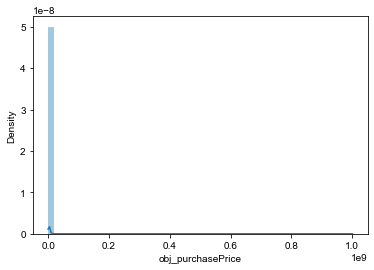

In [14]:
ax = sns.distplot(df_full['obj_purchasePrice'])
sns.set(rc={'figure.figsize':(10,10)})

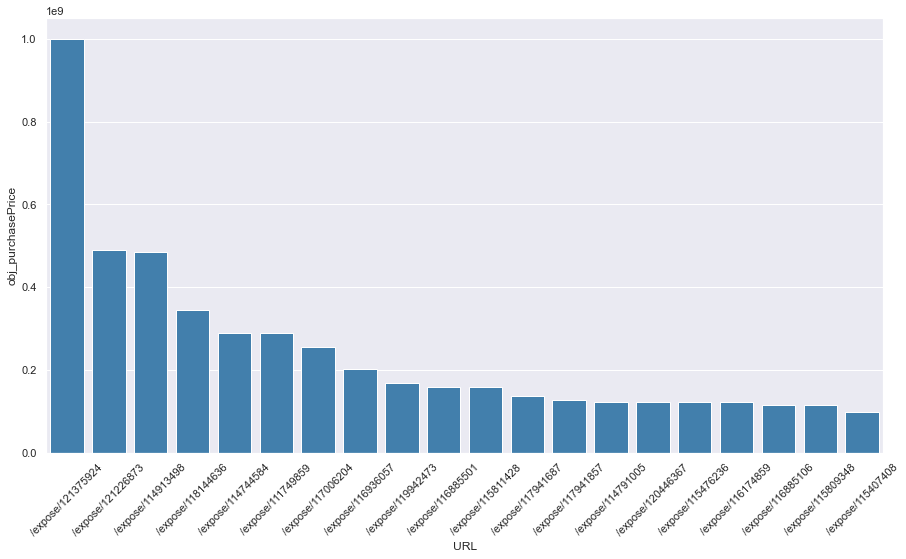

In [15]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
List_filtered = df_full.sort_values('obj_purchasePrice', ascending=False).reset_index(drop="True")[:20]
ax= sns.barplot(x = 'URL', y = 'obj_purchasePrice', data=List_filtered, color = "#3182bd", ci=None)
ax.set(ylim=(0))
plt.show()

In [16]:
df_full.loc[df_full.URL == '/expose/121375924'][["beschreibung", "geo_bln", "geo_krs",
                      "geo_plz", "obj_cellar",
                      "obj_condition", "URL", 
                      "obj_heatingType",
                      "obj_interiorQual", "obj_lastRefurbish",
                       "obj_livingSpace", 
                      "obj_newlyConst", "obj_noParkSpaces", 
                      "obj_noRooms", 
                       "obj_yearConstructed", "obj_purchasePrice"]]

beschreibung geo_bln   geo_krs  \
400675  ['Bei dem Gebäude handelt es sich um ein volls...  Bayern  Augsburg   

       geo_plz  obj_cellar obj_condition                URL  \
400675   86153        True   refurbished  /expose/121375924   

                       obj_heatingType obj_interiorQual  obj_lastRefurbish  \
400675  self_contained_central_heating   no_information            2012.00   

        obj_livingSpace  obj_newlyConst  obj_noParkSpaces  obj_noRooms  \
400675           462.00           False              1.00        19.00   

        obj_yearConstructed  obj_purchasePrice  
400675              1904.00       999999999.00

In [17]:
df_full.loc[df_full.URL == '/expose/121226873'][["beschreibung", "geo_bln", "geo_krs",
                      "geo_plz", "obj_cellar",
                      "obj_condition", "URL", 
                      "obj_heatingType",
                      "obj_interiorQual", "obj_lastRefurbish",
                       "obj_livingSpace", 
                      "obj_newlyConst", "obj_noParkSpaces", 
                      "obj_noRooms", 
                       "obj_yearConstructed", "obj_purchasePrice"]]

beschreibung geo_bln  \
397264  ['#VIVA LA UNABHÄNGIGKEIT oder #VIVA LA ZUKUNF...  Bayern   

               geo_krs geo_plz  obj_cellar   obj_condition                URL  \
397264  Günzburg_Kreis   89331       False  no_information  /expose/121226873   

       obj_heatingType obj_interiorQual  obj_lastRefurbish  obj_livingSpace  \
397264            None    sophisticated                nan           165.00   

        obj_newlyConst  obj_noParkSpaces  obj_noRooms  obj_yearConstructed  \
397264           False               nan         6.00                  nan   

        obj_purchasePrice  
397264       489270000.00

In [18]:
df_full.loc[df_full.URL == '/expose/114913498'][["beschreibung", "geo_bln", "geo_krs",
                      "geo_plz", "obj_cellar",
                      "obj_condition", "URL", 
                      "obj_heatingType",
                      "obj_interiorQual", "obj_lastRefurbish",
                       "obj_livingSpace", 
                      "obj_newlyConst", "obj_noParkSpaces", 
                      "obj_noRooms", 
                       "obj_yearConstructed", "obj_purchasePrice"]]

beschreibung            geo_bln  \
169945  ['BESTE QUALITÄT für einen unschlagbar GÜNSTIG...  Baden_Württemberg   

                   geo_krs geo_plz  obj_cellar   obj_condition  \
169945  Freudenstadt_Kreis   72250        True  no_information   

                      URL obj_heatingType obj_interiorQual  obj_lastRefurbish  \
169945  /expose/114913498            None    sophisticated                nan   

        obj_livingSpace  obj_newlyConst  obj_noParkSpaces  obj_noRooms  \
169945           187.00            True               nan         4.50   

        obj_yearConstructed  obj_purchasePrice  
169945              2020.00       484900000.00

In [19]:
df_full.loc[df_full.URL == '/expose/111749859'][["beschreibung", "geo_bln", "geo_krs",
                      "geo_plz", "obj_cellar",
                      "obj_condition", "URL", 
                      "obj_heatingType",
                      "obj_interiorQual", "obj_lastRefurbish",
                       "obj_livingSpace", 
                      "obj_newlyConst", "obj_noParkSpaces", 
                      "obj_noRooms", 
                       "obj_yearConstructed", "obj_purchasePrice"]]

beschreibung            geo_bln  \
38472  ['DHH   mit Keller EINZUGSBEREIT  !\n\nDiese h...  Baden_Württemberg   

               geo_krs geo_plz  obj_cellar   obj_condition                URL  \
38472  Göppingen_Kreis   73098        True  first_time_use  /expose/111749859   

      obj_heatingType obj_interiorQual  obj_lastRefurbish  obj_livingSpace  \
38472       heat_pump           normal                nan           140.00   

       obj_newlyConst  obj_noParkSpaces  obj_noRooms  obj_yearConstructed  \
38472            True              1.00         5.00              2019.00   

       obj_purchasePrice  
38472       290500000.00

In [20]:
df_full.loc[df_full.URL == '/expose/114744584'][["beschreibung", "geo_bln", "geo_krs",
                      "geo_plz", "obj_cellar",
                      "obj_condition", "URL", 
                      "obj_heatingType",
                      "obj_interiorQual", "obj_lastRefurbish",
                       "obj_livingSpace", 
                      "obj_newlyConst", "obj_noParkSpaces", 
                      "obj_noRooms", 
                       "obj_yearConstructed", "obj_purchasePrice"]]

beschreibung            geo_bln  \
158136  ['DHH   mit Keller EINZUGSBEREIT  !\n\nDiese h...  Baden_Württemberg   

                geo_krs geo_plz  obj_cellar   obj_condition  \
158136  Göppingen_Kreis   73098        True  first_time_use   

                      URL obj_heatingType obj_interiorQual  obj_lastRefurbish  \
158136  /expose/114744584       heat_pump           normal                nan   

        obj_livingSpace  obj_newlyConst  obj_noParkSpaces  obj_noRooms  \
158136           140.00            True              1.00         5.00   

        obj_yearConstructed  obj_purchasePrice  
158136              2019.00       290500000.00

In [21]:
df_full.loc[df_full.URL == '/expose/114791005'][["beschreibung", "geo_bln", "geo_krs",
                      "geo_plz", "obj_cellar",
                      "obj_condition", "URL", 
                      "obj_heatingType",
                      "obj_interiorQual", "obj_lastRefurbish",
                       "obj_livingSpace", 
                      "obj_newlyConst", "obj_noParkSpaces", 
                      "obj_noRooms", 
                       "obj_yearConstructed", "obj_purchasePrice"]]

beschreibung        geo_bln  \
162360  ['* Bungalow, EFH, Einfamilienhaus, Immobilie,...  Niedersachsen   

           geo_krs geo_plz  obj_cellar   obj_condition                URL  \
162360  Leer_Kreis   26817       False  no_information  /expose/114791005   

       obj_heatingType obj_interiorQual  obj_lastRefurbish  obj_livingSpace  \
162360            None   no_information                nan           167.00   

        obj_newlyConst  obj_noParkSpaces  obj_noRooms  obj_yearConstructed  \
162360           False               nan         5.00              1962.00   

        obj_purchasePrice  
162360       123456789.00

## ↑ There are houses with a very high price. This is an outlier and will be removed.

In [22]:
df_full.loc[df_full.URL == '/expose/107736753'][["beschreibung", "geo_bln", "geo_krs",
                      "geo_plz", "obj_cellar",
                      "obj_condition", "URL", 
                      "obj_heatingType",
                      "obj_interiorQual", "obj_lastRefurbish",
                       "obj_livingSpace", 
                      "obj_newlyConst", "obj_noParkSpaces", 
                      "obj_noRooms", 
                       "obj_yearConstructed", "obj_purchasePrice"]]

beschreibung geo_bln  \
54153  ['Vierseitgutshof in unvergleichlicher Weitbli...  Bayern   

                             geo_krs geo_plz  obj_cellar   obj_condition  \
54153  Bad_Tölz_Wolfratshausen_Kreis   82541       False  no_information   

                     URL obj_heatingType obj_interiorQual  obj_lastRefurbish  \
54153  /expose/107736753            None   no_information                nan   

       obj_livingSpace  obj_newlyConst  obj_noParkSpaces  obj_noRooms  \
54153          3650.00           False               nan        32.00   

       obj_yearConstructed  obj_purchasePrice  
54153                  nan        42500000.00

## ↑ This seems to be legit - very high though - 42 million Euro

In [23]:
df_full = df_full[df_full.URL != '/expose/121375924']
sum(df_full.URL=='/expose/121375924')

0

In [24]:
df_full = df_full[df_full.URL != '/expose/121226873']
sum(df_full.URL=='/expose/121226873')

0

In [25]:
df_full = df_full[df_full.URL != '/expose/114913498']
sum(df_full.URL=='/expose/114913498')

0

In [26]:
df_full = df_full[df_full.URL != '/expose/111749859']
sum(df_full.URL=='/expose/111749859')

0

In [27]:
df_full = df_full[df_full.URL != '/expose/114744584']
sum(df_full.URL=='/expose/114744584')

0

In [28]:
df_full = df_full[df_full.URL != '/expose/114791005']
sum(df_full.URL=='/expose/114791005')

0

In [29]:
sum(df_full.obj_purchasePrice==0)

702

In [30]:
df_full = df_full[df_full.obj_purchasePrice != 0]
sum(df_full.obj_purchasePrice==0)

0

## ↑ We remove the zero values as well.

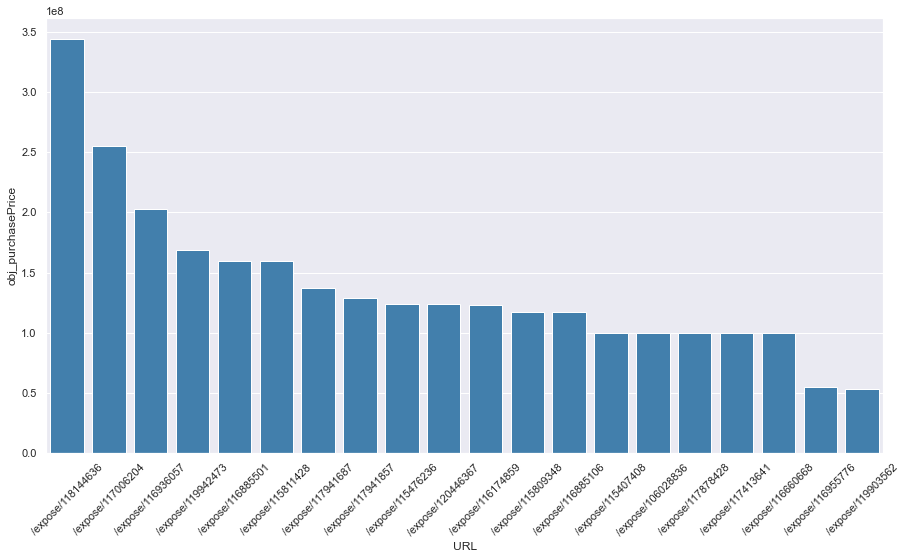

In [31]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
List_filtered = df_full.sort_values('obj_purchasePrice', ascending=False).reset_index(drop="True")[:20]
ax= sns.barplot(x = 'URL', y = 'obj_purchasePrice', data=List_filtered, color = "#3182bd", ci=None)
ax.set(ylim=(0))
plt.show()

In [32]:
sum(df_full.obj_purchasePrice <= 10000)

1619

## ↑ And the ones which are less than 10,000€

In [33]:
df_full.shape

(403265, 88)

In [34]:
df_full = df_full[df_full.obj_purchasePrice > 10000]
sum(df_full.obj_purchasePrice <= 10000)

0

In [35]:
sum(df_full.obj_livingSpace <= 20)

540

In [36]:
df_full = df_full[df_full.obj_livingSpace > 20]
sum(df_full.obj_livingSpace <= 20)

0

## ↑ And the ones which have less than 20 m² livingspace

In [37]:
sum(df_full['obj_lotArea'] <= 20)

2617

In [38]:
df_full = df_full[df_full['obj_lotArea'] > 20]
sum(df_full.obj_lotArea <= 20)

0

## ↑ And the ones which have less than 20 m² property size

In [39]:
df_full.shape

(398488, 88)

In [40]:
df_full['word_count'] = df_full['beschreibung'].apply(lambda x: len(str(x).split(" ")))
df_full[['word_count','beschreibung']].head()

word_count                                       beschreibung
0         249  ['Das im Jahr 1964 in massiver Bauweise erstel...
1         431  ['Man betritt das Haus über den Windfang mit a...
2         240  ['Wohnen auf einer Ebene. Zum Verkauf steht ei...
3         382  ['Dieses hochwertige, teilunterkellerte Zweifa...
4         242  ['Nur einen Katzensprung von Neunkirchen entfe...

In [41]:
df_full['word_count_upper'] = df_full['beschreibung'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df_full[['word_count_upper','beschreibung']].head()

word_count_upper                                       beschreibung
0                 5  ['Das im Jahr 1964 in massiver Bauweise erstel...
1                 1  ['Man betritt das Haus über den Windfang mit a...
2                 3  ['Wohnen auf einer Ebene. Zum Verkauf steht ei...
3                 3  ['Dieses hochwertige, teilunterkellerte Zweifa...
4                 4  ['Nur einen Katzensprung von Neunkirchen entfe...

In [42]:
df_full['beschreibung_length'] = df_full['beschreibung'].str.len() ## this also includes spaces
df_full[['beschreibung_length','beschreibung']].head()

beschreibung_length                                       beschreibung
0                 1948  ['Das im Jahr 1964 in massiver Bauweise erstel...
1                 3166  ['Man betritt das Haus über den Windfang mit a...
2                 1838  ['Wohnen auf einer Ebene. Zum Verkauf steht ei...
3                 3334  ['Dieses hochwertige, teilunterkellerte Zweifa...
4                 1930  ['Nur einen Katzensprung von Neunkirchen entfe...

In [43]:
df_full['price_per_m²_living'] = df_full['obj_purchasePrice'] / df_full['obj_livingSpace'] 
df_full['price_per_m²_living'] = df_full['price_per_m²_living'].replace(np.inf, np.nan)
df_full['price_per_m²_property'] = df_full['obj_purchasePrice'] / df_full['obj_lotArea'] 
df_full['price_per_m²_property'] = df_full['price_per_m²_property'].replace(np.inf, np.nan)

## ↑ Above we added some features: Word count, word count upper, length of text, price per m² living and property

In [44]:
df_full.obj_zipCode = df_full.obj_zipCode.astype(str)
df_full.geo_plz = df_full.geo_plz.astype(str)
df_full.obj_cId = df_full.obj_cId.astype(str)
df_full.obj_scoutId = df_full.obj_scoutId.astype(str)

In [45]:
#Taken from https://www.suche-postleitzahl.org/download_v1/data/plz-5stellig-daten.xls - 17th of November 2019
#plz = pd.ExcelFile("*/plz-5stellig-daten.xlsx").parse(0)
plz = pd.ExcelFile("*/plz-5stellig-daten.xlsx").parse(0)
plz.plz = plz.plz.astype(int)
plz.plz = plz.plz.astype(str)
df_full = df_full.merge(plz[["plz","qkm","einwohner"]],left_on="geo_plz",right_on="plz",how="left")
df_full["bev_pro_km2"] = df_full.einwohner/df_full.qkm

In [46]:
#Taken from www.fa-technik.adfc.de/code/opengeodb/DE.tab - 8th of March 2021
geo = pd.read_csv("*/DE.tab",sep="\t")
geo_split = pd.concat([geo.lat,geo.lon,geo.plz.str.split(",",expand=True)],axis=1)
geo_split_melt = geo_split.melt(id_vars=["lat","lon"],value_name="plz").drop("variable",axis=1)
geo_split_melt = geo_split_melt.loc[geo_split_melt.plz.isnull()==0]
geo_split_melt = geo_split_melt.loc[geo_split_melt.plz!=""]
geo_split_melt.plz = geo_split_melt.plz.astype(int)
geo_split_melt.plz = geo_split_melt.plz.astype(str)
geo_split_melt_grouped = geo_split_melt.groupby("plz").agg({"lat":["mean"],"lon":["mean"]}).reset_index()
geo_split_melt_grouped.columns = geo_split_melt_grouped.columns.get_level_values(0)
df_full = df_full.merge(geo_split_melt_grouped[["plz","lat","lon"]],left_on="geo_plz",right_on="plz",how="left")

E:\Data\Coding\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## ↑ We added the PLZ and Lat lon data. Also we added the amount of capita per km²

In [47]:
df_full.obj_ExclusiveExpose = df_full.obj_ExclusiveExpose.astype(str)
df_full.obj_telekomDownloadSpeed = df_full.obj_telekomDownloadSpeed.str.replace(" MBit/s","").astype(float)
df_full.obj_telekomHybridDownloadSpeed = df_full.obj_telekomHybridDownloadSpeed.str.replace(" MBit/s","").astype(float)
df_full.obj_telekomHybridUploadSpeed = df_full.obj_telekomHybridUploadSpeed.str.replace(" MBit/s","").astype(float)
df_full.obj_telekomUploadSpeed = df_full.obj_telekomUploadSpeed.str.replace(" MBit/s","").str.replace(",",".").astype(float)
df_full.obj_telekomInternet = df_full.obj_telekomInternet.str.replace(" MBit/s","").str.replace(" kBit/s","")
df_full.obj_telekomInternet = df_full.obj_telekomInternet.astype(float)
df_full.obj_telekomHdTelephone = (df_full.obj_telekomHdTelephone*1).fillna(0)
df_full.obj_telekomInternetProductAvailable = (df_full.obj_telekomInternetProductAvailable*1).fillna(0)

In [48]:
df_full.drop(columns =["plz_x"], inplace = True) 
df_full.drop(columns =["plz_y"], inplace = True) 

In [49]:
df_full['obj_firingTypes'] = df_full['obj_firingTypes'].str.split(":", n = 1, expand = True)[0]

## ↑ Some more information for example internet speed and firing types fixed.

# Exploratory Data Analysis

## Location

In [76]:
df_full['geo_bln'] = [item.lower() for item in df_full['geo_bln']]

In [165]:
def group(element):
    grouped = df_full.copy()
    grouped = df_full.groupby(element).mean()
    grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
    grouped_count = df_full.groupby(element).count().reset_index()
    grouped = pd.merge(grouped, grouped_count[[element,'URL']], left_on=element, right_on=element)
    grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
    grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")

In [166]:
group(element='geo_bln')
group

<function __main__.group(element)>

In [77]:
grouped = df_full.groupby('geo_bln').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('geo_bln').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['geo_bln','URL']], left_on='geo_bln', right_on='geo_bln')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

geo_bln  obj_purchasePrice  obj_livingSpace  obj_lotArea  \
0      nordrhein_westfalen          448423.74           200.09      1180.50   
1            niedersachsen          334834.51           189.00      1845.62   
2                   bayern          716464.17           208.04      1229.06   
3        baden_württemberg          581604.96           214.51       979.44   
4          rheinland_pfalz          329504.22           227.33      1055.77   
5                   hessen          580152.13           216.15       911.21   
6                  sachsen          337737.55           233.42      1459.45   
7              brandenburg          440468.95           233.46      2207.65   
8       schleswig_holstein          469014.79           165.61      1969.63   
9           sachsen_anhalt          210886.91           189.33      1577.16   
10  mecklenburg_vorpommern          302060.18           191.34      2914.30   
11                  berlin         1123731.01           237.19       843.73   
12               thüringen          224582.19           200.03      1151.02   
13                saarland          266446.49           186.50       850.58   
14                 hamburg          986319.33           178.78       766.43   
15                  bremen          365116.74           160.06       489.98   

    obj_noParkSpaces  obj_noRooms  obj_numberOfFloors  obj_picturecount  \
0               2.35         6.67                2.19             13.41   
1               2.27         6.28                1.96             13.42   
2               4.22         6.43                2.37             14.28   
3               2.42         6.84                2.49             14.47   
4               2.56         6.32                2.18             14.01   
5               2.45         6.82                2.35             13.26   
6               2.81         7.68                2.16             11.93   
7               2.49         5.97                1.97             11.82   
8               2.18         5.68                1.96             14.82   
9               2.77         6.51                1.98             11.60   
10              2.70         6.46                1.86             12.62   
11              1.70         7.13                2.32             10.53   
12              2.54         7.10                2.10             10.96   
13              8.44         6.35                2.15             12.71   
14              4.27         5.75                2.20             12.53   
15              1.54         5.62                2.38             13.56   

    obj_pricetrendrent  obj_thermalChar  ...  obj_lastRefurbish  \
0                 4.29           155.31  ...            2010.80   
1                 3.84           155.67  ...            2010.67   
2                 3.53           135.54  ...            2010.67   
3                 4.21           154.31  ...            2009.76   
4                 3.77           151.99  ...            2009.89   
5                 3.49           163.81  ...            2009.94   
6                 4.44           141.14  ...            2006.11   
7                 7.20           139.10  ...            2009.94   
8                 4.84           153.70  ...            2011.38   
9                 2.02           158.92  ...            2007.61   
10                3.67           137.58  ...            2009.38   
11                6.80           137.20  ...            2011.77   
12                0.04           125.30  ...            2006.48   
13               -0.97           183.54  ...            2007.83   
14                3.72           146.24  ...            2008.62   
15                1.38           173.02  ...            2010.64   

    obj_yearConstructed  word_count  word_count_upper  beschreibung_length  \
0               1968.63      357.98              4.67              2824.64   
1               1970.66      336.87              4.45              2643.09   
2               1977.96  

## ↑ A first glance at the data. Berlin and Hamburg have the most expensive houses, Sachsen-Anhalt and Thüringen the cheapest.

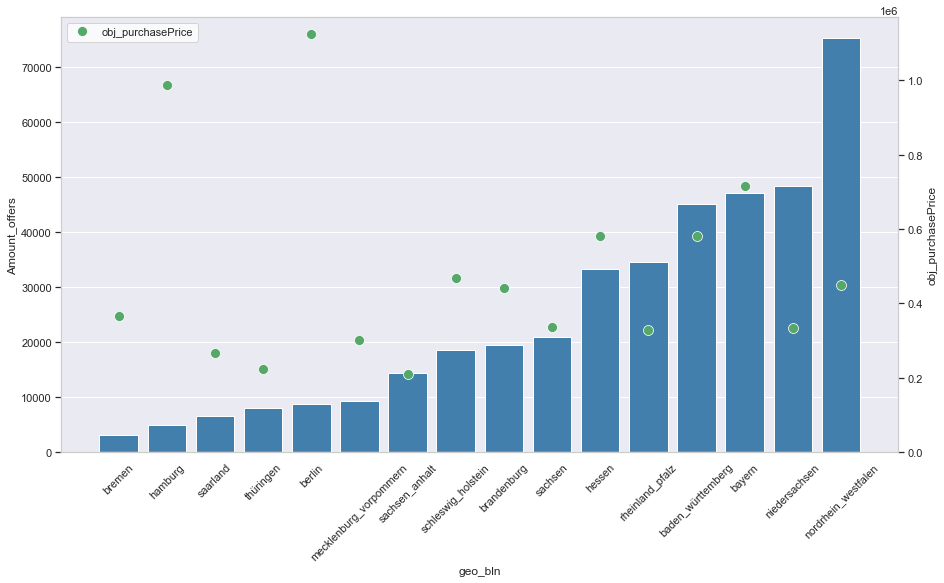

In [78]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('Amount_offers')
ax= sns.barplot(x = 'geo_bln', y = 'Amount_offers',  label='Amount_offers', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Amount of offers and average price
Nordrhein Westfalen has the most offers in the database. Bremen has the fewest. Looking at average price and amount of offers shows that Bavaria is the highest. 

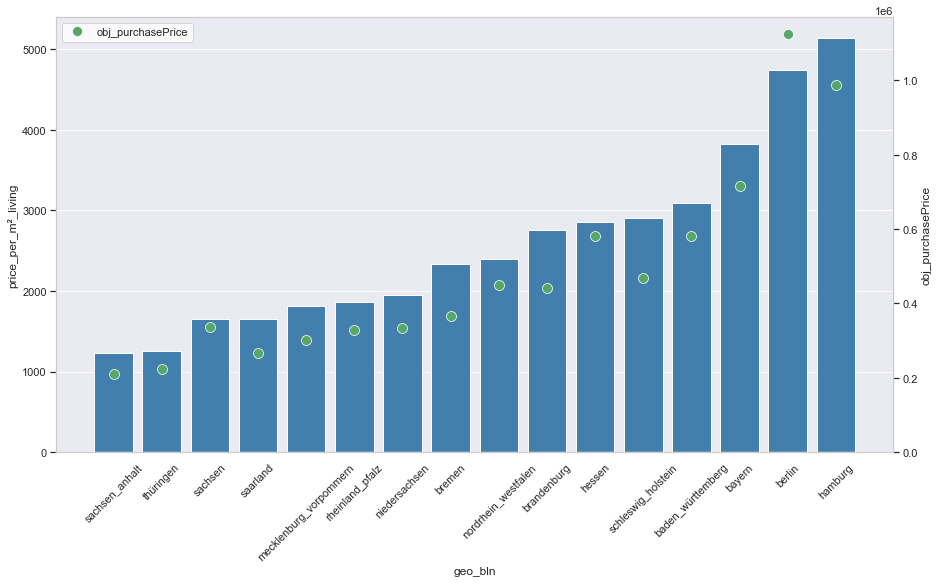

In [79]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('price_per_m²_living')
ax= sns.barplot(x = 'geo_bln', y = 'price_per_m²_living',  label='price_per_m²_living', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Price per living m² and average price

Hamburg has the highest price per m². Lowest county is Sachsen-Anhalt with 1,100 per m² and an average price of 206 KEUR.

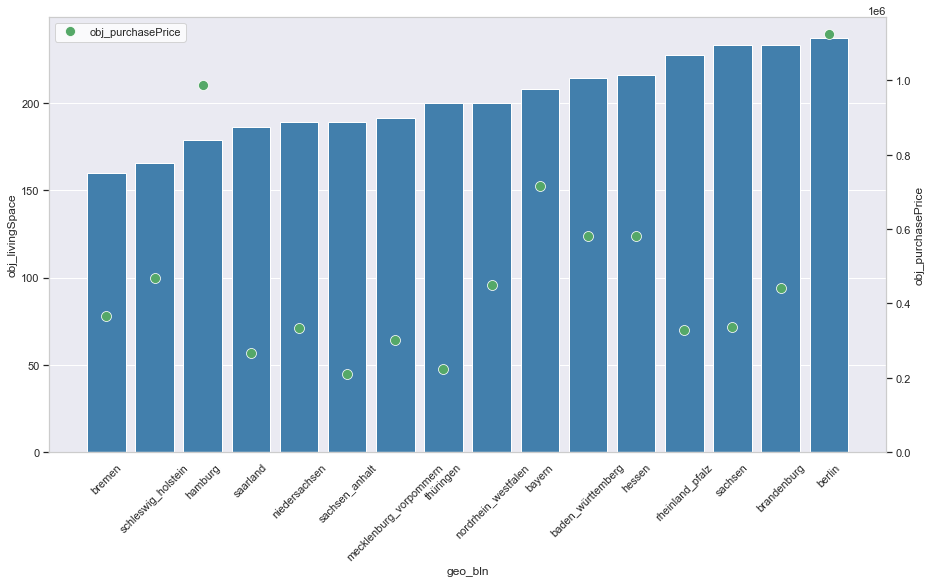

In [80]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('obj_livingSpace')
ax= sns.barplot(x = 'geo_bln', y = 'obj_livingSpace',  label='obj_livingSpace', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Living space and average price

Rheinland Pfalz has the biggest houses, Bremen the smallest.

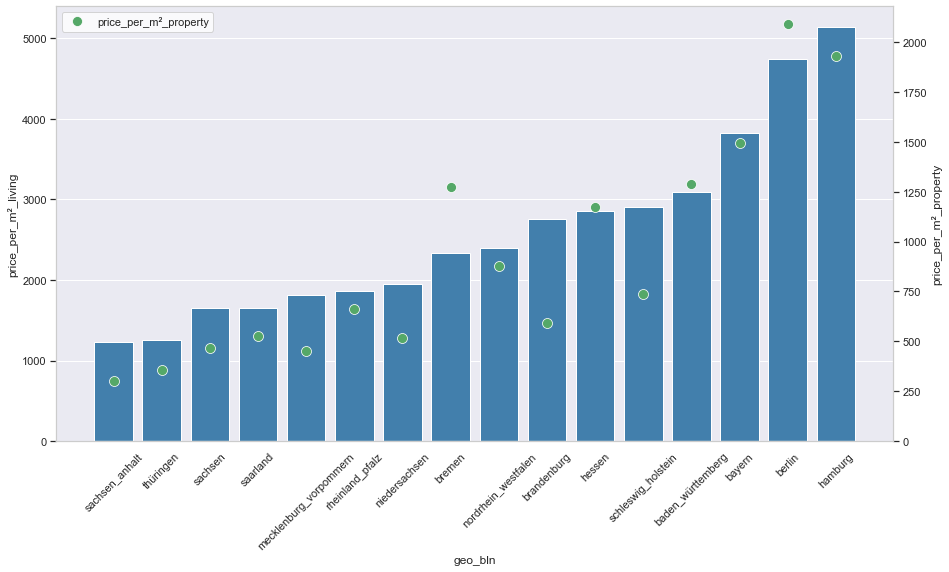

In [81]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('price_per_m²_living')
ax= sns.barplot(x = 'geo_bln', y = 'price_per_m²_living',  label='price_per_m²_living', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'price_per_m²_property', marker="o",  label='price_per_m²_property', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Price per m² living and price per m² property

Hamburg and Berlin are the most expensive cities. Sachsen-Anhalt and Thüringen are the cheapest.

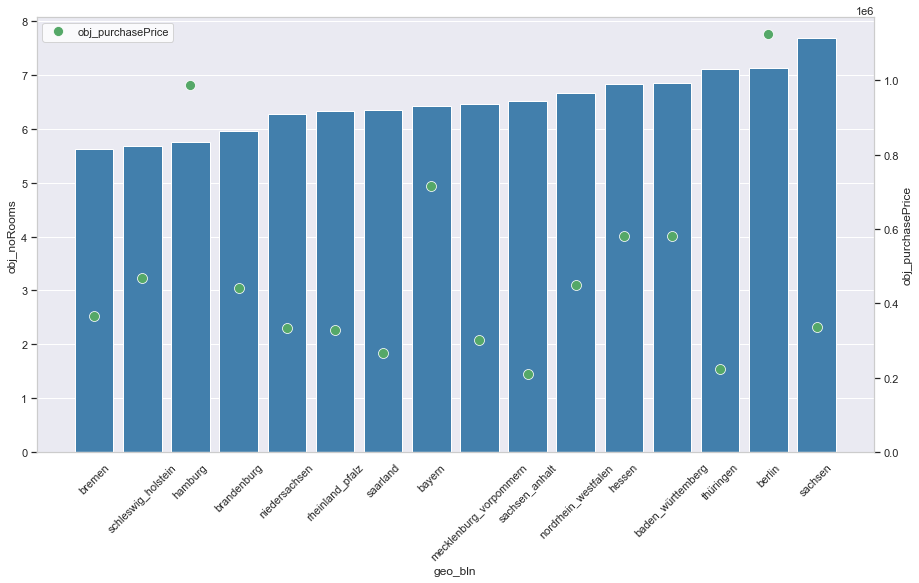

In [82]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('obj_noRooms')
ax= sns.barplot(x = 'geo_bln', y = 'obj_noRooms',  label='obj_noRooms', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Average number of rooms and average price

In Sachsen you get most rooms for your money. Schleswig Holstein has the smallest amount of rooms per house.

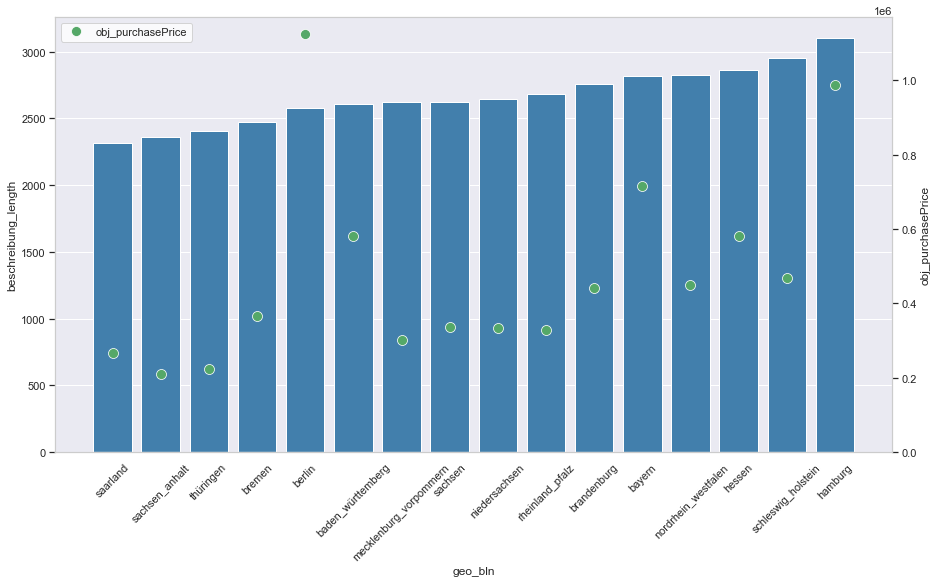

In [83]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('beschreibung_length')
ax= sns.barplot(x = 'geo_bln', y = 'beschreibung_length',  label='beschreibung_length', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Average length of description text and average price

People in Hamburg seem to write the longest texts. Berlin is in the upper half. Sachsen-Anhalt has the shortest texts per Expose.

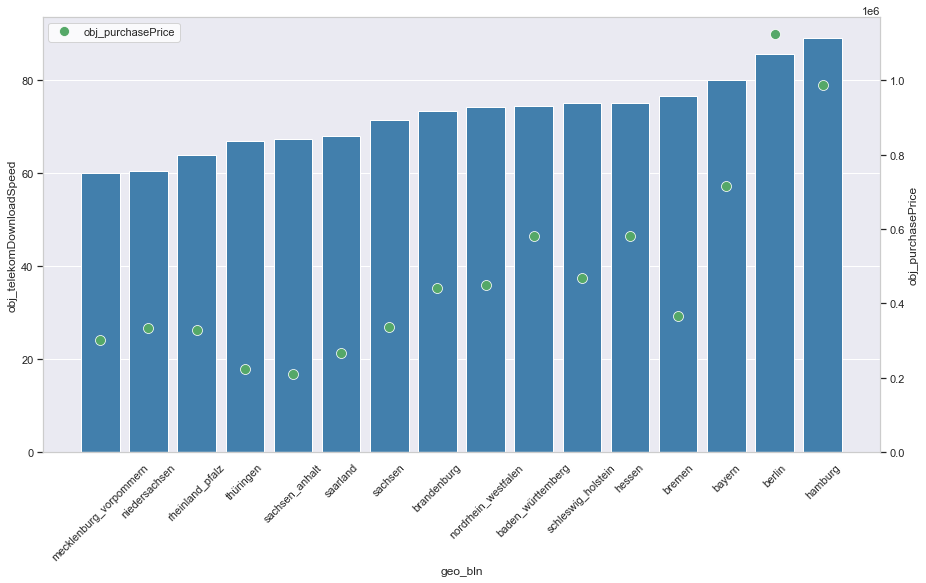

In [84]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('obj_telekomDownloadSpeed')
ax= sns.barplot(x = 'geo_bln', y = 'obj_telekomDownloadSpeed',  label='obj_telekomDownloadSpeed', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Average download speed and average price

Fastest internet is being offered in Hamburg and Berlin. Mecklenburg-Vorpommern and Niedersachsen have the slowest.

In [85]:
df_full['geo_krs'] = [item.lower() for item in df_full['geo_krs']]

In [86]:
grouped = df_full.groupby('geo_krs').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('geo_krs').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['geo_krs','URL']], left_on='geo_krs', right_on='geo_krs')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_purchasePrice', ascending=False).reset_index(drop="True")
grouped.head(10)

geo_krs  obj_purchasePrice  obj_livingSpace  \
0                 miesbach_kreis         1996711.30           223.68   
1                        münchen         1938254.17           195.67   
2                  münchen_kreis         1834281.94           198.02   
3                starnberg_kreis         1779992.41           209.81   
4              frankfurt_am_main         1721455.01           295.08   
5  bad_tölz_wolfratshausen_kreis         1560918.89           216.91   
6                     heidelberg         1519330.51           273.21   
7                    baden_baden         1402820.64           285.36   
8                     düsseldorf         1331005.21           278.21   
9                      stuttgart         1317086.82           232.06   

   obj_lotArea  obj_noParkSpaces  obj_noRooms  obj_numberOfFloors  \
0      2160.53              2.64         7.04                2.47   
1       457.54              1.47         6.43                2.78   
2       548.86             19.78         6.11                2.58   
3      1203.59             30.40         6.24                2.66   
4       632.98              2.66        10.00                2.91   
5      1136.09              2.21         6.53                2.58   
6       643.56              2.28         9.70                3.05   
7      1417.46              2.50         8.15                2.80   
8       774.13              2.07         8.70                2.40   
9       953.68              2.01         8.77                3.05   

   obj_picturecount  obj_pricetrendrent  obj_thermalChar  ...  \
0             12.59                4.61           130.89  ...   
1             11.76                4.19           114.86  ...   
2             13.66                4.44           116.25  ...   
3             12.38                3.29            93.84  ...   
4             11.82                3.75           163.22  ...   
5             15.40                3.71           114.73  ...   
6             11.95               14.42           153.55  ...   
7             13.82                6.83           121.57  ...   
8             11.54                5.25           159.71  ...   
9             14.86                2.78           169.30  ...   

   obj_lastRefurbish  obj_yearConstructed  word_count  word_count_upper  \
0            2010.61              1981.14      347.62              4.40   
1            2011.21              1991.33      404.95              6.39   
2            2013.36              1992.67      435.71              6.38   
3            2012.96              1997.35      424.28              6.33   
4            2010.87              1957.41      373.23              5.36   
5            2011.14              1984.21      396.41              4.73   
6            2009.23              1941.71      369.93              4.75   
7            2011.27              1960.01      332.46              3.76   
8            2012.07              1962.11      359.37              5.73   
9            2009.66              1956.21      360.11              5.41   

   beschreibung_length  price_per_m²_living  price_per_m²_property  \
0              2674.09              8391.18                2786.73   
1              3201.75              9640.82                5978.91   
2              3433.44              8455.85                3546.21   
3              3363.63              8205.26                3235.24   
4              2896.31              5839.47                4405.46   
5              3098.50              6760.48                2295.72   
6              2875.68              5332.78                3307.45   
7              2623.65              4546.68                1974.25   
8              2817.75              4897.02                3029.22   
9              2842.45              5937.89                3384.31   

   obj_telekomDownloadSpeed  bev_pro_km2  Amount_offers  
0                     83.25       180.01            349  
1                     89.16      4051.08   

## ↑ The most expensive 10 places in Germany to live

Munich, Frankfurt (Main) and the area around Munich are the most expensive with an average price of 1.8 MEUR. 

In [87]:
grouped = df_full.groupby('geo_krs').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('geo_krs').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['geo_krs','URL']], left_on='geo_krs', right_on='geo_krs')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_purchasePrice', ascending=True).reset_index(drop="True")
grouped.head(10)

geo_krs  obj_purchasePrice  obj_livingSpace  \
0    ludwigslust_parchim_kreis           49500.00           129.00   
1              kyffhäuserkreis          111011.45           225.88   
2                salzlandkreis          128400.94           181.78   
3       mansfeld_südharz_kreis          135303.46           159.02   
4             holzminden_kreis          140418.22           255.96   
5        unstrut_hainich_kreis          141730.17           161.94   
6                kronach_kreis          145283.29           173.84   
7             saale_orla_kreis          146714.56           169.02   
8  vorpommern_greifswald_kreis          150000.00           133.00   
9                görlitz_kreis          152876.49           255.93   

   obj_lotArea  obj_noParkSpaces  obj_noRooms  obj_numberOfFloors  \
0      2512.00               nan         4.00                 nan   
1       720.70              2.30         6.84                2.05   
2       998.33              3.78         6.43                1.97   
3      3156.25              1.85         5.81                1.84   
4      1032.19              2.04         7.93                1.92   
5       971.46              2.43         5.83                2.02   
6      1461.95              2.29         6.07                2.10   
7       849.15              1.96         5.78                1.67   
8       795.00               nan         5.00                 nan   
9      2598.34              2.99         8.64                2.02   

   obj_picturecount  obj_pricetrendrent  obj_thermalChar  ...  \
0              1.00                 nan              nan  ...   
1              7.18                1.92           170.84  ...   
2              9.78                3.52           202.67  ...   
3              9.87                3.20           202.07  ...   
4             11.59               -2.48           192.25  ...   
5             11.44               -4.43           121.43  ...   
6              6.20                6.36           205.97  ...   
7              8.50              -12.28           169.98  ...   
8             13.00                 nan              nan  ...   
9             12.09               -2.19           214.95  ...   

   obj_lastRefurbish  obj_yearConstructed  word_count  word_count_upper  \
0                nan              1900.00      196.00              4.00   
1            2007.13              1925.00      241.39              6.93   
2            2006.45              1931.29      266.01              3.88   
3            2007.37              1933.80      227.00              3.65   
4            2007.52              1939.57      282.96              4.92   
5            2005.34              1939.54      288.00              3.82   
6            2005.30              1958.84      267.83              6.43   
7            2005.36              1938.66      253.12              3.29   
8                nan              1989.00      500.00             10.00   
9            2007.43              1925.07      256.86              2.83   

   beschreibung_length  price_per_m²_living  price_per_m²_property  \
0              1673.00               383.72                  19.71   
1              1973.36               569.47                 179.90   
2              2095.61               791.83                 216.41   
3              1813.40               754.76                 158.91   
4              2251.68               809.68                 205.99   
5              2311.32               925.22                 296.66   
6              2194.26               834.95                 237.95   
7              2030.99               933.51                 267.94   
8              4069.00              1127.82                 188.68   
9              2034.34               754.75                 152.54   

   obj_telekomDownloadSpeed  bev_pro_km2  Amount_offers  
0                       nan        30.59              1  
1                     52.16        91.16            384  
2    

## ↑ The least expensive 10 places in Germany to live

Kyffhäuserkreis, Südharz and Salzlandkreis. In Kyffhäuserkreis you get a house for an average of 94 KEUR. That is 5% of the average price in Munich!

## Condition

In [88]:
grouped = df_full.groupby('obj_buildingType').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_buildingType').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_buildingType','URL']], left_on='obj_buildingType', right_on='obj_buildingType')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

obj_buildingType  obj_purchasePrice  obj_livingSpace  obj_lotArea  \
0   single_family_house          448193.72           178.99      1055.08   
1     other_real_estate          278079.30           203.69      2111.39   
2    multi_family_house          689696.84           354.77      1118.89   
3    semidetached_house          470419.13           139.35       474.66   
4        no_information          547918.86           286.01      1526.34   
5     mid_terrace_house          385255.86           132.42       312.46   
6              bungalow          377172.13           128.31       964.74   
7     end_terrace_house          451417.80           146.56       364.33   
8                 villa         1453048.71           307.30      2706.44   
9   special_real_estate          818938.98           330.05      4791.65   
10            farmhouse          401208.66           223.12     11104.99   
11   castle_manor_house         1856112.93          1119.80     28548.16   

    obj_noParkSpaces  obj_noRooms  obj_numberOfFloors  obj_picturecount  \
0               2.26         5.57                2.01             15.38   
1               6.75         6.50                2.25              3.44   
2               3.83        11.94                2.68             15.42   
3               1.70         5.03                2.34             14.12   
4               2.99         7.33                2.32             16.03   
5               1.47         4.91                2.57             14.81   
6               1.88         4.26                1.14             14.26   
7               3.79         5.04                2.53             14.97   
8               8.04         8.31                2.40             15.52   
9               4.67         9.12                2.36             17.63   
10              3.61         7.70                2.12             17.77   
11             10.56        20.54                2.88             17.87   

    obj_pricetrendrent  obj_thermalChar  ...  obj_lastRefurbish  \
0                 4.11           150.20  ...            2010.07   
1                 3.79           168.12  ...            2007.77   
2                 3.83           167.36  ...            2008.94   
3                 4.14           133.92  ...            2011.08   
4                 4.02           161.96  ...            2009.01   
5                 4.08           134.73  ...            2011.43   
6                 4.19           142.33  ...            2011.59   
7                 4.05           144.47  ...            2011.57   
8                 4.01           131.72  ...            2011.56   
9                 4.23           161.44  ...            2010.21   
10                3.84           227.10  ...            2005.51   
11                4.50           114.99  ...            2006.62   

    obj_yearConstructed  word_count  word_count_upper  beschreibung_length  \
0               1979.02      373.80              4.49              2951.91   
1               1945.72      233.11              5.55              1932.89   
2               1948.45      347.46              4.64              2683.07   
3               1984.41      362.69              4.42              2847.59   
4               1961.26      333.06              3.85              2599.56   
5               1974.51      347.00              4.08              2679.71   
6               1994.12      377.57              4.16              2998.88   
7               1980.68      355.00              4.23              2755.49   
8               1971.61      452.81              5.51              3576.82   
9               1930.05      360.18              4.99              2778.22   
10              1892.13      328.64              4.00              2492.31   
11              1780.99      369.30              4.56              2870.61   

    price_per_m²_living  price_per_m²_property  obj_telekomDownloadSpeed  \
0               2727.14                 699.74                     70.23   
1  

## ↑ Houses by type

Most houses are single_family_house, followed by other real estate and multi_family_house

In [89]:
grouped = df_full.groupby(['obj_buildingType','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_buildingType','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_buildingType','geo_bln'], right_on=['obj_buildingType','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_buildingType','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_buildingType', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_buildingType        bungalow  castle_manor_house  end_terrace_house  \
geo_bln                                                                   
baden_württemberg         754.00               19.00            1575.00   
bayern                   1011.00               16.00            1930.00   
berlin                    290.00                1.00             231.00   
brandenburg              1091.00               17.00             171.00   
bremen                     45.00                0.00             253.00   
hamburg                    95.00                0.00             277.00   
hessen                    984.00               18.00             987.00   
mecklenburg_vorpommern    515.00               23.00             196.00   
niedersachsen            2515.00                4.00            1063.00   
nordrhein_westfalen      2341.00               27.00            2557.00   
rheinland_pfalz          1310.00                9.00             621.00   
saarland                  260.00                0.00             143.00   
sachsen                   608.00               23.00             343.00   
sachsen_anhalt            676.00               19.00             207.00   
schleswig_holstein        897.00                5.00             667.00   
thüringen                 259.00                1.00              84.00   

obj_buildingType        farmhouse  mid_terrace_house  multi_family_house  \
geo_bln                                                                    
baden_württemberg          537.00            2157.00             7090.00   
bayern                     612.00            2513.00             5459.00   
berlin                       2.00             559.00              864.00   
brandenburg                283.00             432.00             1616.00   
bremen                       1.00             777.00              374.00   
hamburg                      0.00             582.00              299.00   
hessen                     263.00            1485.00             4434.00   
mecklenburg_vorpommern     182.00             300.00              930.00   
niedersachsen              623.00            1866.00             4831.00   
nordrhein_westfalen        563.00            4254.00             9623.00   
rheinland_pfalz            514.00             916.00             3842.00   
saarland                    56.00             262.00              841.00   
sachsen                    247.00             668.00             3090.00   
sachsen_anhalt             263.00             466.00             1456.00   
schleswig_holstein         209.00            1119.00             1313.00   
thüringen                  109.00             167.00              845.00   

obj_buildingType        no_information  other_real_estate  semidetached_house  \
geo_bln                                                                         
baden_württemberg              2732.00            4496.00             5807.00   
bayern                         2779.00            5250.00             7613.00   
berlin                          501.00             574.00             1305.00   
brandenburg                    1569.00            2532.00             1495.00   
bremen                          131.00             225.00              307.00   
hamburg                         191.00             437.00              950.00   
hessen                         2214.00            5685.00             2944.00   
mecklenburg_vorpommern          532.00            1984.00              947.00   
niedersachsen                  2553.00            7931.00             4046.00   
nordrhein_westfalen            4127.00           14550.00             8710.00   
rheinland_pfalz                2024.00            6363.00             2027.00   
saarland                        639.00            1608.00              387.00   
sachsen                         806.00            3752.00             1099.00   
sachsen_anhalt                  571.00            3864.00        

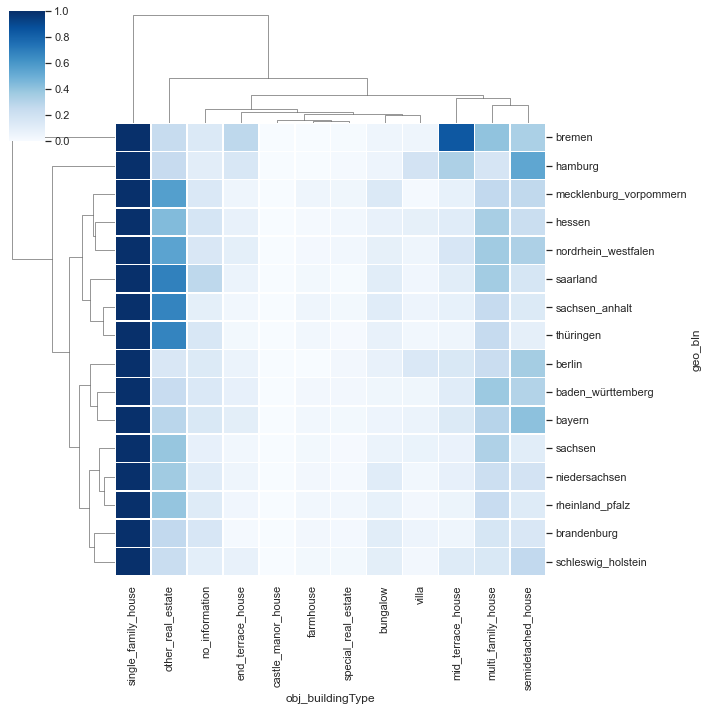

In [90]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, method="average")

## ↑ Clustermap: Amount of houses by Region and type

## That is a new chart. It does the following: 
        -Scale the data by row (standard_scale=1) or column (standard_scale=0) to 0-1
        -Show the data as map - the higher, the darker
        -Cluster the data by column and row

Looking on the chart we see that:

         -Most of the houses are single family house
         -Bremen has the highest proportion of mid terrace houses
         
The chart will be used more frequently in the analysis

If you want to know more about this chart and its possibilities, please have a look at my article: https://blog.tdwi.eu/hierarchical-clustering-in-python/

In [91]:
grouped = df_full.groupby(['obj_buildingType','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_buildingType', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_buildingType        bungalow  castle_manor_house  end_terrace_house  \
geo_bln                                                                   
baden_württemberg      583720.18          2365631.58          499083.93   
bayern                 505670.18          2053281.25          732060.48   
berlin                 627718.14          1600000.00          643938.31   
brandenburg            287220.40          1174647.06          380392.37   
bremen                 415392.67                0.00          318374.68   
hamburg                775223.14                0.00          550955.55   
hessen                 462328.48           953555.56          534595.84   
mecklenburg_vorpommern 244183.58          1946782.61          259756.58   
niedersachsen          314499.67           967000.00          307448.63   
nordrhein_westfalen    432874.69          2304740.74          364010.24   
rheinland_pfalz        337340.91          1531894.89          328141.38   
saarland               286286.92                0.00          182070.98   
sachsen                252890.20           786695.65          280289.64   
sachsen_anhalt         219570.91          3665105.26          141635.58   
schleswig_holstein     385272.53          1696000.00          381414.58   
thüringen              233763.44           410000.00          137620.61   

obj_buildingType        farmhouse  mid_terrace_house  multi_family_house  \
geo_bln                                                                    
baden_württemberg       416626.27          453095.20           791183.53   
bayern                  751655.54          599395.59           873406.78   
berlin                 3775000.00          605884.47          2803229.99   
brandenburg             313899.69          321813.52           691221.45   
bremen                  399000.00          307775.31           502640.85   
hamburg                      0.00          509165.09          1701927.35   
hessen                  253200.84          477742.82           744462.82   
mecklenburg_vorpommern  313974.18          198269.08           460992.65   
niedersachsen           347032.07          283288.39           472747.67   
nordrhein_westfalen     477110.64          326477.40           618012.51   
rheinland_pfalz         249796.39          302673.45           479858.56   
saarland                188532.14          156955.42           320857.34   
sachsen                 195336.40          240908.16           657673.76   
sachsen_anhalt          251306.46          131339.06           312306.36   
schleswig_holstein      602870.81          347471.46           646683.39   
thüringen               207588.53          141294.73           388390.39   

obj_buildingType        no_information  other_real_estate  semidetached_house  \
geo_bln                                                                         
baden_württemberg            610680.28          424058.51           493681.15   
bayern                       763407.45          486760.68           744555.64   
berlin                      1096963.16         1214223.33           573772.82   
brandenburg                  435566.36          207659.31           354258.09   
bremen                       476509.14          281650.66           289347.61   
hamburg                     1321439.79          895830.03           608342.63   
hessen                       718190.24          325655.41           540184.81   
mecklenburg_vorpommern       398383.56          170197.25           267612.10   
niedersachsen                396238.68          199658.57           288677.52   
nordrhein_westfalen          555581.31          302734.51           386803.55   
rheinland_pfalz              367713.02          184175.16           348421.68   
saarland                     257893.25          147837.58           211856.99   
sachsen                      366842.87          182611.48           280028.97   
sachsen_anhalt               270899.52           89565.94        

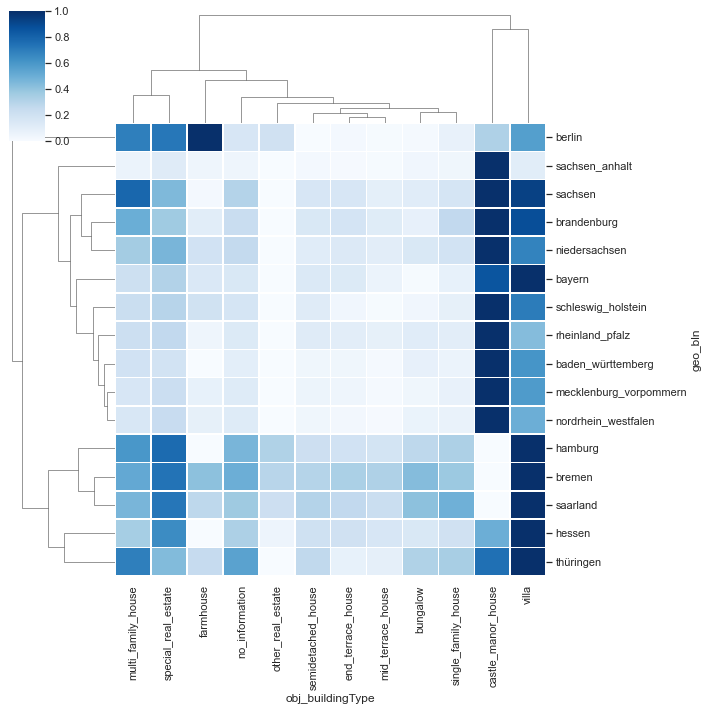

In [92]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average prices of houses by Region and type

## The same chart as before just with average prices

We see that the castles are the most expensives. Also Villa types stand out. Rheinland Pfalz and Sachsen Anhalt seem to be on the lower scale in terms of pricing. 

In [93]:
grouped = df_full.groupby('obj_condition').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_condition').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_condition','URL']], left_on='obj_condition', right_on='obj_condition')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

obj_condition  obj_purchasePrice  obj_livingSpace  \
0                       no_information          404772.74           210.16   
1                            well_kept          516734.25           207.94   
2                       first_time_use          512741.17           176.84   
3                   need_of_renovation          338870.79           197.27   
4                       mint_condition          797719.83           203.21   
5                           modernized          581447.01           232.28   
6                          refurbished          707433.23           262.80   
7                      fully_renovated          593118.01           214.49   
8   first_time_use_after_refurbishment          782839.87           220.07   
9                           negotiable          504746.72           219.28   
10                 ripe_for_demolition          321469.32           170.16   

    obj_lotArea  obj_noParkSpaces  obj_noRooms  obj_numberOfFloors  \
0       1601.42              3.40         6.41                2.10   
1       1236.96              2.53         7.12                2.30   
2        673.56              2.21         5.19                2.04   
3       1330.82              2.22         7.04                2.24   
4       1116.61              2.46         6.11                2.23   
5       1261.26              4.20         7.44                2.37   
6       1860.53              2.86         8.87                2.46   
7       1742.60              2.77         7.36                2.34   
8        919.77              2.41         7.33                2.53   
9       1134.35              2.60         7.76                2.13   
10      1843.90              2.12         5.72                2.00   

    obj_picturecount  obj_pricetrendrent  obj_thermalChar  ...  \
0               9.30                3.96           164.83  ...   
1              18.35                4.08           159.30  ...   
2              12.82                4.20            44.37  ...   
3              15.48                3.80           240.99  ...   
4              18.10                4.24            75.55  ...   
5              18.45                3.99           155.74  ...   
6              17.41                3.98           154.47  ...   
7              17.96                3.85           155.82  ...   
8              17.68                4.09           145.21  ...   
9              14.83                3.88           172.36  ...   
10              9.55                4.71           302.53  ...   

    obj_lastRefurbish  obj_yearConstructed  word_count  word_count_upper  \
0             2006.58              1961.60      296.99              4.65   
1             2010.14              1965.78      372.56              4.27   
2             2019.26              2019.47      419.58              5.58   
3             2000.78              1935.32      317.06              3.40   
4             2014.85              2000.85      416.12              5.26   
5             2013.36              1953.48      387.25              4.73   
6             2012.70              1931.99      370.49              4.25   
7             2013.46              1945.49      354.59              3.91   
8             2017.45              1946.57      361.44              3.64   
9             2009.74              1962.56      346.97              5.14   
10            1986.57              1922.19      251.29              3.74   

    beschreibung_length  price_per_m²_living  price_per_m²_property  \
0               2383.62              2211.42                 725.59   
1               2850.39              2669.78                 976.43   
2               3430.76              3227.53                1167.06   
3               2422.66              2056.74                 640.59   
4               3250.61              3929.43                1488.58   
5               2979.96              2770.30                1084.25   
6               2854.89              2781.76

In [94]:
grouped = df_full.groupby(['obj_condition','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_condition','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_condition','geo_bln'], right_on=['obj_condition','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_condition','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_condition', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_condition           first_time_use  first_time_use_after_refurbishment  \
geo_bln                                                                      
baden_württemberg              5573.00                              181.00   
bayern                         8399.00                              233.00   
berlin                          929.00                              100.00   
brandenburg                    3064.00                               43.00   
bremen                          207.00                               39.00   
hamburg                         735.00                               28.00   
hessen                         4106.00                              103.00   
mecklenburg_vorpommern          831.00                               31.00   
niedersachsen                  5004.00                              118.00   
nordrhein_westfalen            8737.00                              301.00   
rheinland_pfalz                6217.00                               91.00   
saarland                        463.00                               26.00   
sachsen                        4063.00                              161.00   
sachsen_anhalt                 2828.00                               24.00   
schleswig_holstein             2042.00                               36.00   
thüringen                      1156.00                               19.00   

obj_condition           fully_renovated  mint_condition  modernized  \
geo_bln                                                               
baden_württemberg                977.00         2397.00     2016.00   
bayern                           866.00         3052.00     1865.00   
berlin                           159.00          577.00      378.00   
brandenburg                      217.00         1059.00      569.00   
bremen                            55.00          140.00      149.00   
hamburg                           50.00          315.00      281.00   
hessen                           535.00         2024.00     1683.00   
mecklenburg_vorpommern           136.00          540.00      325.00   
niedersachsen                    706.00         2523.00     1995.00   
nordrhein_westfalen             1158.00         3463.00     3822.00   
rheinland_pfalz                  524.00         1356.00     1309.00   
saarland                         149.00          188.00      223.00   
sachsen                          240.00          763.00      530.00   
sachsen_anhalt                   180.00          373.00      453.00   
schleswig_holstein               323.00         1047.00     1016.00   
thüringen                         62.00          188.00      190.00   

obj_condition           need_of_renovation  negotiable  no_information  \
geo_bln                                                                  
baden_württemberg                  3874.00      256.00        18295.00   
bayern                             3176.00      168.00        17659.00   
berlin                              521.00       19.00         3746.00   
brandenburg                         990.00       74.00         9557.00   
bremen                              257.00        5.00         1365.00   
hamburg                             249.00       17.00         2195.00   
hessen                             2509.00      115.00        14051.00   
mecklenburg_vorpommern              708.00       31.00         4385.00   
niedersachsen                      3229.00      123.00        21951.00   
nordrhein_westfalen                5164.00      296.00        33549.00   
rheinland_pfalz                    2676.00       98.00        14580.00   
saarland                            703.00       13.00         3467.00   
sachsen                            1581.00       40.00        10478.00   
sachsen_anhalt                     1087.00       22.00         6855.00   
schleswig_holstein                 1199.00       58.00         7451.00   
thüringen                           539.00       36.00    

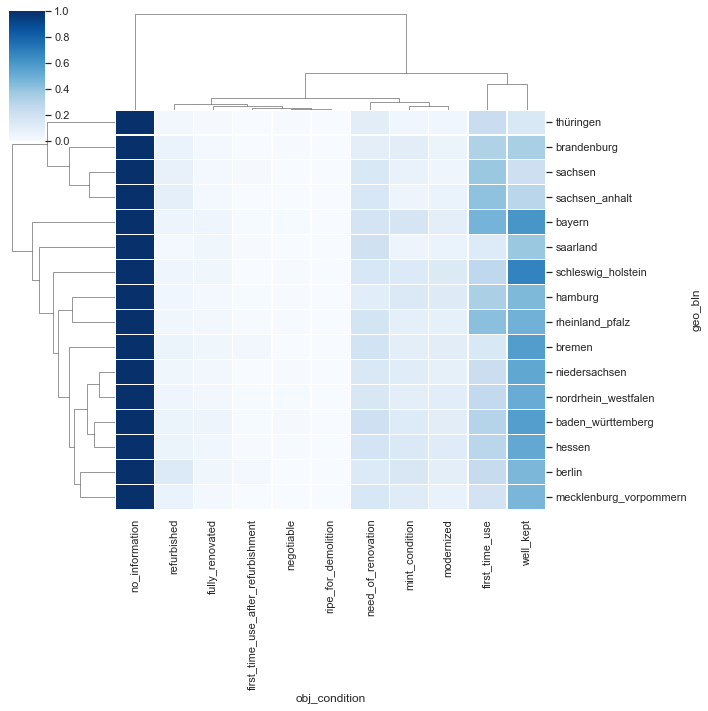

In [95]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and condition

We see that the most of the houses have no information. We also see that Bremen and Schleswig Hollstein have well-kept homes. Bayern has the highest proportion of first-time usage homes.

In [96]:
grouped = df_full.groupby(['obj_condition','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_condition', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_condition           first_time_use  first_time_use_after_refurbishment  \
geo_bln                                                                      
baden_württemberg            575124.39                           793112.40   
bayern                       736022.42                          1109126.07   
berlin                       887681.09                          1384479.99   
brandenburg                  469343.73                           489809.23   
bremen                       411960.94                           616664.10   
hamburg                      808706.27                          1641321.43   
hessen                       695993.92                           880868.95   
mecklenburg_vorpommern       393886.34                           399953.29   
niedersachsen                360795.54                           460482.39   
nordrhein_westfalen          441653.59                           701161.67   
rheinland_pfalz              351211.64                           530828.99   
saarland                     329785.47                           265307.69   
sachsen                      526895.81                           484185.09   
sachsen_anhalt               301036.35                          1092469.54   
schleswig_holstein           482383.07                          1006913.89   
thüringen                    326631.34                           275784.21   

obj_condition           fully_renovated  mint_condition  modernized  \
geo_bln                                                               
baden_württemberg             700085.21       871933.69   682141.44   
bayern                        839555.94      1136725.67   788223.88   
berlin                       1068140.86      1311233.82  1406678.88   
brandenburg                   407028.48       674257.23   526990.63   
bremen                        356117.76       551330.79   452965.70   
hamburg                       885289.32      1404844.18  1483526.69   
hessen                        732917.96       934013.78   699798.68   
mecklenburg_vorpommern        517677.27       494628.10   337734.52   
niedersachsen                 450048.98       512443.83   378880.33   
nordrhein_westfalen           549614.92       724914.63   547793.07   
rheinland_pfalz               421134.67       553123.58   416908.30   
saarland                      272340.94      1409428.56   300781.61   
sachsen                       403279.10       575251.96   401867.67   
sachsen_anhalt                299749.31       394508.03   224896.20   
schleswig_holstein            543738.81       719394.11   492538.88   
thüringen                     342143.55       498085.25   233183.15   

obj_condition           need_of_renovation  negotiable  no_information  \
geo_bln                                                                  
baden_württemberg                449284.38   708006.36       513470.68   
bayern                           513921.58   650556.40       627162.48   
berlin                           977616.08  1035035.53      1055968.11   
brandenburg                      535981.01   367238.36       354606.82   
bremen                           282189.26   499600.00       324691.21   
hamburg                          601682.73   789321.06      1006420.38   
hessen                           432996.11   473191.20       487792.62   
mecklenburg_vorpommern           159589.53   213835.23       233936.49   
niedersachsen                    215256.39   312772.49       305095.82   
nordrhein_westfalen              316614.26   521471.42       385320.92   
rheinland_pfalz                  218674.90   304157.14       270727.77   
saarland                         151101.75   413615.38       204093.53   
sachsen                          158961.52   368784.38       250651.98   
sachsen_anhalt                   110586.05   348454.55       152646.56   
schleswig_holstein               290214.17   359675.41       460197.30   
thüringen                        129073.83   176985.89    

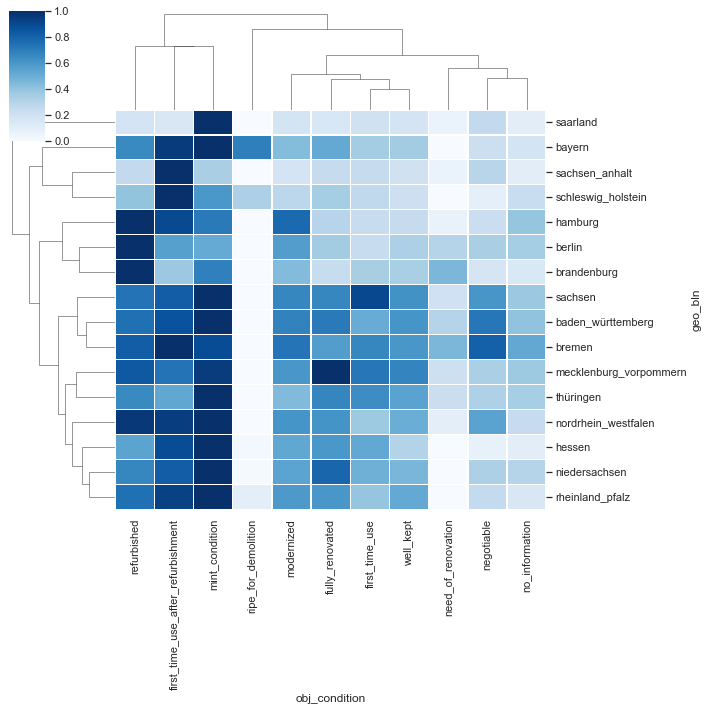

In [97]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and condition

The most expensive homes are in mint-condition. 

In [98]:
grouped = df_full.groupby('obj_constructionPhase').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_constructionPhase').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_constructionPhase','URL']], left_on='obj_constructionPhase', right_on='obj_constructionPhase')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

obj_constructionPhase  obj_purchasePrice  obj_livingSpace  obj_lotArea  \
0        no_information          479400.85           218.62      1591.48   
1             completed          506699.65           201.87      1149.82   
2             projected          434430.73           171.03       755.35   
3    under_construction          678529.53           173.37       550.93   

   obj_noParkSpaces  obj_noRooms  obj_numberOfFloors  obj_picturecount  \
0              2.99         6.93                2.29             12.37   
1              2.45         6.82                2.28             17.29   
2              2.74         5.07                1.93             12.89   
3              1.84         5.63                2.51             10.60   

   obj_pricetrendrent  obj_thermalChar  ...  obj_lastRefurbish  \
0                3.96           160.95  ...            2008.85   
1                4.11           162.27  ...            2010.85   
2                4.13            44.47  ...            2019.42   
3                4.42            49.77  ...            2017.99   

   obj_yearConstructed  word_count  word_count_upper  beschreibung_length  \
0              1957.39      318.36              4.64              2490.74   
1              1963.43      362.10              3.93              2794.09   
2              2019.75      411.32              5.21              3384.21   
3              2012.06      357.72              4.76              2818.26   

   price_per_m²_living  price_per_m²_property  obj_telekomDownloadSpeed  \
0              2434.01                 887.55                     72.68   
1              2695.60                1000.43                     72.67   
2              2861.34                 831.30                     70.59   
3              3967.36                2320.92                     69.81   

   bev_pro_km2  Amount_offers  
0       785.41         246341  
1       752.75          74271  
2       498.12          74021  
3       926.83           3855  

[4 rows x 21 columns]

In [99]:
grouped = df_full.groupby(['obj_constructionPhase','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_constructionPhase','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_constructionPhase','geo_bln'], right_on=['obj_constructionPhase','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_constructionPhase','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_constructionPhase', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_constructionPhase   completed  no_information  projected  \
geo_bln                                                        
baden_württemberg            9843           25796       9181   
bayern                       9015           27550       9640   
berlin                       1791            5907        882   
brandenburg                  3677           10681       4884   
bremen                        553            2325        172   
hamburg                       499            3476        896   
hessen                       6631           20514       5891   
mecklenburg_vorpommern       1750            6508        996   
niedersachsen                9064           32785       6134   
nordrhein_westfalen         14011           48044      12751   
rheinland_pfalz              6979           19257       8160   
saarland                     1090            4651        894   
sachsen                      2986           11349       6498   
sachsen_anhalt               1772            9323       3320   
schleswig_holstein           3864           12552       2046   
thüringen                     746            5623       1676   

obj_constructionPhase   under_construction  
geo_bln                                     
baden_württemberg                      356  
bayern                                 977  
berlin                                 108  
brandenburg                            287  
bremen                                  35  
hamburg                                 81  
hessen                                 365  
mecklenburg_vorpommern                  83  
niedersachsen                          357  
nordrhein_westfalen                    530  
rheinland_pfalz                        228  
saarland                                13  
sachsen                                155  
sachsen_anhalt                          59  
schleswig_holstein                     184  
thüringen                               37

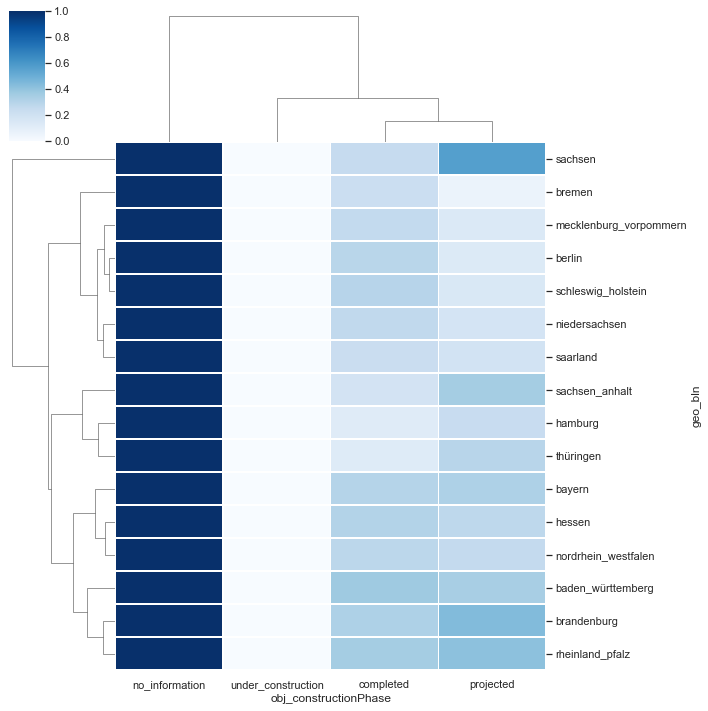

In [100]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and construction phase

Most of the homes are finished but we see that Sachsen and Brandenburg have more projected than completed houses.

In [101]:
grouped = df_full.groupby(['obj_constructionPhase','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_constructionPhase', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_constructionPhase   completed  no_information  projected  \
geo_bln                                                        
baden_württemberg       605084.31       593118.79  519613.79   
bayern                  747177.20       749723.48  565083.89   
berlin                  939951.02      1204225.01  979795.27   
brandenburg             487884.30       444362.01  394663.28   
bremen                  375178.66       358708.30  413217.86   
hamburg                 847299.02      1062360.08  772708.59   
hessen                  617588.76       567834.25  571589.11   
mecklenburg_vorpommern  349463.63       290010.62  291039.50   
niedersachsen           345000.41       331200.42  333813.25   
nordrhein_westfalen     490166.44       446657.95  405988.48   
rheinland_pfalz         371655.16       307091.93  342698.12   
saarland                256941.73       261847.40  299201.03   
sachsen                 326103.81       357669.52  307696.08   
sachsen_anhalt          225917.71       178981.77  288094.19   
schleswig_holstein      437003.15       472967.37  478309.80   
thüringen               262286.47       196538.50  300713.96   

obj_constructionPhase   under_construction  
geo_bln                                     
baden_württemberg                696838.06  
bayern                           988862.93  
berlin                           944316.55  
brandenburg                      467601.11  
bremen                           395459.14  
hamburg                          942475.99  
hessen                           730540.14  
mecklenburg_vorpommern           379639.61  
niedersachsen                    428012.52  
nordrhein_westfalen              525916.13  
rheinland_pfalz                  460030.04  
saarland                         456293.08  
sachsen                          361865.55  
sachsen_anhalt                   456461.05  
schleswig_holstein               768268.03  
thüringen                        277702.70

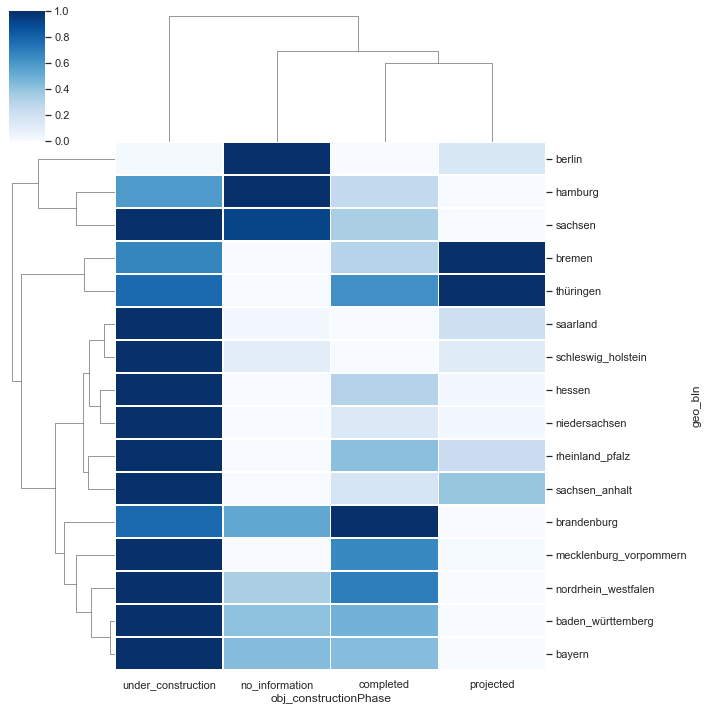

In [102]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and construction phase

Interestingly, the projected houses in Bremen, Sachsen-Anhalt, Thüringen and Saarland are more expensive.

In [103]:
grouped = df_full.groupby('obj_interiorQual').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_interiorQual').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_interiorQual','URL']], left_on='obj_interiorQual', right_on='obj_interiorQual')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

obj_interiorQual  obj_purchasePrice  obj_livingSpace  obj_lotArea  \
0   no_information          433913.50           212.11      1572.28   
1    sophisticated          539521.15           187.90       972.31   
2           normal          429074.14           208.56      1170.35   
3           simple          281443.36           198.40      1360.07   
4           luxury         1452703.88           294.99      1964.94   

   obj_noParkSpaces  obj_noRooms  obj_numberOfFloors  obj_picturecount  \
0              2.42         6.69                2.22             10.51   
1              2.64         5.79                2.13             15.54   
2              2.92         7.20                2.30             17.43   
3              2.26         7.00                2.22             15.30   
4              7.64         7.26                2.34             18.29   

   obj_pricetrendrent  obj_thermalChar  ...  obj_lastRefurbish  \
0                3.97           163.43  ...            2008.27   
1                4.16            86.97  ...            2014.27   
2                4.00           174.49  ...            2009.37   
3                3.73           254.70  ...            2000.21   
4                4.17           112.22  ...            2014.97   

   obj_yearConstructed  word_count  word_count_upper  beschreibung_length  \
0              1957.42      309.00              4.61              2446.57   
1              2000.24      405.22              4.92              3248.41   
2              1958.59      347.80              4.18              2658.02   
3              1927.36      300.35              3.74              2291.48   
4              1993.04      447.29              5.84              3526.48   

   price_per_m²_living  price_per_m²_property  obj_telekomDownloadSpeed  \
0              2301.46                 796.47                     72.22   
1              3127.94                1078.00                     72.23   
2              2390.39                 910.45                     72.66   
3              1718.28                 667.29                     69.94   
4              5028.75                1964.10                     74.81   

   bev_pro_km2  Amount_offers  
0       740.80         200432  
1       665.39         108276  
2       773.42          64998  
3       648.43          16030  
4      1000.85           8752  

[5 rows x 21 columns]

In [104]:
grouped = df_full.groupby(['obj_interiorQual','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_interiorQual','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_interiorQual','geo_bln'], right_on=['obj_interiorQual','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_interiorQual','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_interiorQual', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_interiorQual        luxury  no_information  normal  simple  sophisticated
geo_bln                                                                      
baden_württemberg          873           20433    8586    2125          13159
bayern                    1656           20372    7369    1664          16121
berlin                     350            4479    1098     290           2471
brandenburg                270            9823    2620     675           6141
bremen                      42            1937     562     125            419
hamburg                    205            2792     526      86           1343
hessen                    1042           16287    5654    1319           9099
mecklenburg_vorpommern     114            5243    1706     513           1761
niedersachsen              625           28061    7731    1767          10156
nordrhein_westfalen       2328           37417   12944    2407          20240
rheinland_pfalz            449           16797    5971    1442           9965
saarland                    53            4180     970     325           1120
sachsen                    261           10011    2902    1229           6585
sachsen_anhalt              90            7190    2372     982           3840
schleswig_holstein         349           10756    3176     622           3743
thüringen                   45            4654     811     459           2113

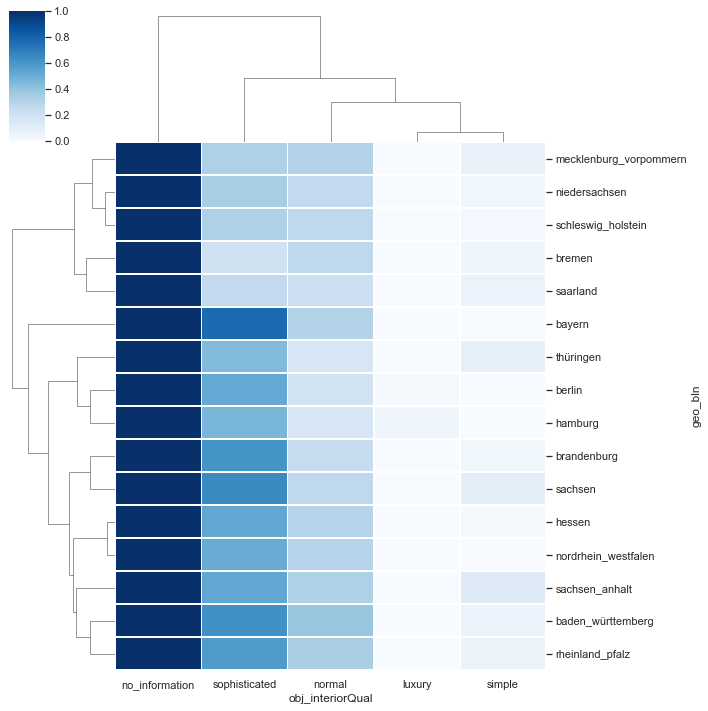

In [105]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and interior quality

Bayern tends to have more sophisticated interior quality.

In [106]:
grouped = df_full.groupby(['obj_interiorQual','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_interiorQual', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_interiorQual           luxury  no_information    normal     simple  \
geo_bln                                                                  
baden_württemberg      1382397.10       543608.24 557812.32  387694.35   
bayern                 1842904.61       684240.64 604851.62  421196.35   
berlin                 2361670.11      1169845.36 808215.38 1935612.89   
brandenburg            1227644.51       426499.80 372707.29  221792.12   
bremen                 1041164.21       341997.54 334805.99  285712.72   
hamburg                1947589.32       988978.54 639372.95  592051.16   
hessen                 1733865.61       535588.12 470036.99  291150.89   
mecklenburg_vorpommern  900826.18       265434.37 296701.26  142294.67   
niedersachsen           831212.76       316661.35 299571.68  179422.44   
nordrhein_westfalen    1082696.02       394914.62 441521.86  274728.21   
rheinland_pfalz         854975.12       280159.72 323945.26  186490.28   
saarland                825263.39       212103.94 420373.80  128718.77   
sachsen                3234523.06       271036.89 311531.37  122983.09   
sachsen_anhalt          564749.08       175219.73 199952.59   93729.53   
schleswig_holstein     1578596.68       450405.99 362083.84  253828.71   
thüringen               696688.67       189728.45 232884.08   91480.94   

obj_interiorQual        sophisticated  
geo_bln                                
baden_württemberg           634317.10  
bayern                      722969.39  
berlin                      909714.64  
brandenburg                 481150.28  
bremen                      468572.66  
hamburg                     995191.99  
hessen                      638117.65  
mecklenburg_vorpommern      424077.10  
niedersachsen               408382.26  
nordrhein_westfalen         499460.71  
rheinland_pfalz             413028.73  
saarland                    349470.21  
sachsen                     375955.14  
sachsen_anhalt              306091.13  
schleswig_holstein          545523.07  
thüringen                   317021.94

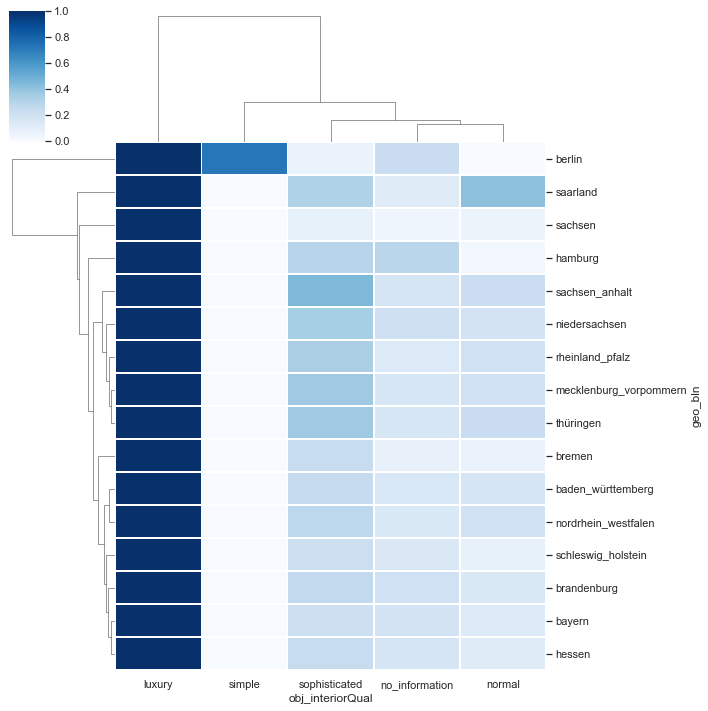

In [107]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and interior quality

Ok, clearly the luxury sector is the most expensive. Berlin has more expensive prices in the simple category. 

## Accessories

In [108]:
grouped = df_full.groupby('obj_firingTypes').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_firingTypes').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_firingTypes','URL']], left_on='obj_firingTypes', right_on='obj_firingTypes')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

obj_firingTypes  obj_purchasePrice  \
0                                no_information          392050.64   
1                                           gas          531907.52   
2                                           oil          483780.61   
3                                   electricity          438685.39   
4                                 solar_heating          549454.51   
5                                    geothermal          601967.38   
6                              district_heating          728776.12   
7                             natural_gas_light          609264.15   
8                                pellet_heating          559076.93   
9                  environmental_thermal_energy          572971.14   
10                                         wood          308799.72   
11                                   liquid_gas          376300.47   
12                            natural_gas_heavy          580724.42   
13                                         coal          154196.13   
14                                local_heating          537218.04   
15                                  heat_supply          641016.25   
16                                   bio_energy          558423.29   
17                                   wood_chips          512347.51   
18         combined_heat_and_power_fossil_fuels          742826.39   
19                       steam_district_heating          786439.81   
20                                    coal_coke          325957.81   
21  combined_heat_and_power_regenerative_energy          518720.58   
22     combined_heat_and_power_renewable_energy          898324.11   
23                                 hydro_energy          970789.52   
24                                  wind_energy          691006.67   
25           combined_heat_and_power_bio_energy          394404.09   

    obj_livingSpace  obj_lotArea  obj_noParkSpaces  obj_noRooms  \
0            202.52      1593.62              3.52         6.20   
1            205.33       974.23              2.71         6.92   
2            209.30      1713.01              2.56         7.18   
3            178.66       931.38              2.07         5.78   
4            189.19      1003.71              5.04         5.87   
5            184.43      1126.80              2.25         5.54   
6            216.38       570.74              2.13         7.22   
7            201.18       998.81              2.30         6.97   
8            225.68      1564.20              2.84         7.02   
9            156.18       598.92              1.79         5.57   
10           176.20      3660.65              2.60         6.52   
11           197.41      3643.14              2.66         6.94   
12           211.89       831.79              2.60         7.50   
13           201.43      2232.60              2.86         7.08   
14           155.76       411.29              1.75         5.48   
15           170.68       535.30              1.71         5.12   
16           177.23      1092.57              2.44         5.85   
17           258.39      6877.09              5.03         8.28   
18           177.28       400.07              1.84         5.74   
19           205.88       575.45              1.80         7.10   
20           304.11      1984.36              2.19        11.57   
21           171.61       639.38              2.30         5.39   
22           188.25       565.37              1.92         6.40   
23           179.39       614.58              1.92         5.68   
24           173.59       463.80              2.50         5.07   
25           136.24       662.73              1.22         4.64   

    obj_numberOfFloors  obj_picturecount  obj_pricetrendrent  obj_thermalChar  \
0                 2.05              7.67                3.91            89.08   
1                 2.30             16.51                4.10           157.37   
2                 2.25             17.88                3.86           194.63   
3      

In [109]:
grouped = df_full.groupby(['obj_firingTypes','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_firingTypes','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_firingTypes','geo_bln'], right_on=['obj_firingTypes','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_firingTypes','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_firingTypes', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_firingTypes         bio_energy   coal  coal_coke  \
geo_bln                                                
baden_württemberg            27.00  22.00       6.00   
bayern                       90.00  33.00       1.00   
berlin                        2.00   3.00       0.00   
brandenburg                   0.00 120.00      18.00   
bremen                        0.00   0.00       1.00   
hamburg                       0.00   0.00       0.00   
hessen                       18.00  14.00       3.00   
mecklenburg_vorpommern        6.00  82.00       8.00   
niedersachsen                24.00  14.00       1.00   
nordrhein_westfalen          31.00 106.00      26.00   
rheinland_pfalz              23.00  25.00       1.00   
saarland                      0.00  12.00       3.00   
sachsen                       7.00 211.00      13.00   
sachsen_anhalt                7.00  97.00       9.00   
schleswig_holstein           28.00   5.00       1.00   
thüringen                     0.00  60.00       5.00   

obj_firingTypes         combined_heat_and_power_bio_energy  \
geo_bln                                                      
baden_württemberg                                     0.00   
bayern                                                1.00   
berlin                                                0.00   
brandenburg                                           0.00   
bremen                                                0.00   
hamburg                                               0.00   
hessen                                                1.00   
mecklenburg_vorpommern                                0.00   
niedersachsen                                         0.00   
nordrhein_westfalen                                   1.00   
rheinland_pfalz                                       0.00   
saarland                                              0.00   
sachsen                                               2.00   
sachsen_anhalt                                        6.00   
schleswig_holstein                                    0.00   
thüringen                                             0.00   

obj_firingTypes         combined_heat_and_power_fossil_fuels  \
geo_bln                                                        
baden_württemberg                                       5.00   
bayern                                                 14.00   
berlin                                                 64.00   
brandenburg                                             0.00   
bremen                                                  3.00   
hamburg                                                 3.00   
hessen                                                  7.00   
mecklenburg_vorpommern                                  0.00   
niedersachsen                                          12.00   
nordrhein_westfalen                                    20.00   
rheinland_pfalz                                        10.00   
saarland                                                0.00   
sachsen                                                 1.00   
sachsen_anhalt                                          0.00   
schleswig_holstein                                      8.00   
thüringen                                               0.00   

obj_firingTypes         combined_heat_and_power_regenerative_energy  \
geo_bln                                                               
baden_württemberg                                              2.00   
bayern                                                        11.00   
berlin                                                         8.00   
brandenburg                                                   21.00   
bremen                                                         1.00   
hamburg                                                        0.00   
hessen                                                         4.00   
mecklenburg_vorpommern                                         1.00   
niedersachs

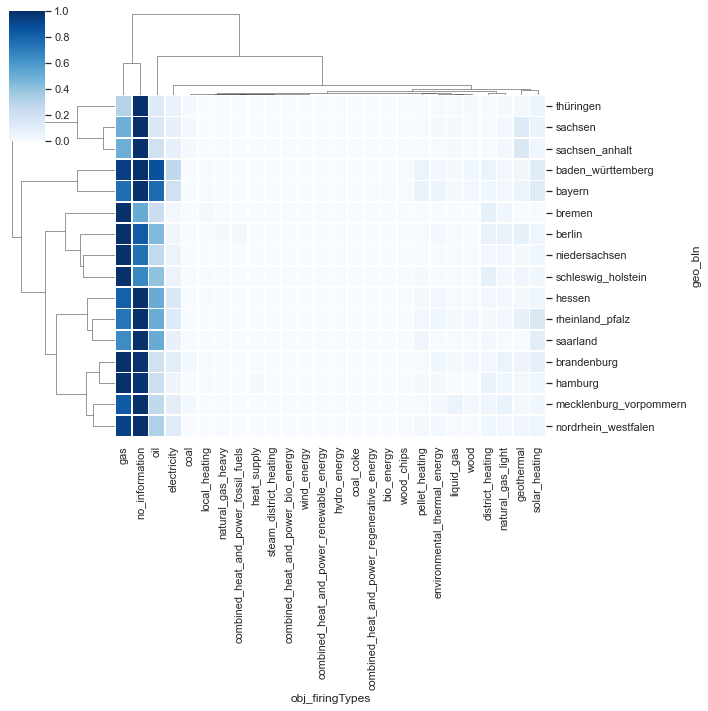

In [110]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and firing types

Clearly there is a clear tendency to gas but in the Hessen, Rheinland Pfalz, Saarland, Baden-Württemberg and Bayern people use more Oil-heating. That is not so much used in the other regions. 

In [111]:
grouped = df_full.groupby(['obj_firingTypes','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_firingTypes', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_firingTypes         bio_energy      coal  coal_coke  \
geo_bln                                                   
baden_württemberg        623574.07 206500.00  337275.00   
bayern                   767113.17 268706.06  378000.00   
berlin                  1187500.00 223000.00       0.00   
brandenburg                   0.00 148172.49  137516.67   
bremen                        0.00      0.00  550000.00   
hamburg                       0.00      0.00       0.00   
hessen                   660518.89 165514.29  222666.67   
mecklenburg_vorpommern   303333.33  73307.32  156875.00   
niedersachsen            338141.67 108500.00  139000.00   
nordrhein_westfalen      463987.06 388697.64  746261.54   
rheinland_pfalz          361447.83 115592.00  118500.00   
saarland                      0.00  84750.00  168666.67   
sachsen                  589285.71 103547.96  202915.38   
sachsen_anhalt           356142.86  95077.31   71433.33   
schleswig_holstein       266928.57 272000.00   80000.00   
thüringen                     0.00  78773.75   82980.00   

obj_firingTypes         combined_heat_and_power_bio_energy  \
geo_bln                                                      
baden_württemberg                                     0.00   
bayern                                           950000.00   
berlin                                                0.00   
brandenburg                                           0.00   
bremen                                                0.00   
hamburg                                               0.00   
hessen                                           495000.00   
mecklenburg_vorpommern                                0.00   
niedersachsen                                         0.00   
nordrhein_westfalen                              307500.00   
rheinland_pfalz                                       0.00   
saarland                                              0.00   
sachsen                                          423945.00   
sachsen_anhalt                                   289675.83   
schleswig_holstein                                    0.00   
thüringen                                             0.00   

obj_firingTypes         combined_heat_and_power_fossil_fuels  \
geo_bln                                                        
baden_württemberg                                  611980.00   
bayern                                            1889892.86   
berlin                                             578423.28   
brandenburg                                             0.00   
bremen                                             349300.00   
hamburg                                           1342666.67   
hessen                                            1430857.14   
mecklenburg_vorpommern                                  0.00   
niedersachsen                                      609061.67   
nordrhein_westfalen                                433967.50   
rheinland_pfalz                                    439600.00   
saarland                                                0.00   
sachsen                                            415000.00   
sachsen_anhalt                                          0.00   
schleswig_holstein                                 845875.00   
thüringen                                               0.00   

obj_firingTypes         combined_heat_and_power_regenerative_energy  \
geo_bln                                                               
baden_württemberg                                         783000.00   
bayern                                                    706459.09   
berlin                                                    659375.00   
brandenburg                                               469876.32   
bremen                                                    450000.00   
hamburg                                                        0.00   
hessen                                                    544500.00   
mecklenburg_vorpommern      

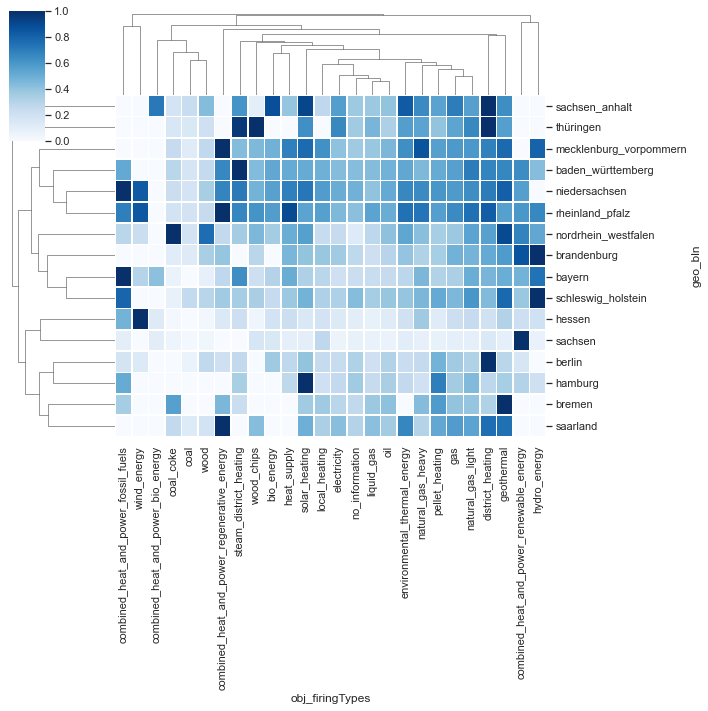

In [112]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and firing types

No clear pattern visible.

In [113]:
grouped = df_full.groupby('obj_heatingType').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_heatingType').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_heatingType','URL']], left_on='obj_heatingType', right_on='obj_heatingType')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

obj_heatingType  obj_purchasePrice  obj_livingSpace  \
0                  central_heating          516077.67           210.69   
1                    floor_heating          613355.14           178.79   
2                      gas_heating          518229.77           198.55   
3                   no_information          527856.21           270.46   
4                        heat_pump          568880.53           157.80   
5                      oil_heating          502303.10           206.01   
6                    stove_heating          253982.18           162.68   
7   self_contained_central_heating          571903.74           264.61   
8                 district_heating          749228.95           229.88   
9                 electric_heating          323903.33           288.01   
10            night_storage_heater          307341.15           163.85   
11   combined_heat_and_power_plant          590473.41           237.62   
12             wood_pellet_heating          666480.15           198.69   
13                   solar_heating          671631.42           189.55   

    obj_lotArea  obj_noParkSpaces  obj_noRooms  obj_numberOfFloors  \
0       1268.61              3.04         7.05                2.28   
1        825.24              3.44         5.54                2.12   
2       1022.50              2.19         6.64                2.24   
3       1409.67              2.35         6.24                2.07   
4        764.27              1.81         5.21                2.06   
5       2225.47              2.45         7.33                2.25   
6       1589.31              2.37         6.37                2.13   
7        830.12              2.81         9.82                2.69   
8        704.84              2.26         7.60                2.56   
9       1117.28              2.32         6.37                2.17   
10      1244.66              2.05         6.53                2.23   
11       672.50              2.24         6.24                2.62   
12      1725.03              2.60         6.70                2.68   
13      1035.30              2.51         6.23                2.25   

    obj_picturecount  obj_pricetrendrent  obj_thermalChar  ...  \
0              17.20                3.99           163.56  ...   
1              14.89                4.34            68.26  ...   
2              15.82                4.24           148.36  ...   
3              12.86                4.33           156.39  ...   
4              12.60                4.17            40.51  ...   
5              17.48                3.92           189.72  ...   
6              15.81                3.68           243.34  ...   
7              15.79                3.79           179.07  ...   
8              14.55                4.12           125.58  ...   
9              15.39                3.80           176.36  ...   
10             18.01                3.99           193.60  ...   
11             14.40                3.85           232.27  ...   
12             16.83                3.95           150.29  ...   
13             15.75                4.03            90.07  ...   

    obj_lastRefurbish  obj_yearConstructed  word_count  word_count_upper  \
0             2009.85              1962.47      379.61              4.27   
1             2014.33              2008.67      421.19              4.88   
2             2011.26              1968.69      340.13              4.50   
3             2010.57              1984.75      332.72              5.43   
4             2016.09              2016.75      401.27              5.15   
5             2010.29              1956.47      321.64              4.16   
6             2002.89              1925.73      317.75              3.51   
7             2009.07              1938.57      349.37              4.31   
8             2013.61              1986.97      348.26              4.00   
9             2008.23              1946.66      306.42              4.30   
10            2002.69         

In [114]:
grouped = df_full.groupby(['obj_heatingType','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_heatingType','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_heatingType','geo_bln'], right_on=['obj_heatingType','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_heatingType','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_heatingType', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_heatingType         central_heating  combined_heat_and_power_plant  \
geo_bln                                                                  
baden_württemberg              16566.00                         308.00   
bayern                         16892.00                         154.00   
berlin                          2784.00                          51.00   
brandenburg                     4638.00                          24.00   
bremen                          1238.00                          42.00   
hamburg                         1530.00                          60.00   
hessen                         11736.00                         177.00   
mecklenburg_vorpommern          3041.00                           4.00   
niedersachsen                  17947.00                         114.00   
nordrhein_westfalen            23917.00                         279.00   
rheinland_pfalz                12590.00                          57.00   
saarland                        2461.00                           8.00   
sachsen                         4451.00                          65.00   
sachsen_anhalt                  3014.00                           5.00   
schleswig_holstein              7883.00                          72.00   
thüringen                       1469.00                           1.00   

obj_heatingType         district_heating  electric_heating  floor_heating  \
geo_bln                                                                     
baden_württemberg                 464.00            519.00        5483.00   
bayern                            262.00            380.00        6640.00   
berlin                            358.00             13.00        1155.00   
brandenburg                       134.00             85.00        2511.00   
bremen                             94.00              8.00         135.00   
hamburg                           108.00             13.00         658.00   
hessen                            270.00            265.00        2375.00   
mecklenburg_vorpommern             93.00             85.00         722.00   
niedersachsen                     362.00            234.00        3344.00   
nordrhein_westfalen               776.00            375.00        6540.00   
rheinland_pfalz                   114.00            234.00        2294.00   
saarland                           58.00             19.00         186.00   
sachsen                            74.00            152.00        2530.00   
sachsen_anhalt                     62.00             68.00        1231.00   
schleswig_holstein                416.00             96.00        1125.00   
thüringen                          36.00             45.00         674.00   

obj_heatingType         gas_heating  heat_pump  night_storage_heater  \
geo_bln                                                                
baden_württemberg           2393.00    2961.00                447.00   
bayern                      2330.00    3661.00                249.00   
berlin                       677.00     290.00                  9.00   
brandenburg                 1742.00     908.00                 30.00   
bremen                       383.00      12.00                 20.00   
hamburg                      494.00     102.00                 24.00   
hessen                      2348.00    2598.00                192.00   
mecklenburg_vorpommern       757.00     188.00                 54.00   
niedersachsen               4806.00     996.00                186.00   
nordrhein_westfalen         5721.00    3340.00                539.00   
rheinland_pfalz             1971.00    2478.00                267.00   
saarland                     271.00     138.00                 29.00   
sachsen                     1208.00    1406.00                 94.00   
sachsen_anhalt              1041.00     815.00                 72.00   
schleswig_holstein          1920.00     375.00                 65.00   
thüringen                    346.00     540.00          

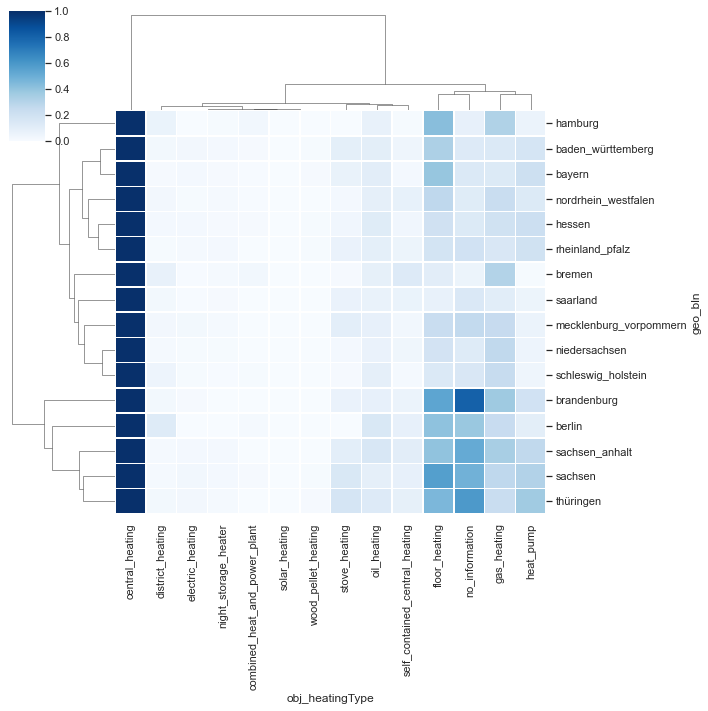

In [115]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and heating types

Most of the homes use central heating. Sachsen and Brandenburg do use also more floor heating.

In [116]:
grouped = df_full.groupby(['obj_heatingType','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_heatingType', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_heatingType         central_heating  combined_heat_and_power_plant  \
geo_bln                                                                  
baden_württemberg             629422.04                      641420.28   
bayern                        727510.38                      798483.45   
berlin                       1195684.97                      567487.65   
brandenburg                   566494.41                      522539.17   
bremen                        393886.42                      365081.43   
hamburg                       981124.85                      629445.17   
hessen                        623618.36                      556628.79   
mecklenburg_vorpommern        343041.05                      232450.00   
niedersachsen                 348579.13                      595686.19   
nordrhein_westfalen           471675.49                      550192.63   
rheinland_pfalz               356985.86                      516002.28   
saarland                      326558.54                      583350.00   
sachsen                       359842.21                      370737.54   
sachsen_anhalt                260232.87                     2717700.00   
schleswig_holstein            448951.85                      430214.58   
thüringen                     285936.28                      350000.00   

obj_heatingType         district_heating  electric_heating  floor_heating  \
geo_bln                                                                     
baden_württemberg              790173.08         503061.62      601386.70   
bayern                        1186980.25         463930.28      845092.93   
berlin                        1914790.51         463837.69      761043.35   
brandenburg                    723167.16         158343.48      525823.29   
bremen                         324639.36         195350.00      465932.90   
hamburg                        697419.45         473346.15      983965.95   
hessen                         699273.61         333964.54      737578.91   
mecklenburg_vorpommern         516625.31         192302.34      387122.55   
niedersachsen                  420229.91         150672.00      430097.91   
nordrhein_westfalen            567566.27         318606.64      559654.39   
rheinland_pfalz                607154.39         186063.46      464788.78   
saarland                       406284.48         206026.32      447453.41   
sachsen                        525485.92         185138.29      668463.10   
sachsen_anhalt                 298256.56         102644.85      312748.90   
schleswig_holstein             454849.01         254637.03      611346.09   
thüringen                      646277.78         178783.33      300317.30   

obj_heatingType         gas_heating  heat_pump  night_storage_heater  \
geo_bln                                                                
baden_württemberg         655861.52  598561.49             397841.78   
bayern                    825229.98  762575.95             481800.20   
berlin                   1019571.32  714507.67            1272666.67   
brandenburg               559659.86  465051.11             162266.67   
bremen                    405003.64  583635.42             238650.00   
hamburg                  1381965.87  897106.36             528741.67   
hessen                    602698.60  677862.45             288552.08   
mecklenburg_vorpommern    328575.54  462494.97             256633.33   
niedersachsen             343028.81  454049.85             201417.74   
nordrhein_westfalen       499553.57  527514.98             303908.25   
rheinland_pfalz           383545.31  438080.99             194054.31   
saarland                  311224.41  378896.97             163730.34   
sachsen                   381566.49  427283.54             237221.28   
sachsen_anhalt            250253.97  347039.38             106583.46   
schleswig_holstein        464080.83  653918.12             248007.69   
thüringen                 298907.54  400581.18          

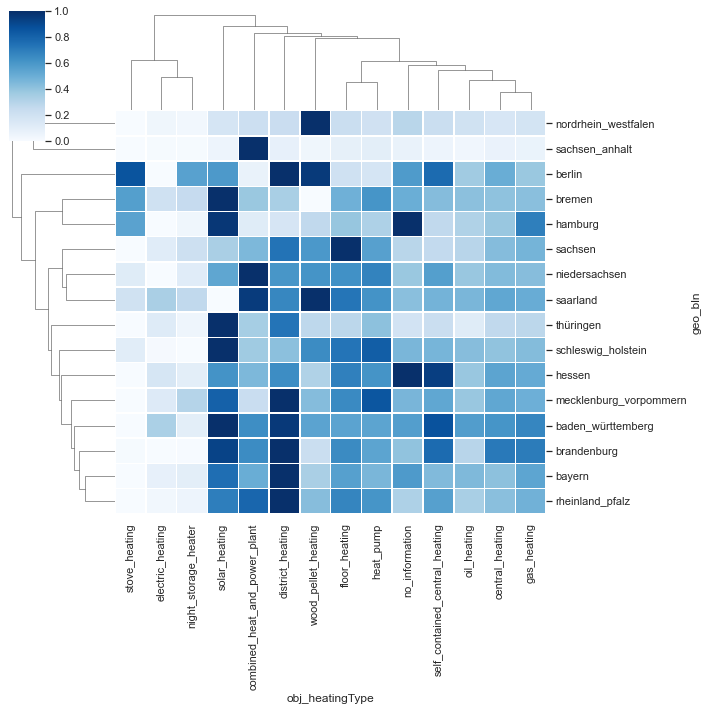

In [117]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and heating types

District heating is by far the most expensive. Solar heating seems to be expensive as well. Stove heating is interesting, since it is being used in Saarland, Mecklenburg Vorpommern, Hamburg and Bremen. It is most expensive in Hamburg. 

In [118]:
grouped = df_full.groupby('obj_cellar').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_cellar').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_cellar','URL']], left_on='obj_cellar', right_on='obj_cellar')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

obj_cellar  obj_purchasePrice  obj_livingSpace  obj_lotArea  \
0      False          421649.54           203.94      1467.98   
1       True          575822.30           210.17      1128.56   

   obj_noParkSpaces  obj_noRooms  obj_numberOfFloors  obj_picturecount  \
0              2.66         6.27                2.05             11.31   
1              2.87         7.04                2.37             16.94   

   obj_pricetrendrent  obj_thermalChar  ...  obj_lastRefurbish  \
0                4.05           132.84  ...            2010.31   
1                3.99           168.43  ...            2009.80   

   obj_yearConstructed  word_count  word_count_upper  beschreibung_length  \
0              1972.28      331.12              4.73              2651.63   
1              1961.41      366.75              4.42              2828.69   

   price_per_m²_living  price_per_m²_property  obj_telekomDownloadSpeed  \
0              2361.42                 769.84                     70.39   
1              2950.53                1158.37                     74.58   

   bev_pro_km2  Amount_offers  
0       625.84         252680  
1       903.88         145808  

[2 rows x 21 columns]

In [119]:
grouped = df_full.groupby(['obj_cellar','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_cellar','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_cellar','geo_bln'], right_on=['obj_cellar','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_cellar','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_cellar', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_cellar              False  True 
geo_bln                             
baden_württemberg       22760  22416
bayern                  25718  21464
berlin                   4918   3770
brandenburg             15045   4484
bremen                   1781   1304
hamburg                  2870   2082
hessen                  18381  15020
mecklenburg_vorpommern   7565   1772
niedersachsen           35458  12882
nordrhein_westfalen     44853  30483
rheinland_pfalz         22379  12245
saarland                 4166   2482
sachsen                 16054   4934
sachsen_anhalt          11089   3385
schleswig_holstein      13166   5480
thüringen                6477   1605

E:\Data\Coding\lib\site-packages\seaborn\matrix.py:714: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set_xlim(0, max_dependent_coord * 1.05)


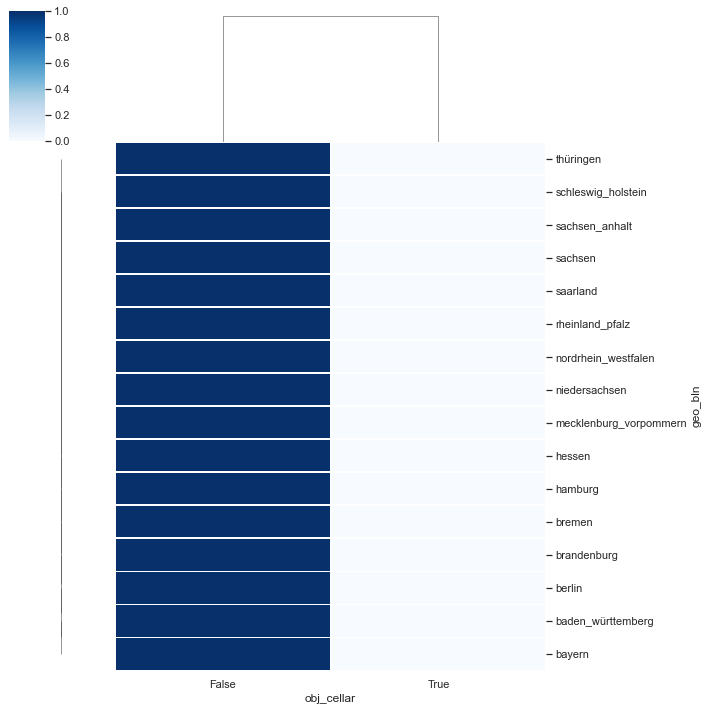

In [120]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and cellar

A cellar seems to be something special, since the houses without a cellar outnumber the houses with a cellar in all states.

In [121]:
grouped = df_full.groupby(['obj_cellar','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_cellar', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_cellar                  False      True 
geo_bln                                     
baden_württemberg       531278.70  632703.53
bayern                  602933.78  852495.40
berlin                 1224606.53  992137.95
brandenburg             406855.08  553252.35
bremen                  380252.26  344444.68
hamburg                 931550.93 1061816.59
hessen                  504119.05  673199.01
mecklenburg_vorpommern  297951.59  319600.52
niedersachsen           328675.85  351786.37
nordrhein_westfalen     403536.04  514471.97
rheinland_pfalz         301988.87  379791.36
saarland                261685.69  274437.41
sachsen                 292958.48  483437.42
sachsen_anhalt          202485.27  238410.05
schleswig_holstein      458021.27  495427.30
thüringen               208167.55  290823.73

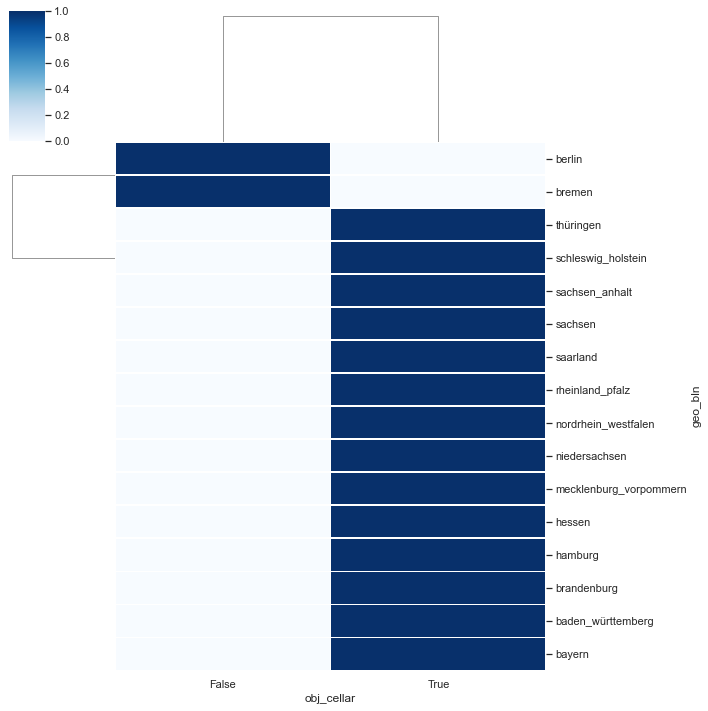

In [122]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and cellar

The cellar has also implications on the price, since it is usually more expensive (except in Berlin and Bremen). The difference in pricing is very small in Berlin and Bremen.

In [123]:
grouped = df_full.groupby('obj_barrierFree').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_barrierFree').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_barrierFree','URL']], left_on='obj_barrierFree', right_on='obj_barrierFree')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

obj_barrierFree  obj_purchasePrice  obj_livingSpace  obj_lotArea  \
0           False          473192.53           206.35      1350.09   
1            True          579478.57           203.51      1212.38   

   obj_noParkSpaces  obj_noRooms  obj_numberOfFloors  obj_picturecount  \
0              2.80         6.57                2.22             13.24   
1              2.47         6.13                2.02             16.07   

   obj_pricetrendrent  obj_thermalChar  ...  obj_lastRefurbish  \
0                4.02           152.16  ...            2009.77   
1                4.13           126.11  ...            2012.89   

   obj_yearConstructed  word_count  word_count_upper  beschreibung_length  \
0              1966.61      343.12              4.60              2706.92   
1              1995.32      365.80              4.92              2914.10   

   price_per_m²_living  price_per_m²_property  obj_telekomDownloadSpeed  \
0              2555.23                 905.25                     72.29   
1              3029.90                1052.62                     71.78   

   bev_pro_km2  Amount_offers  
0       730.23         380232  
1       674.86          18256  

[2 rows x 21 columns]

In [124]:
grouped = df_full.groupby(['obj_barrierFree','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_barrierFree','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_barrierFree','geo_bln'], right_on=['obj_barrierFree','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_barrierFree','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_barrierFree', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_barrierFree         False  True 
geo_bln                             
baden_württemberg       43348   1828
bayern                  44850   2332
berlin                   8266    422
brandenburg             18588    941
bremen                   3009     76
hamburg                  4777    175
hessen                  31871   1530
mecklenburg_vorpommern   8940    397
niedersachsen           46098   2242
nordrhein_westfalen     72182   3154
rheinland_pfalz         32918   1706
saarland                 6388    260
sachsen                 19566   1422
sachsen_anhalt          13875    599
schleswig_holstein      17813    833
thüringen                7743    339

E:\Data\Coding\lib\site-packages\seaborn\matrix.py:714: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set_xlim(0, max_dependent_coord * 1.05)


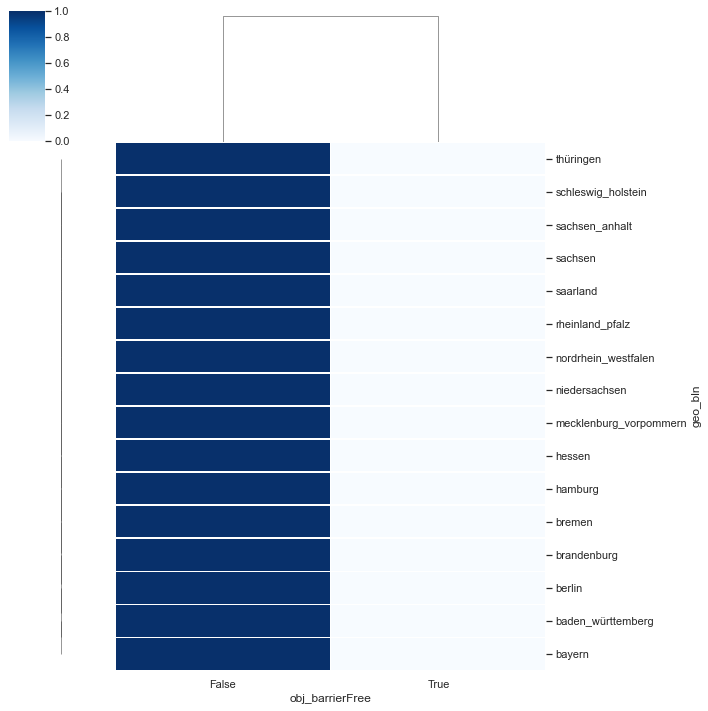

In [125]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and barrier free

Most of the houses are not barrier free. 

## Time

In [126]:
#Transform method taking points as param
def transform_years(years):
    if years < 1500:
        return "Before 1500"
    elif years >= 1500 and years < 1600:
        return "1500-1599" 
    elif years >= 1600 and years < 1700:
        return "1600-1699"  
    elif years >= 1700 and years < 1800:
        return "1700-1799" 
    elif years >= 1800 and years < 1850:
        return "1800-1849" 
    elif years >= 1850 and years < 1900:
        return "1850-1899" 
    elif years >= 1900 and years < 1910:
        return "1900-1909" 
    elif years >= 1910 and years < 1920:
        return "1910-1919" 
    elif years >= 1920 and years < 1930:
        return "1920-1929" 
    elif years >= 1920 and years < 1930:
        return "1920-1929" 
    elif years >= 1930 and years < 1940:
        return "1930-1939" 
    elif years >= 1940 and years < 1950:
        return "1940-1949" 
    elif years >= 1950 and years < 1960:
        return "1950-1959" 
    elif years >= 1960 and years < 1970:
        return "1960-1969" 
    elif years >= 1970 and years < 1980:
        return "1970-1979" 
    elif years >= 1980 and years < 1990:
        return "1980-1989" 
    elif years >= 1990 and years < 2000:
        return "1990-1999" 
    elif years >= 2000 and years < 2010:
        return "2000-2009" 
    elif years >= 2010 and years <= 2019:
        return "2010-2019"
    elif years > 2019:
        return "Future"
    else:
        return "Not known"

#Applying transform method and assigning result to new column "points_simplified"
df_full = df_full.assign(Constructed_years_category = df_full['obj_yearConstructed'].apply(transform_years))
df_full[['obj_yearConstructed','Constructed_years_category']].head(10)

obj_yearConstructed Constructed_years_category
0              1964.00                  1960-1969
1              1975.00                  1970-1979
2              1962.00                  1960-1969
3              1973.00                  1970-1979
4              1994.00                  1990-1999
5              2019.00                  2010-2019
6                  nan                  Not known
7              1900.00                  1900-1909
8              1955.00                  1950-1959
9              1973.00                  1970-1979

## ↑ For construction year, we need to categorize the data first

In [127]:
grouped = df_full.groupby('Constructed_years_category').mean()
grouped = grouped[['obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('Constructed_years_category').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['Constructed_years_category','URL']], left_on='Constructed_years_category', right_on='Constructed_years_category')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_yearConstructed', ascending=False).reset_index(drop="True")
grouped

Constructed_years_category  obj_yearConstructed  obj_purchasePrice  \
0                      Future              2021.21          492959.47   
1                   2010-2019              2016.52          612333.75   
2                   2000-2009              2003.79          603096.37   
3                   1990-1999              1994.96          531034.46   
4                   1980-1989              1983.78          508615.87   
5                   1970-1979              1974.42          485724.19   
6                   1960-1969              1964.18          465214.72   
7                   1950-1959              1954.50          398424.08   
8                   1940-1949              1945.48          343229.89   
9                   1930-1939              1933.97          386179.14   
10                  1920-1929              1923.75          398006.30   
11                  1910-1919              1912.10          456502.34   
12                  1900-1909              1901.69          360750.15   
13                  1850-1899              1879.96          423099.60   
14                  1800-1849              1819.88          325371.31   
15                  1700-1799              1747.29          471287.58   
16                  1600-1699              1643.11          433746.82   
17                  1500-1599              1551.65          608753.22   
18                Before 1500              1322.42          883834.04   
19                  Not known                  nan          475224.98   

    obj_livingSpace  obj_lotArea  obj_noParkSpaces  obj_noRooms  \
0            162.63       724.83              3.57         5.15   
1            174.31       774.29              3.26         5.42   
2            209.69      1036.78              2.35         5.93   
3            198.04      1426.57              2.56         6.46   
4            199.47      1122.83              3.71         6.56   
5            208.13      1139.94              2.30         6.73   
6            202.35      1265.44              2.61         7.03   
7            188.55      1221.81              2.41         6.87   
8            185.60      2491.81              2.56         6.69   
9            181.61      1394.89              2.35         6.68   
10           208.08      2560.94              2.59         7.46   
11           245.18      1655.97              3.09         8.58   
12           254.42      1777.29              2.86         8.35   
13           275.16      2442.75              3.13         8.62   
14           223.07      2914.73              3.36         7.68   
15           266.72      2715.89              3.57         8.58   
16           247.58      2124.96              3.29         8.42   
17           318.04      2939.53              4.01         9.97   
18           382.72      4101.12              7.22         9.87   
19           234.36      1536.62              2.35         6.27   

    obj_numberOfFloors  obj_picturecount  obj_pricetrendrent  ...  \
0                 2.01             12.18                4.05  ...   
1                 2.17             13.75                4.33  ...   
2                 2.28             15.35                4.35  ...   
3                 2.29             15.72                4.27  ...   
4                 2.27             15.67                4.09  ...   
5                 2.14             15.48                3.97  ...   
6                 2.23             14.20                3.94  ...   
7                 2.31             12.95                3.80  ...   
8                 2.28             12.45                3.84  ...   
9                 2.28             12.75                4.20  ...   
10                2.40             12.10                3.70  ...   
11                2.50             11.94                3.54  ...   
12                2.50             10.96                3.50  ...   
13                2.45             12.21                3.48  ...   
14                2.34    

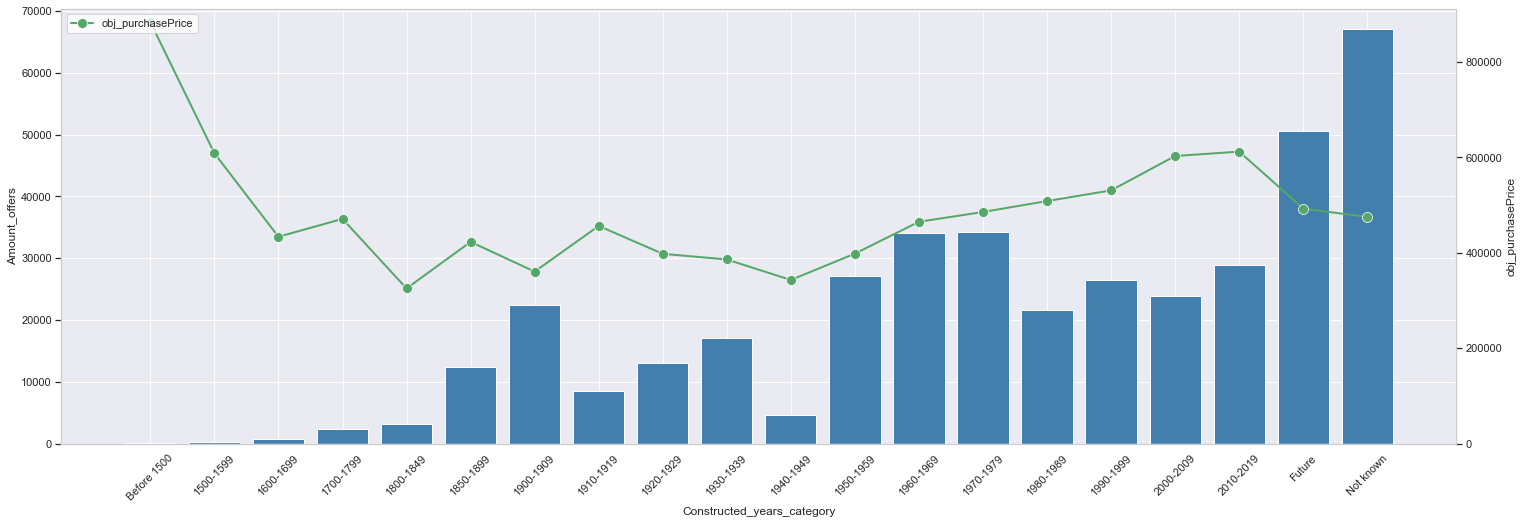

In [128]:
sns.set(font_scale = 1.2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 2, 'lines.markersize': 10})
plt.figure(figsize=(25,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('obj_yearConstructed')
ax= sns.barplot(x = 'Constructed_years_category', y = 'Amount_offers',  label='Amount_offers', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'Constructed_years_category', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
ax.xaxis.grid(True)
plt.show()

(1800.0, 2020.0)

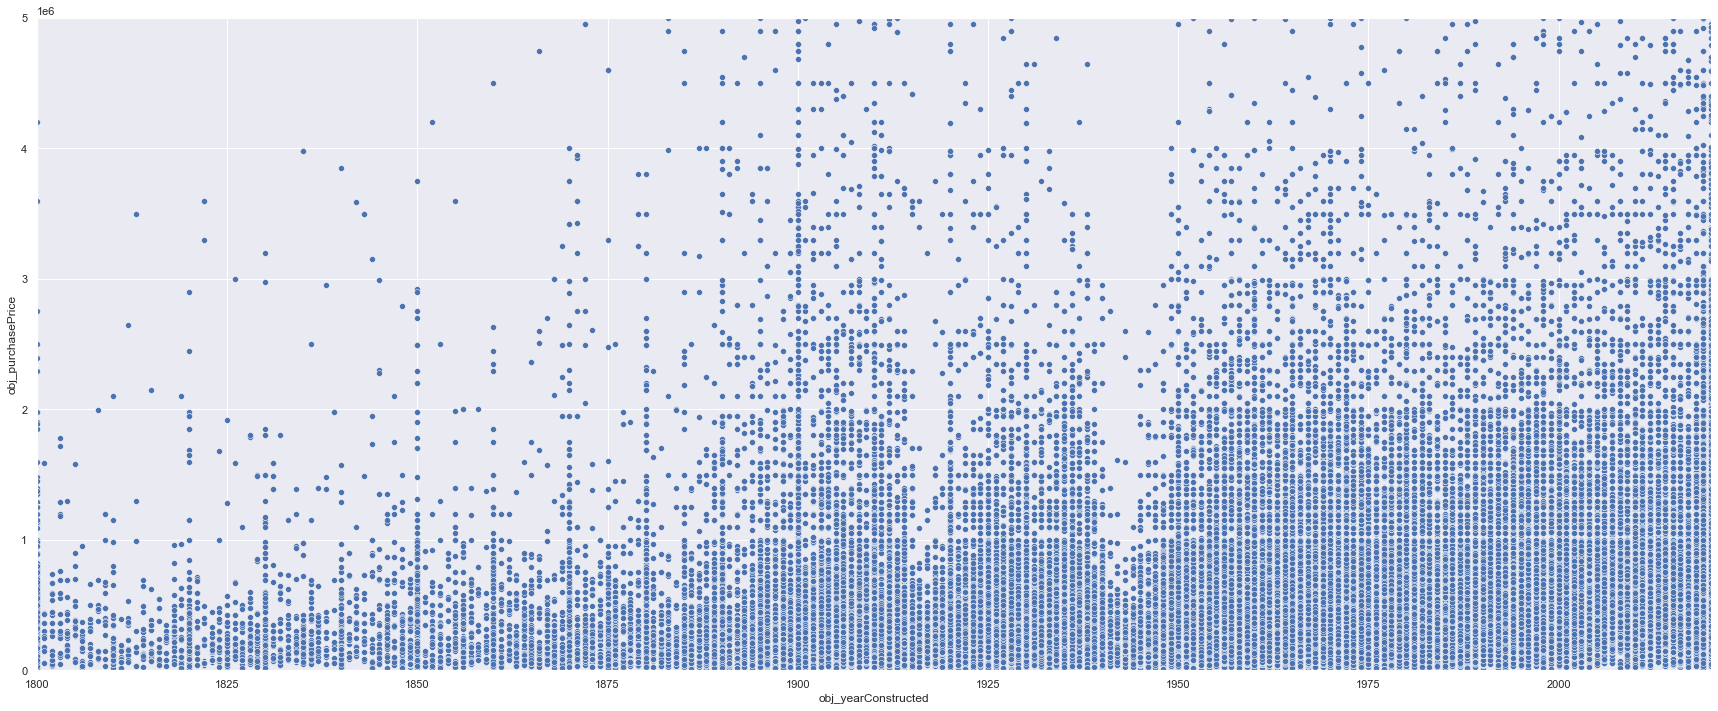

In [129]:
sns.set(font_scale = 1)
plt.figure(figsize=(30,12))
sns.scatterplot(x = 'obj_yearConstructed', y = 'obj_purchasePrice', data=df_full)
plt.ylim(0, 5000000)
plt.xlim(1800, 2020)

## ↑ Houses by construction year

Interesting! Do you see the drope between 1900-1925 and 1925-1950. That is due to the first and second World War. Also we see that many houses have been constructed in the year 1900. We dont know if this is true or just being claimed by the owner ;).

In [130]:
grouped = df_full.groupby(['Constructed_years_category','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['Constructed_years_category','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['Constructed_years_category','geo_bln'], right_on=['Constructed_years_category','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['Constructed_years_category','geo_bln','Amount_offers']]
grouped = grouped.pivot(index='geo_bln', columns='Constructed_years_category', values='Amount_offers')
grouped = grouped.reindex(['Before 1500','1500-1599', '1600-1699','1700-1799','1800-1849','1850-1899','1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','Future','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

Constructed_years_category  Before 1500  1500-1599  1600-1699  1700-1799  \
geo_bln                                                                    
baden_württemberg                 33.00      58.00     108.00     283.00   
bayern                            22.00      54.00      79.00     246.00   
berlin                            12.00       0.00       1.00       2.00   
brandenburg                        0.00       0.00       1.00      97.00   
bremen                             0.00       0.00       1.00       2.00   
hamburg                            0.00       0.00       0.00      28.00   
hessen                            11.00      44.00     129.00     367.00   
mecklenburg_vorpommern             6.00       2.00      13.00      67.00   
niedersachsen                      8.00      31.00      97.00     252.00   
nordrhein_westfalen               20.00       7.00      98.00     324.00   
rheinland_pfalz                    8.00      27.00      62.00     257.00   
saarland                           0.00       0.00       0.00       9.00   
sachsen                            6.00       9.00      41.00     181.00   
sachsen_anhalt                     5.00      14.00      29.00     122.00   
schleswig_holstein                 0.00      14.00      50.00      92.00   
thüringen                         10.00       3.00       8.00      58.00   

Constructed_years_category  1800-1849  1850-1899  1900-1909  1910-1919  \
geo_bln                                                                  
baden_württemberg              368.00     903.00    1628.00     667.00   
bayern                         290.00     778.00    1156.00     326.00   
berlin                           2.00     159.00     296.00     185.00   
brandenburg                    102.00     532.00    1033.00     345.00   
bremen                          20.00      82.00     212.00      95.00   
hamburg                         15.00     104.00     156.00      93.00   
hessen                         231.00     862.00    1652.00     536.00   
mecklenburg_vorpommern          96.00     497.00     898.00     300.00   
niedersachsen                  431.00    1706.00    2177.00     774.00   
nordrhein_westfalen            435.00    1711.00    4126.00    2377.00   
rheinland_pfalz                322.00    1042.00    2457.00     571.00   
saarland                        66.00     191.00     528.00     225.00   
sachsen                        492.00    1905.00    2293.00     791.00   
sachsen_anhalt                 126.00    1008.00    2033.00     524.00   
schleswig_holstein             108.00     624.00     698.00     400.00   
thüringen                       57.00     382.00    1091.00     246.00   

Constructed_years_category  1920-1929  1930-1939  1940-1949  1950-1959  \
geo_bln                                                                  
baden_württemberg             1264.00    1467.00     462.00    3535.00   
bayern                         823.00    1299.00     424.00    2786.00   
berlin                         367.00     959.00      96.00     243.00   
brandenburg                    836.00    1579.00     207.00     400.00   
bremen                         153.00     242.00      48.00     546.00   
hamburg                        178.00     244.00      54.00     420.00   
hessen                         992.00    1044.00     348.00    2322.00   
mecklenburg_vorpommern         284.00     634.00     137.00     418.00   
niedersachsen                 1025.00    1588.00     481.00    3614.00   
nordrhein_westfalen           2758.00    2992.00    1035.00    7234.00   
rheinland_pfalz               1117.00    1227.00     501.00    2332.00   
saarland                       512.00     400.00     140.00     911.00   
sachsen                        901.00    1388.00     174.00     346.00   
sachsen_anhalt                1031.00     992.00     180.00     434.00   
schleswig_holstein             416.00     556.00     210.00    1362.00   
thüringen                      389.00   

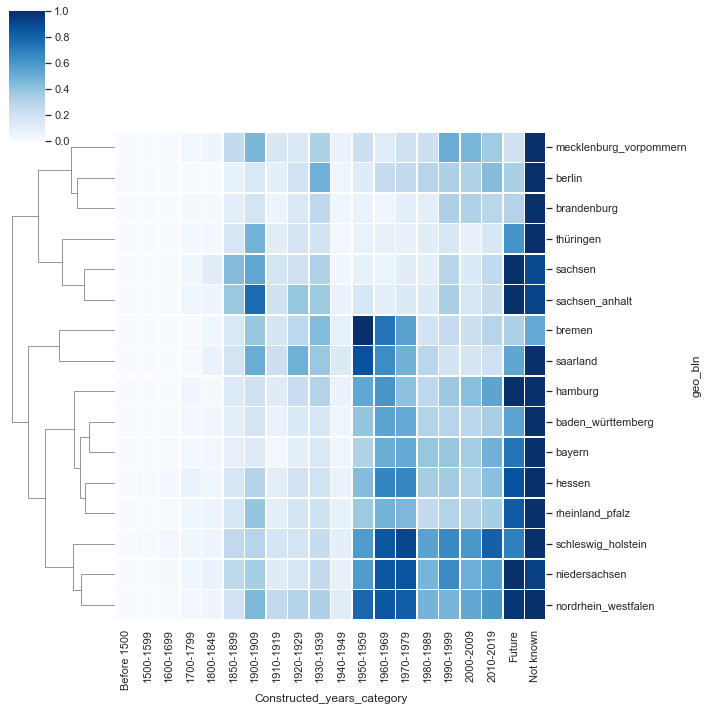

In [131]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

## ↑ Clustermap: Amount of houses by Region and construction year

This confirms the previous observation, between 1910-1919 and 1940-1949 there is almost no building activity. Interestingly: After WW2 the building activity starts again, but not in all regions. Eastern Germany (Brandenburg, Sachsen, Mecklenburg-Vorpommern, Thüringen, Sachsen-Anhalt and Berlin) seems to have less activity in those years. That could be due to the fact that the GDR did not pursued in building new family-houses after the second WW2.

Also interesting is the clustering on the side: One cluster for Brandenburg, Mecklenburg-Vorpommern, Sachsen Anhalt and Sachsen and the other regions in the other cluster.

In [132]:
grouped = df_full.groupby(['Constructed_years_category','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='Constructed_years_category', values='obj_purchasePrice')
grouped = grouped.reindex(['Before 1500','1500-1599', '1600-1699','1700-1799','1800-1849','1850-1899','1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','Future','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

Constructed_years_category  Before 1500  1500-1599  1600-1699  1700-1799  \
geo_bln                                                                    
baden_württemberg            1087909.09  619315.50  409094.44  493171.02   
bayern                        760113.64  869342.57  901188.59  753533.74   
berlin                        399166.67       0.00  530000.00  860000.00   
brandenburg                        0.00       0.00   48000.00  949929.90   
bremen                             0.00       0.00  510000.00  449000.00   
hamburg                            0.00       0.00       0.00  420892.86   
hessen                        638090.91  456563.64  376510.85  404214.85   
mecklenburg_vorpommern        730933.33 3772500.00  264492.31  345917.16   
niedersachsen                 790500.00  449290.32  344006.70  425750.08   
nordrhein_westfalen           882890.00  486500.00  468671.94  384196.29   
rheinland_pfalz               830437.50  424629.63  257922.26  266436.30   
saarland                           0.00       0.00       0.00  544000.00   
sachsen                       394916.67  409111.11  189951.22  305191.71   
sachsen_anhalt               4447600.00  354000.00  180513.55  680393.24   
schleswig_holstein                 0.00  708357.14  651360.00  762043.48   
thüringen                      56970.00  750000.00  205437.50  145910.78   

Constructed_years_category  1800-1849  1850-1899  1900-1909  1910-1919  \
geo_bln                                                                  
baden_württemberg           469040.61  558923.17  552101.66  608431.40   
bayern                      612861.02 1079152.36  502167.18  988062.57   
berlin                     3349500.00 2881443.40 2635216.73 2382418.35   
brandenburg                 381137.25  430498.55  374054.74  438696.71   
bremen                      390715.00  560896.67  390081.56  502011.89   
hamburg                    1405466.67 2484644.23 2564230.77 1403963.66   
hessen                      301501.45  610431.26  461103.86  635971.89   
mecklenburg_vorpommern      477291.67  303111.95  193867.80  275671.60   
niedersachsen               214703.79  240159.67  274668.17  276576.78   
nordrhein_westfalen         355437.70  362439.42  364306.24  400864.74   
rheinland_pfalz             222492.22  234331.38  217483.09  238662.12   
saarland                     99543.03  151646.07  147824.04  144950.31   
sachsen                     172748.87  230895.20  266731.42  330037.39   
sachsen_anhalt              130345.00  135059.90  131612.07  227623.76   
schleswig_holstein          482572.22  534562.66  398056.99  441311.50   
thüringen                   163599.42  150725.07  145052.04  183660.12   

Constructed_years_category  1920-1929  1930-1939  1940-1949  1950-1959  \
geo_bln                                                                  
baden_württemberg           596659.73  564024.40  486613.81  526345.02   
bayern                      535667.23  551897.82  543227.11  555668.90   
berlin                     1511318.68  983518.81  536604.17  848692.59   
brandenburg                 384647.42  354946.89  266402.92  222635.90   
bremen                      319421.55  289671.55  289854.17  291772.82   
hamburg                    1213726.97  745966.80  573692.59  574513.33   
hessen                      433797.96  417939.67  326009.90  466473.88   
mecklenburg_vorpommern      229569.32  182884.81  195106.50  190294.03   
niedersachsen               267844.90  248809.85  356093.41  242884.66   
nordrhein_westfalen         382002.80  385105.68  355851.79  441618.69   
rheinland_pfalz             230848.09  232484.08  217368.90  280419.76   
saarland                    166819.82  208834.64  204206.21  195588.32   
sachsen                     338420.80  280331.87  194470.96  210237.29   
sachsen_anhalt              152578.22  153975.19  141967.46  130049.17   
schleswig_holstein          398829.69  359233.49  344741.43  335545.54   
thüringen                   157292.11  1

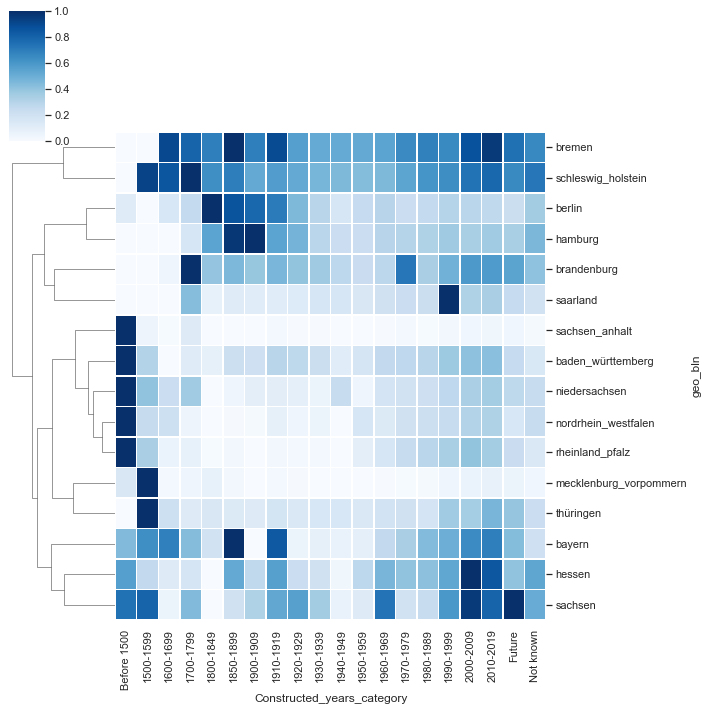

In [133]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

## ↑ Clustermap: Average price of houses by Region and construction year

Older houses (<1800) are more expensive. That could be due to the fact that these houses are old castles. Newer houses build 2000-2009 seem to be expensive as well.

In [134]:
grouped = df_full.groupby(['Constructed_years_category','geo_bln'])['obj_livingSpace'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='Constructed_years_category', values='obj_livingSpace')
grouped = grouped.reindex(['Before 1500','1500-1599', '1600-1699','1700-1799','1800-1849','1850-1899','1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','Future','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

Constructed_years_category  Before 1500  1500-1599  1600-1699  1700-1799  \
geo_bln                                                                    
baden_württemberg                285.57     284.86     204.30     223.60   
bayern                           368.33     340.28     361.11     354.11   
berlin                           198.09       0.00     114.00     293.28   
brandenburg                        0.00       0.00      78.00     333.51   
bremen                             0.00       0.00      86.00     125.00   
hamburg                            0.00       0.00       0.00     326.29   
hessen                           447.73     297.06     230.24     249.46   
mecklenburg_vorpommern           231.81    1610.00     208.54     349.61   
niedersachsen                    313.75     280.48     259.72     291.05   
nordrhein_westfalen              467.63     351.95     282.27     237.49   
rheinland_pfalz                  460.88     203.00     178.30     188.26   
saarland                           0.00       0.00       0.00     227.86   
sachsen                          233.04     489.67     248.33     281.97   
sachsen_anhalt                  1718.60     492.57     215.69     358.60   
schleswig_holstein                 0.00     255.13     219.92     236.33   
thüringen                        220.20     314.00     361.25     201.87   

Constructed_years_category  1800-1849  1850-1899  1900-1909  1910-1919  \
geo_bln                                                                  
baden_württemberg              214.74     237.89     219.71     221.77   
bayern                         261.66     247.84     235.03     272.92   
berlin                         670.00     560.66     658.08     564.09   
brandenburg                    272.52     318.68     256.04     262.91   
bremen                         242.62     194.29     228.78     214.58   
hamburg                        391.80     397.28     310.50     268.13   
hessen                         230.86     238.53     225.27     220.36   
mecklenburg_vorpommern         385.71     265.35     216.59     234.60   
niedersachsen                  209.38     226.26     363.41     235.20   
nordrhein_westfalen            228.69     235.02     256.81     220.25   
rheinland_pfalz                205.45     506.25     184.77     195.27   
saarland                       148.11     186.88     173.26     168.81   
sachsen                        187.40     282.89     306.64     338.60   
sachsen_anhalt                 198.10     253.74     222.98     252.09   
schleswig_holstein             205.16     216.46     217.69     225.57   
thüringen                      263.88     244.90     229.82     252.04   

Constructed_years_category  1920-1929  1930-1939  1940-1949  1950-1959  \
geo_bln                                                                  
baden_württemberg              200.49     185.70     183.00     179.68   
bayern                         200.66     187.36     205.21     191.90   
berlin                         345.97     178.39     121.66     178.31   
brandenburg                    204.92     159.04     169.43     168.12   
bremen                         134.02     138.39     150.04     134.49   
hamburg                        196.28     150.10     147.10     123.88   
hessen                         186.38     191.34     187.10     183.30   
mecklenburg_vorpommern         216.60     182.87     151.74     155.92   
niedersachsen                  209.69     190.11     208.80     160.76   
nordrhein_westfalen            201.97     190.43     200.09     229.03   
rheinland_pfalz                179.51     173.24     178.87     184.21   
saarland                       167.43     178.92     191.22     171.80   
sachsen                        295.21     207.15     195.44     214.33   
sachsen_anhalt                 205.18     171.79     154.95     159.64   
schleswig_holstein             187.22     146.60     142.06     151.78   
thüringen                      211.77   

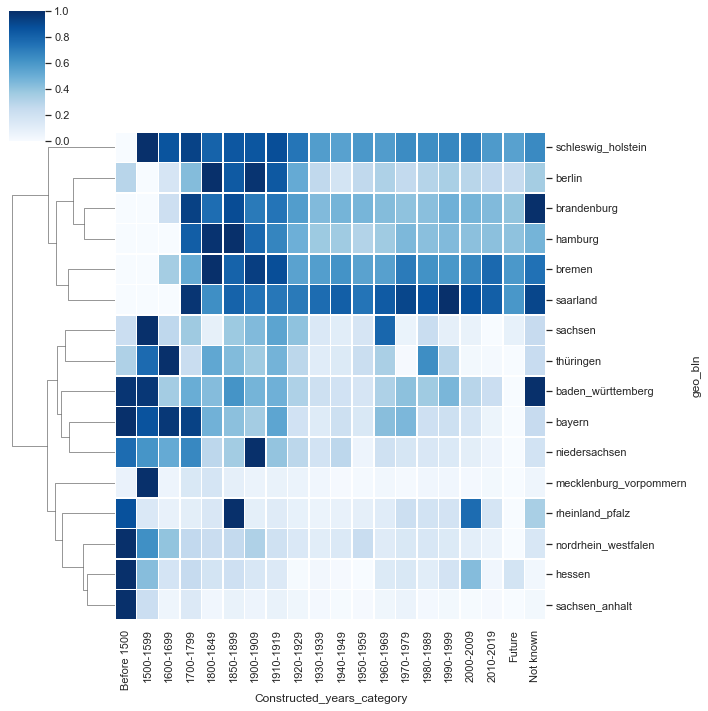

In [135]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

## ↑ Clustermap: Average size of houses by Region and construction year

In the old days, houses tended to be bigger than nowadays. An exception is Saarland, were houses are big throughout all the years. 

In [136]:
#Applying transform method and assigning result to new column "points_simplified"
df_full = df_full.assign(lastRefurbish_years_category = df_full['obj_lastRefurbish'].apply(transform_years))
df_full[['obj_lastRefurbish','lastRefurbish_years_category']].head(10)

obj_lastRefurbish lastRefurbish_years_category
0                nan                    Not known
1                nan                    Not known
2                nan                    Not known
3            2015.00                    2010-2019
4                nan                    Not known
5                nan                    Not known
6                nan                    Not known
7                nan                    Not known
8                nan                    Not known
9                nan                    Not known

In [137]:
grouped = df_full.groupby('lastRefurbish_years_category').mean()
grouped = grouped[['obj_lastRefurbish','obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('lastRefurbish_years_category').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['lastRefurbish_years_category','URL']], left_on='lastRefurbish_years_category', right_on='lastRefurbish_years_category')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('lastRefurbish_years_category', ascending=False).reset_index(drop="True")
grouped

lastRefurbish_years_category  obj_lastRefurbish  obj_yearConstructed  \
0                     Not known                nan              1972.26   
1                        Future            2023.20              1983.16   
2                   Before 1500             853.50              1958.00   
3                     2010-2019            2015.71              1957.80   
4                     2000-2009            2004.72              1945.08   
5                     1990-1999            1994.96              1932.19   
6                     1980-1989            1984.20              1929.14   
7                     1970-1979            1974.29              1920.39   
8                     1960-1969            1963.55              1915.97   
9                     1950-1959            1953.68              1894.78   
10                    1940-1949            1945.21              1917.04   
11                    1930-1939            1933.83              1897.83   
12                    1920-1929            1923.71              1892.43   
13                    1910-1919            1912.67              1927.93   
14                    1900-1909            1903.13              1879.73   
15                    1850-1899            1883.00              1850.00   
16                    1800-1849            1800.00              1800.00   
17                    1700-1799            1780.00                  nan   

    obj_purchasePrice  obj_livingSpace  obj_lotArea  obj_noParkSpaces  \
0           465658.19           202.87      1331.50              2.82   
1           687770.10           245.44       839.50              2.39   
2           485166.67           223.17       302.50               nan   
3           560354.89           216.94      1249.51              2.59   
4           498030.56           208.87      1494.61              2.58   
5           396345.82           219.34      2350.92              2.79   
6           427428.25           360.11      1399.69              2.63   
7           330965.20           181.81      1231.49             10.05   
8           361833.65           179.65       921.62              2.05   
9           248197.06           180.24      2421.40              2.09   
10          380409.09           219.91       934.82              1.75   
11          354208.33           310.89      1757.08              2.20   
12          382571.43           336.43       679.57              2.00   
13          991033.33           403.27      1180.53              2.89   
14          268913.04           427.70       298.09              3.19   
15          239000.00           216.00       953.00               nan   
16           80000.00           120.00      3087.00               nan   
17         2280000.00           260.00      2140.00              4.00   

    obj_noRooms  obj_numberOfFloors  obj_picturecount  ...  obj_thermalChar  \
0          6.36                2.15             12.34  ...           143.41   
1          7.24                2.31             16.32  ...           203.13   
2          8.67                3.00              7.67  ...              nan   
3          7.26                2.36             18.26  ...           156.12   
4          7.36                2.33             17.13  ...           178.12   
5          8.15                2.26             16.08  ...           203.69   
6          7.04                2.20             15.93  ...           238.72   
7          6.75                2.14             15.66  ...           252.63   
8          6.88                2.25             15.00  ...           288.14   
9          7.76                2.33             15.98  ...           335.51   
10         6.55                2.85             16.67  ...           233.50   
11        12.92                2.33              9.08  ...           233.50   
12        13.57                2.67             11.43  ...           150.42   
13        13.20                3.62             10.73  ...           184.83   
14  

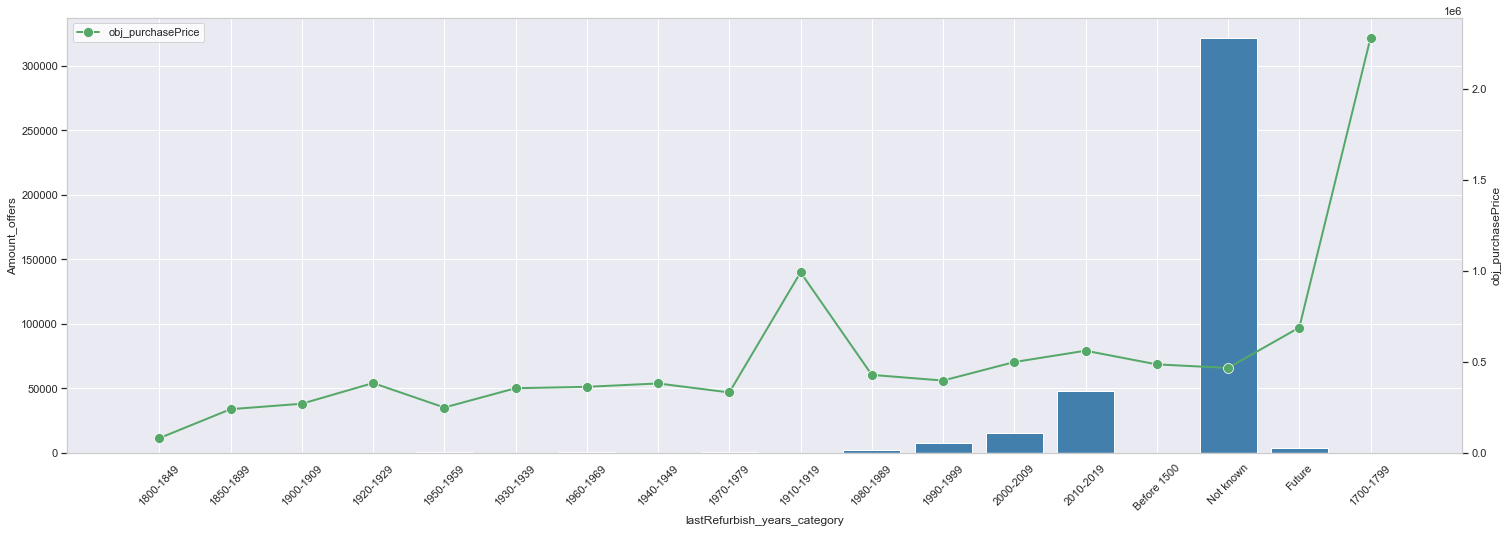

In [138]:
sns.set(font_scale = 1.2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 2, 'lines.markersize': 10})
plt.figure(figsize=(25,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('obj_yearConstructed')
ax= sns.barplot(x = 'lastRefurbish_years_category', y = 'Amount_offers',  label='Amount_offers', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'lastRefurbish_years_category', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
ax.xaxis.grid(True)
plt.show()

## ↑ Average price and amount by renovation year.

no clear pattern, except that the houses become more expensive

(1900.0, 2020.0)

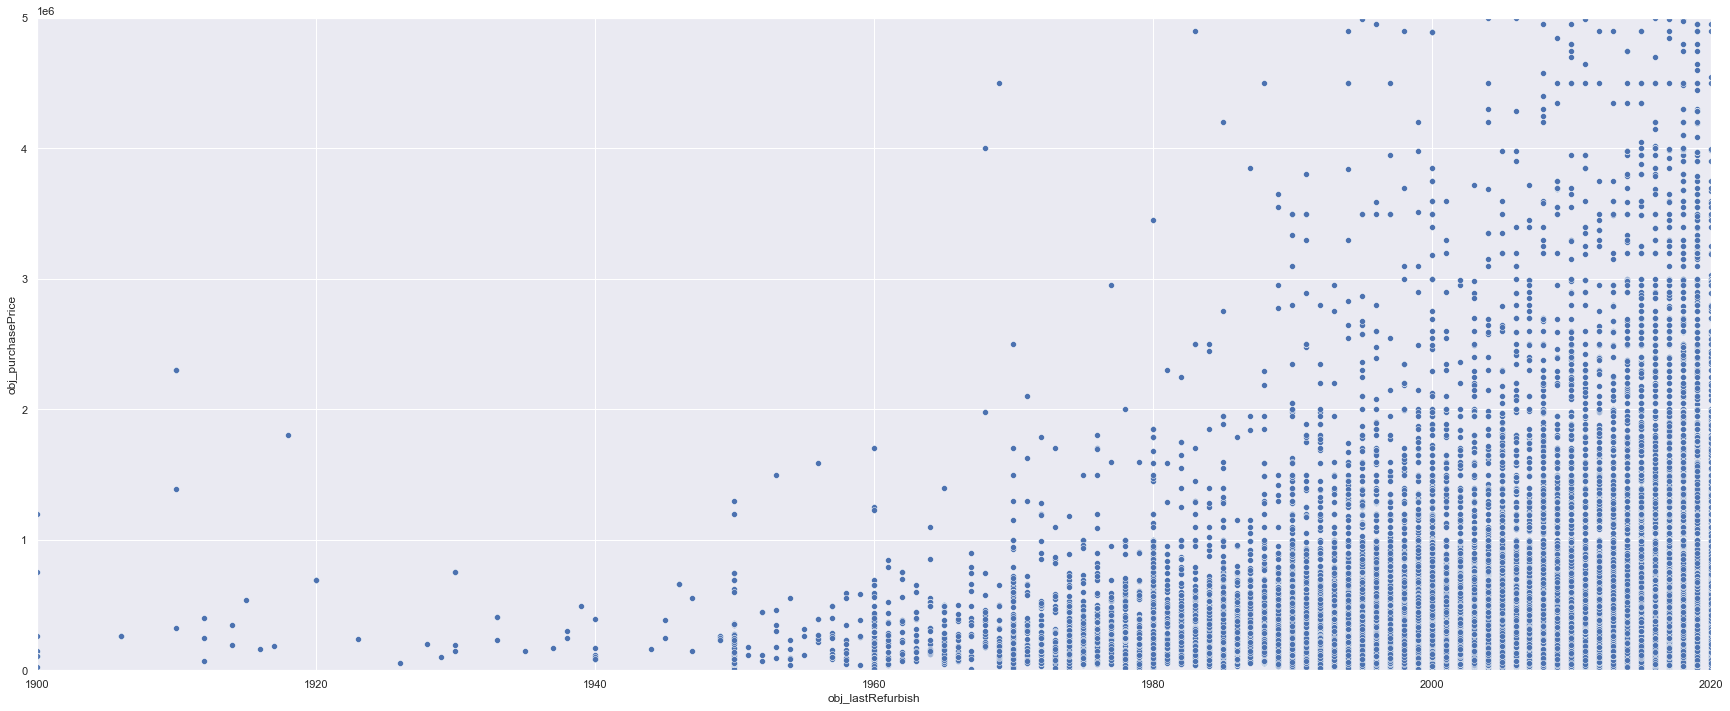

In [139]:
sns.set(font_scale = 1)
plt.figure(figsize=(30,12))
sns.scatterplot(x = 'obj_lastRefurbish', y = 'obj_purchasePrice', data=df_full)
plt.ylim(0, 5000000)
plt.xlim(1900, 2020)

In [140]:
grouped = df_full.groupby(['lastRefurbish_years_category','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['lastRefurbish_years_category','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['lastRefurbish_years_category','geo_bln'], right_on=['lastRefurbish_years_category','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['lastRefurbish_years_category','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='lastRefurbish_years_category', values='Amount_offers')
grouped = grouped.reindex(['Before 1500','1500-1599', '1600-1699','1700-1799','1800-1849','1850-1899','1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','Future','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

lastRefurbish_years_category  Before 1500  1500-1599  1600-1699  1700-1799  \
geo_bln                                                                      
baden_württemberg                    0.00       0.00       0.00       0.00   
bayern                               0.00       0.00       0.00       1.00   
berlin                               0.00       0.00       0.00       0.00   
brandenburg                          0.00       0.00       0.00       0.00   
bremen                               0.00       0.00       0.00       0.00   
hamburg                              0.00       0.00       0.00       0.00   
hessen                               0.00       0.00       0.00       0.00   
mecklenburg_vorpommern               0.00       0.00       0.00       0.00   
niedersachsen                        4.00       0.00       0.00       0.00   
nordrhein_westfalen                  1.00       0.00       0.00       0.00   
rheinland_pfalz                      0.00       0.00       0.00       0.00   
saarland                             0.00       0.00       0.00       0.00   
sachsen                              1.00       0.00       0.00       0.00   
sachsen_anhalt                       0.00       0.00       0.00       0.00   
schleswig_holstein                   0.00       0.00       0.00       0.00   
thüringen                            0.00       0.00       0.00       0.00   

lastRefurbish_years_category  1800-1849  1850-1899  1900-1909  1910-1919  \
geo_bln                                                                    
baden_württemberg                  0.00       0.00       0.00       2.00   
bayern                             0.00       0.00       0.00       5.00   
berlin                             0.00       0.00       0.00       0.00   
brandenburg                        0.00       0.00       0.00       2.00   
bremen                             0.00       0.00       0.00       0.00   
hamburg                            0.00       0.00       0.00       1.00   
hessen                             0.00       0.00       0.00       0.00   
mecklenburg_vorpommern             0.00       0.00       0.00       1.00   
niedersachsen                      0.00       0.00       0.00       0.00   
nordrhein_westfalen                0.00       0.00      19.00       2.00   
rheinland_pfalz                    0.00       0.00       0.00       2.00   
saarland                           0.00       0.00       0.00       0.00   
sachsen                            1.00       0.00       4.00       0.00   
sachsen_anhalt                     0.00       0.00       0.00       0.00   
schleswig_holstein                 0.00       1.00       0.00       0.00   
thüringen                          0.00       0.00       0.00       0.00   

lastRefurbish_years_category  1920-1929  1930-1939  1940-1949  1950-1959  \
geo_bln                                                                    
baden_württemberg                  0.00       1.00       1.00      26.00   
bayern                             1.00       1.00       2.00      11.00   
berlin                             0.00       0.00       0.00       2.00   
brandenburg                        0.00       0.00       0.00       4.00   
bremen                             0.00       0.00       0.00       2.00   
hamburg                            0.00       2.00      12.00       1.00   
hessen                             0.00       1.00       1.00      11.00   
mecklenburg_vorpommern             0.00       2.00       0.00       0.00   
niedersachsen                      0.00       0.00       1.00       2.00   
nordrhein_westfalen                1.00       3.00       9.00      37.00   
rheinland_pfalz                    0.00       0.00       1.00      15.00   
saarland                           1.00       0.00       0.00      18.00   
sachsen                            1.00       1.00       5.00       3.00   
sachsen_anhalt                     0.00       1.00       1.00       1.00   
schleswig_

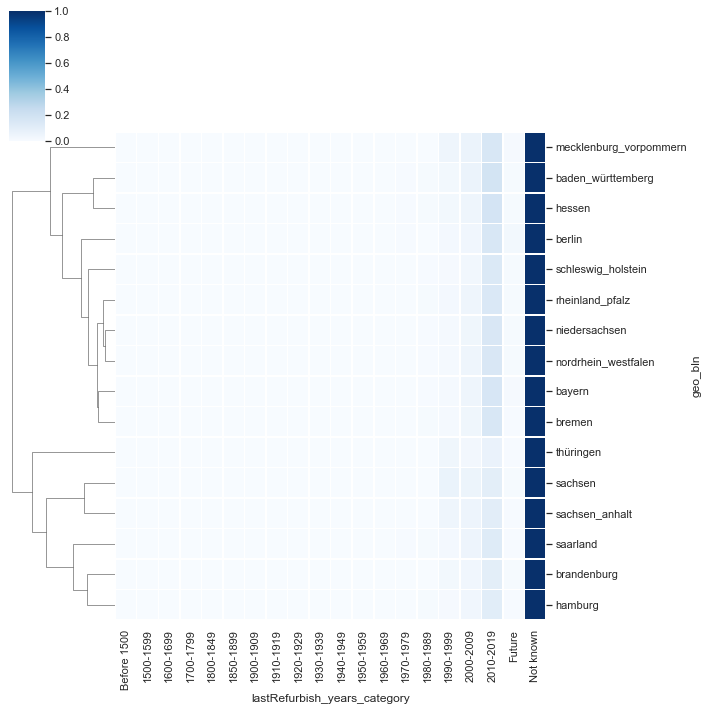

In [141]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

## ↑ Clustermap: Amount of houses by Region and renovation year

For sure, houses tend to be renovated within the last 30 years. For many offers, the values are not known.

In [142]:
grouped = df_full.groupby(['lastRefurbish_years_category','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='lastRefurbish_years_category', values='obj_purchasePrice')
grouped = grouped.reindex(['Before 1500','1500-1599', '1600-1699','1700-1799','1800-1849','1850-1899','1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','Future','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

lastRefurbish_years_category  Before 1500  1500-1599  1600-1699  1700-1799  \
geo_bln                                                                      
baden_württemberg                    0.00       0.00       0.00       0.00   
bayern                               0.00       0.00       0.00 2280000.00   
berlin                               0.00       0.00       0.00       0.00   
brandenburg                          0.00       0.00       0.00       0.00   
bremen                               0.00       0.00       0.00       0.00   
hamburg                              0.00       0.00       0.00       0.00   
hessen                               0.00       0.00       0.00       0.00   
mecklenburg_vorpommern               0.00       0.00       0.00       0.00   
niedersachsen                   269000.00       0.00       0.00       0.00   
nordrhein_westfalen            1800000.00       0.00       0.00       0.00   
rheinland_pfalz                      0.00       0.00       0.00       0.00   
saarland                             0.00       0.00       0.00       0.00   
sachsen                          35000.00       0.00       0.00       0.00   
sachsen_anhalt                       0.00       0.00       0.00       0.00   
schleswig_holstein                   0.00       0.00       0.00       0.00   
thüringen                            0.00       0.00       0.00       0.00   

lastRefurbish_years_category  1800-1849  1850-1899  1900-1909  1910-1919  \
geo_bln                                                                    
baden_württemberg                  0.00       0.00       0.00  374500.00   
bayern                             0.00       0.00       0.00 2118000.00   
berlin                             0.00       0.00       0.00       0.00   
brandenburg                        0.00       0.00       0.00  242750.00   
bremen                             0.00       0.00       0.00       0.00   
hamburg                            0.00       0.00       0.00 1800000.00   
hessen                             0.00       0.00       0.00       0.00   
mecklenburg_vorpommern             0.00       0.00       0.00  195000.00   
niedersachsen                      0.00       0.00       0.00       0.00   
nordrhein_westfalen                0.00       0.00  207789.47  159000.00   
rheinland_pfalz                    0.00       0.00       0.00  364000.00   
saarland                           0.00       0.00       0.00       0.00   
sachsen                        80000.00       0.00  559250.00       0.00   
sachsen_anhalt                     0.00       0.00       0.00       0.00   
schleswig_holstein                 0.00  239000.00       0.00       0.00   
thüringen                          0.00       0.00       0.00       0.00   

lastRefurbish_years_category  1920-1929  1930-1939  1940-1949  1950-1959  \
geo_bln                                                                    
baden_württemberg                  0.00  169500.00  550000.00  376880.77   
bayern                        100000.00  195000.00  255000.00  405545.45   
berlin                             0.00       0.00       0.00 1045000.00   
brandenburg                        0.00       0.00       0.00  358000.00   
bremen                             0.00       0.00       0.00  237000.00   
hamburg                            0.00  407000.00  660000.00  349000.00   
hessen                             0.00  248000.00  387000.00  247000.00   
mecklenburg_vorpommern             0.00  750000.00       0.00       0.00   
niedersachsen                      0.00       0.00  249000.00  134000.00   
nordrhein_westfalen           240000.00  343000.00  241444.44  137397.30   
rheinland_pfalz                    0.00       0.00   98500.00  264200.00   
saarland                      198000.00       0.00       0.00  109488.89   
sachsen                        55000.00  145000.00  100200.00  114333.33   
sachsen_anhalt                     0.00  150000.00  165000.00   39000.00   
schleswig_

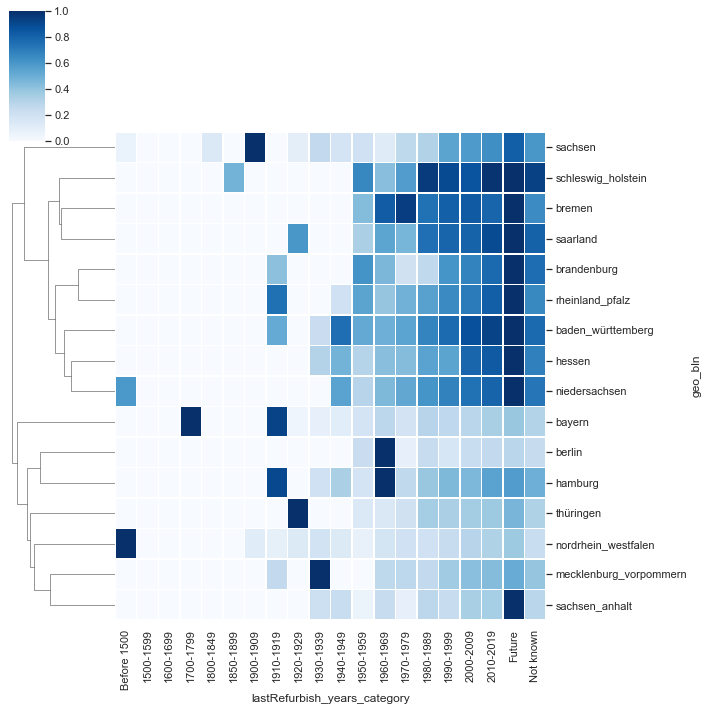

In [143]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

## ↑ Clustermap: Average price of houses by Region and renovation year

And houses are getting more expensive over the years.

In [144]:
df_full['obj_pricetrend'] = pd.to_numeric(df_full['obj_pricetrend'],errors='coerce')
df_full['obj_pricetrend'].head()

0   8.28
1   7.33
2   5.64
3   6.68
4   1.85
Name: obj_pricetrend, dtype: float64

In [145]:
#Transform method taking points as param
def transform_trend(pricetrend):
    if pricetrend < 2:
        return "Below 2"
    elif pricetrend >= 2 and pricetrend < 5:
        return "2-4" 
    elif pricetrend >= 5 and pricetrend < 8:
        return "5-7"  
    elif pricetrend >= 8 and pricetrend < 11:
        return "8-10" 
    elif pricetrend >= 11 and pricetrend < 14:
        return "11-13" 
    elif pricetrend >= 14 and pricetrend < 17:
        return "14-16" 
    elif pricetrend >= 17 and pricetrend < 20:
        return "17-19" 
    elif pricetrend > 19:
        return "Above or erqual 20"
    else:
        return "Not known"

#Applying transform method and assigning result to new column "points_simplified"
df_full = df_full.assign(obj_pricetrend_category = df_full['obj_pricetrend'].apply(transform_trend))
df_full[['obj_pricetrend','obj_pricetrend_category']].head(10)

obj_pricetrend obj_pricetrend_category
0            8.28                    8-10
1            7.33                     5-7
2            5.64                     5-7
3            6.68                     5-7
4            1.85                 Below 2
5            5.95                     5-7
6             nan               Not known
7            9.36                    8-10
8            0.78                 Below 2
9            2.03                     2-4

## ↑ For the pricetrend we need to create categories as well.

In [146]:
grouped = df_full.groupby('obj_pricetrend_category').mean()
grouped = grouped[['obj_pricetrend','obj_lastRefurbish','obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_pricetrend_category').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_pricetrend_category','URL']], left_on='obj_pricetrend_category', right_on='obj_pricetrend_category')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_pricetrend_category', ascending=False).reset_index(drop="True")
grouped

obj_pricetrend_category  obj_pricetrend  obj_lastRefurbish  \
0               Not known             nan            2008.49   
1                 Below 2            0.13            2008.43   
2      Above or erqual 20           21.65            2005.21   
3                    8-10            9.28            2010.54   
4                     5-7            6.60            2010.41   
5                     2-4            3.85            2009.27   
6                   17-19           17.93            2009.00   
7                   14-16           14.98            2009.60   
8                   11-13           12.21            2010.66   

   obj_yearConstructed  obj_purchasePrice  obj_livingSpace  obj_lotArea  \
0              1968.99          357791.99           200.41      1940.76   
1              1949.65          296945.60           208.28      1449.10   
2              1965.41          354569.66           211.35       845.64   
3              1970.68          539091.40           213.51      1068.24   
4              1969.44          498041.23           196.32      1300.84   
5              1960.49          434500.27           205.17      1262.12   
6              1961.04          431932.73          1924.94      1261.51   
7              1972.36          611573.83           212.36      1061.35   
8              1969.97          598062.05           208.06      1193.84   

   obj_noParkSpaces  obj_noRooms  obj_numberOfFloors  ...  obj_thermalChar  \
0              2.56         6.48                2.03  ...           139.40   
1              5.38         7.03                2.20  ...           166.92   
2              1.96         7.34                2.32  ...           160.47   
3              2.34         6.56                2.26  ...           152.39   
4              2.47         6.43                2.23  ...           153.01   
5              4.47         6.78                2.23  ...           158.34   
6              2.27         6.07                2.09  ...           135.21   
7              2.52         6.82                2.18  ...           132.12   
8              2.28         6.52                2.31  ...           146.37   

   obj_usableArea  word_count  word_count_upper  beschreibung_length  \
0          156.25      335.58              4.52              2684.70   
1          150.99      311.33              4.71              2470.40   
2          166.30      319.96              3.38              2504.59   
3          110.60      352.45              4.68              2767.69   
4          116.29      352.61              4.72              2776.23   
5          122.05      329.13              4.63              2602.20   
6          150.44      325.64              3.92              2524.82   
7          142.01      350.26              4.14              2750.81   
8          120.83      341.39              4.30              2677.49   

   price_per_m²_living  price_per_m²_property  obj_telekomDownloadSpeed  \
0              1880.89                 598.10                     64.67   
1              1561.43                 510.46                     68.00   
2              2091.73                 652.59                     71.06   
3              2912.22                1085.17                     73.23   
4              2748.44                 966.20                     74.46   
5              2311.25                 809.61                     71.95   
6              2398.75                 813.10                     80.84   
7              3131.34                1068.28                     77.20   
8              3158.03                1167.03                     75.24   

   bev_pro_km2  Amount_offers  
0       451.53          69970  
1       359.81          15512  
2       696.91            128  
3       819.22          98152  
4       831.44         126899  
5       602.54          47941  
6       894.55            501  
7       814.98           7424  
8       978.84          31961  

[9 rows x 22 columns]

In [147]:
grouped = df_full.groupby(['obj_pricetrend_category','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_pricetrend_category','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_pricetrend_category','geo_bln'], right_on=['obj_pricetrend_category','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_pricetrend_category','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_pricetrend_category', values='Amount_offers')
grouped = grouped.reindex(['Below 2','2-4','5-7','8-10','11-13','14-16','17-19','Above or erqual 20','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

obj_pricetrend_category  Below 2      2-4      5-7     8-10   11-13   14-16  \
geo_bln                                                                       
baden_württemberg         591.00  3288.00 11152.00 16862.00 9088.00  945.00   
bayern                   2070.00  7659.00 15273.00 12293.00 3248.00  351.00   
berlin                      0.00     0.00     1.00  1624.00 5370.00  448.00   
brandenburg               481.00   852.00  1481.00  4179.00 4990.00 2989.00   
bremen                      1.00   702.00  2082.00    16.00    1.00    0.00   
hamburg                     9.00   269.00  4333.00   184.00    8.00    1.00   
hessen                   2105.00  4042.00 11202.00 11878.00 1113.00   27.00   
mecklenburg_vorpommern    340.00   485.00  1429.00  1683.00  704.00   77.00   
niedersachsen             930.00  5092.00 19180.00 13266.00 3089.00  261.00   
nordrhein_westfalen       948.00 11587.00 38287.00 19553.00  442.00   12.00   
rheinland_pfalz          2335.00  5238.00  8123.00  6635.00 1182.00  236.00   
saarland                 2315.00  2523.00  1125.00    18.00    0.00    0.00   
sachsen                  2078.00  3719.00  3704.00  1117.00  257.00 1313.00   
sachsen_anhalt           1018.00  1647.00  1525.00  1709.00  653.00  330.00   
schleswig_holstein         20.00   346.00  7366.00  6637.00 1509.00  402.00   
thüringen                 271.00   492.00   636.00   498.00  307.00   32.00   

obj_pricetrend_category  17-19  Above or erqual 20  Not known  
geo_bln                                                        
baden_württemberg         7.00                0.00    3243.00  
bayern                   22.00                0.00    6266.00  
berlin                    0.00                0.00    1245.00  
brandenburg             161.00               84.00    4312.00  
bremen                    0.00                0.00     283.00  
hamburg                   0.00                0.00     148.00  
hessen                    0.00                0.00    3034.00  
mecklenburg_vorpommern   39.00                0.00    4580.00  
niedersachsen             0.00                0.00    6522.00  
nordrhein_westfalen       0.00                0.00    4507.00  
rheinland_pfalz           2.00                0.00   10873.00  
saarland                  0.00                0.00     667.00  
sachsen                 180.00               14.00    8606.00  
sachsen_anhalt           51.00                6.00    7535.00  
schleswig_holstein       16.00                0.00    2350.00  
thüringen                23.00               24.00    5799.00

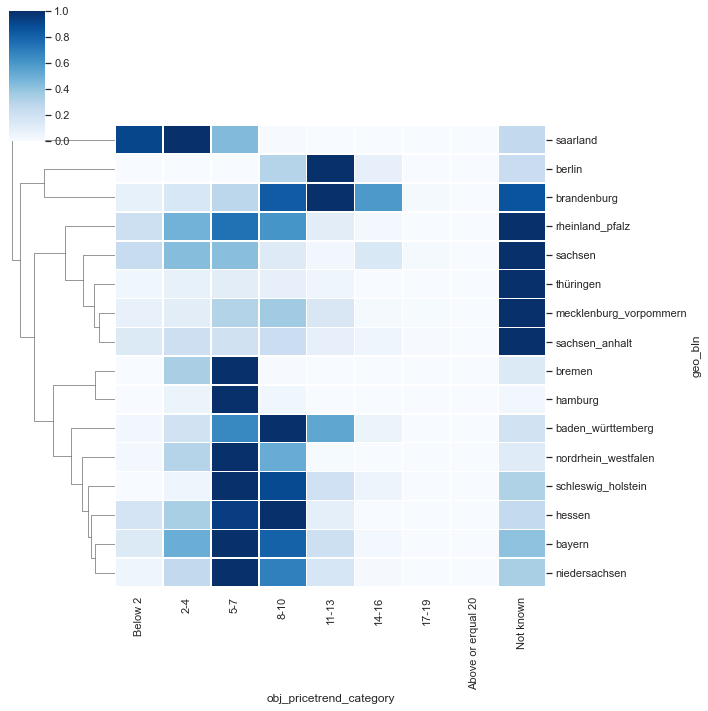

In [148]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

## ↑ Clustermap: Amount of houses by Region and pricetrend

Most of the houses with a pricetrend seem to sit in the 5-7 and 8-10 category. Interestingly: Berlin and Brandenburg have most of their houses are in the 11-13 category - becoming more expensive at a faster pace over time.

In [149]:
grouped = df_full.groupby(['obj_pricetrend_category','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_pricetrend_category', values='obj_purchasePrice')
grouped = grouped.reindex(['Below 2','2-4','5-7','8-10','11-13','14-16','17-19','Above or erqual 20','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

obj_pricetrend_category    Below 2       2-4       5-7       8-10      11-13  \
geo_bln                                                                        
baden_württemberg        371681.29 466956.33 596011.70  606806.90  622938.38   
bayern                   453801.72 880521.61 780805.82  651820.96  678349.30   
berlin                        0.00      0.00 679000.00  911973.44  962264.07   
brandenburg              214557.74 359090.94 532546.04  465789.33  447863.47   
bremen                   549000.00 279233.38 392446.94  666181.25  429000.00   
hamburg                 5489444.44 513199.42 908344.65 1619573.43 1518750.00   
hessen                   222846.91 336394.39 582045.24  712236.65  707194.88   
mecklenburg_vorpommern   224538.27 275137.83 318425.87  371220.79  442860.51   
niedersachsen            284902.66 320423.70 328783.40  379227.17  324302.88   
nordrhein_westfalen      405154.74 377691.18 442454.92  514494.49  715583.30   
rheinland_pfalz          244141.03 326195.73 369340.55  427481.63  463397.63   
saarland                 234861.95 303494.58 248801.27  162700.00       0.00   
sachsen                  339409.89 378525.36 359238.61  402592.56  569398.87   
sachsen_anhalt           210051.10 192808.40 202529.71  257685.83  175166.37   
schleswig_holstein       335540.00 354329.66 513307.24  434062.93  331565.99   
thüringen                221171.16 178494.43 258901.29  293516.50  357047.29   

obj_pricetrend_category      14-16      17-19  Above or erqual 20  Not known  
geo_bln                                                                       
baden_württemberg        655162.39 1203676.54                0.00  416913.66  
bayern                   550311.34  562359.09                0.00  602303.80  
berlin                   931726.58       0.00                0.00 2165847.04  
brandenburg              590588.64  454155.88           342325.35  314367.71  
bremen                        0.00       0.00                0.00  359193.93  
hamburg                 4500000.00       0.00                0.00 3015464.86  
hessen                   860314.81       0.00                0.00  579600.66  
mecklenburg_vorpommern   420157.25  348468.15                0.00  256122.21  
niedersachsen            299842.71       0.00                0.00  287092.86  
nordrhein_westfalen     3891583.33       0.00                0.00  368069.11  
rheinland_pfalz          495000.73  650000.00                0.00  241674.01  
saarland                      0.00       0.00                0.00  268491.73  
sachsen                  809969.90  496300.97           280421.43  219847.12  
sachsen_anhalt           121187.41  104378.43            78500.00  213878.84  
schleswig_holstein       324047.00  304468.75                0.00  561094.72  
thüringen                304546.75  350536.30           509695.33  209834.48

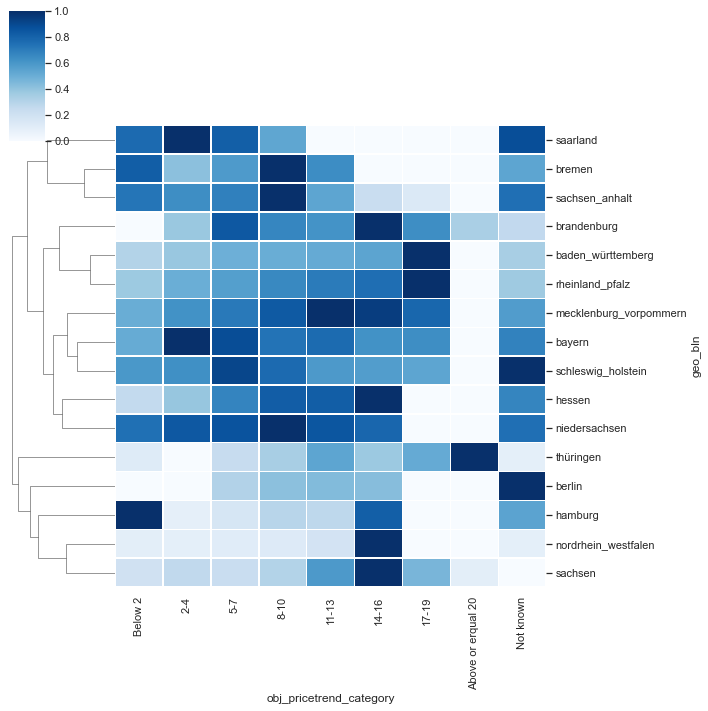

In [150]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

## ↑ Clustermap: Average price of houses by Region and pricetrend

There is no clear pattern in terms of pricing: No indication that pricetrend variable has an influence on the final housing price. 

## Expose features

In [151]:
grouped = df_full.groupby('ga_cd_via').mean()
grouped = grouped[['obj_pricetrend','obj_lastRefurbish','obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('ga_cd_via').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['ga_cd_via','URL']], left_on='ga_cd_via', right_on='ga_cd_via')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('ga_cd_via', ascending=False).reset_index(drop="True")
grouped

ga_cd_via  obj_pricetrend  obj_lastRefurbish  obj_yearConstructed  \
0           top            7.56            2009.86              1971.01   
1      standard            7.30            2009.87              1963.96   
2  schaufenster            7.93            2011.27              1982.21   
3       premium            7.76            2011.25              1974.66   

   obj_purchasePrice  obj_livingSpace  obj_lotArea  obj_noParkSpaces  \
0          475293.58           204.05      1375.47              2.90   
1          447887.86           206.28      1326.97              2.67   
2          976254.29           225.85      1090.87              2.24   
3          696031.19           221.56      1255.79              2.76   

   obj_noRooms  obj_numberOfFloors  ...  obj_thermalChar  obj_usableArea  \
0         6.44                2.18  ...           153.40          125.90   
1         6.62                2.21  ...           151.99          122.36   
2         6.57                2.42  ...           121.97          126.21   
3         6.95                2.35  ...           135.79          119.54   

   word_count  word_count_upper  beschreibung_length  price_per_m²_living  \
0      354.50              4.54              2809.12              2617.21   
1      324.56              4.61              2553.99              2425.84   
2      462.04              5.05              3614.68              4338.39   
3      411.02              5.32              3220.95              3308.72   

   price_per_m²_property  obj_telekomDownloadSpeed  bev_pro_km2  Amount_offers  
0                 901.60                     72.60       740.41         184768  
1                 860.98                     71.65       689.11         189203  
2                1942.55                     75.89      1136.40           3128  
3                1302.53                     73.83       899.53          21389  

[4 rows x 22 columns]

## ↑ Expose feature - type

There are four categories with different characteristics.

        -Standard: Ordinary expose
        -Top: Placed before all standard exposes
        -Premium: Bigger pictures and enhanced functions
        -Schaufenster: Similar to premium but without advertising of other companies

In [152]:
grouped = df_full.groupby(['ga_cd_via','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['ga_cd_via','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['ga_cd_via','geo_bln'], right_on=['ga_cd_via','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['ga_cd_via','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='ga_cd_via', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

ga_cd_via               premium  schaufenster  standard    top
geo_bln                                                       
baden_württemberg          2681           388     20680  21427
bayern                     2696           556     23281  20649
berlin                      624           197      3224   4643
brandenburg                1084           178      8562   9705
bremen                      192            25      1350   1518
hamburg                     366            70      2390   2126
hessen                     2267           359     15389  15386
mecklenburg_vorpommern      495            53      4675   4114
niedersachsen              2284           188     25907  19961
nordrhein_westfalen        3994           611     34271  36460
rheinland_pfalz            1994           225     15356  17049
saarland                    169            20      3666   2793
sachsen                     787            95      9465  10641
sachsen_anhalt              338            37      7587   6512
schleswig_holstein         1138            94      8911   8503
thüringen                   280            32      4489   3281

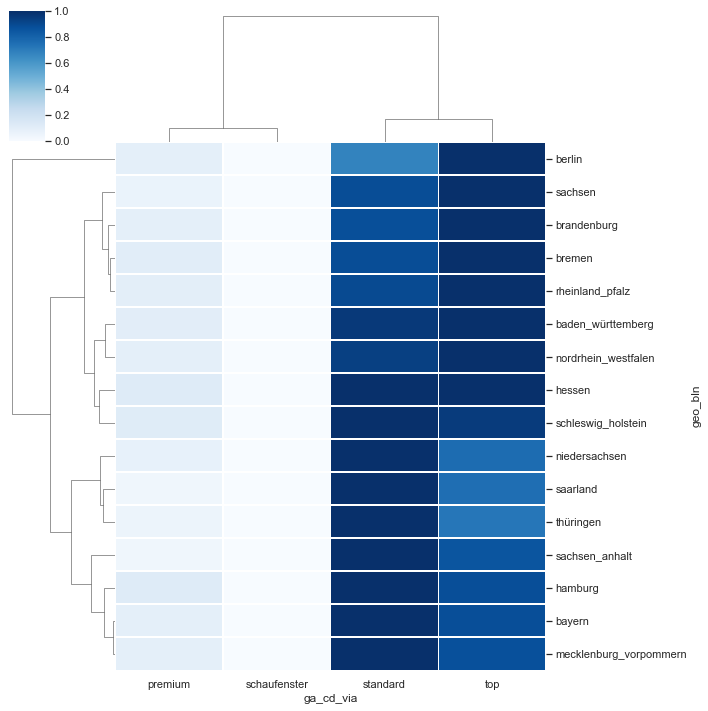

In [153]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and expose type

Modt of the offers are in the standard category. Berlin stand out since they are using the Top and premium category more.

In [ ]:
grouped = df_full.groupby(['ga_cd_via','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='ga_cd_via', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

ga_cd_via                 premium  schaufenster   standard        top
geo_bln                                                              
Baden_Württemberg       703205.42     869747.04  568491.92  569905.43
Bayern                 1056274.96    1602432.44  615271.02  728833.87
Berlin                 1288105.32    1386496.16 1185236.23 1031637.98
Brandenburg             550532.08    1013502.19  371228.82  421888.68
Bremen                  423985.86     461116.84  381309.38  320630.11
Hamburg                1251654.23    1080512.25 1085741.84  919474.47
Hessen                  822930.85     835101.33  511957.61  577584.20
Mecklenburg_Vorpommern  405044.03     344089.07  290687.09  292725.97
Niedersachsen           395194.12     625549.93  314370.32  359652.97
Nordrhein_Westfalen     593892.29     786155.55  411699.04  459500.92
Rheinland_Pfalz         439867.73     512787.21  289189.25  345192.22
Saarland                312855.61     339542.24  230148.51  267461.76
Sachsen                 508719.77     455306.77  313367.43  332740.47
Sachsen_Anhalt          429211.31     342125.94  179459.43  230387.08
Schleswig_Holstein      621854.71     827833.97  440568.83  481291.46
Thüringen               411996.46     293322.90  186268.23  281832.44

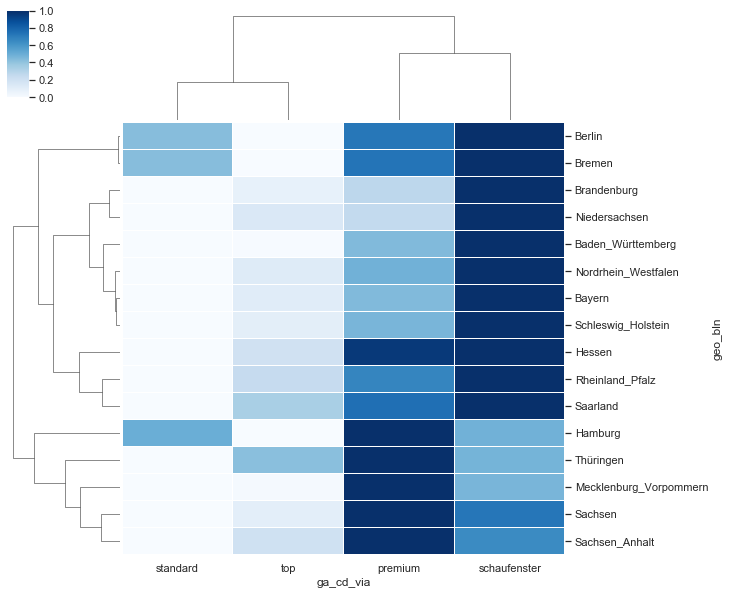

In [ ]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and expose type

Clearly, the houses in the Schaufenster category are being most expensive, followed by premium, top and then standard. 

In [ ]:
grouped = df_full.groupby('obj_ExclusiveExpose').mean()
grouped = grouped[['obj_pricetrend','obj_lastRefurbish','obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_ExclusiveExpose').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_ExclusiveExpose','URL']], left_on='obj_ExclusiveExpose', right_on='obj_ExclusiveExpose')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_ExclusiveExpose', ascending=False).reset_index(drop="True")
grouped

obj_ExclusiveExpose  obj_pricetrend  obj_lastRefurbish  obj_yearConstructed  \
0                true            7.32            2008.58              1981.22   
1               false            7.22            2010.14              1962.54   
2                None            6.95            2008.69              1968.37   

   obj_purchasePrice  obj_livingSpace  obj_lotArea  obj_noParkSpaces  \
0          443297.20           186.93      1146.30              3.44   
1          485405.81           215.68      1542.23              2.65   
2          453307.44           215.34      2019.45              2.78   

   obj_noRooms  obj_numberOfFloors  ...  obj_thermalChar  obj_usableArea  \
0         5.89                2.01  ...           144.55          119.79   
1         6.94                2.30  ...           153.97          130.91   
2         7.44                2.08  ...           129.37          152.35   

   word_count  word_count_upper  beschreibung_length  price_per_m²_living  \
0      383.14              4.23              3075.88              2579.13   
1      329.17              4.76              2576.10              2488.32   
2      385.01              3.55              3054.12              2269.67   

   price_per_m²_property  obj_telekomDownloadSpeed  bev_pro_km2  Amount_offers  
0                 793.26                     69.38       583.13          67329  
1                 931.63                     71.57       776.84         167661  
2                 793.69                     72.01       811.82            197  

[3 rows x 22 columns]

In [ ]:
grouped = df_full.groupby(['obj_ExclusiveExpose','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_ExclusiveExpose','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_ExclusiveExpose','geo_bln'], right_on=['obj_ExclusiveExpose','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_ExclusiveExpose','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_ExclusiveExpose', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_ExclusiveExpose     None    false     true
geo_bln                                       
Baden_Württemberg      26.00 17822.00  8728.00
Bayern                 10.00 20745.00  7659.00
Berlin                  1.00  4001.00  1158.00
Brandenburg            31.00  7385.00  4223.00
Bremen                  0.00  1287.00   438.00
Hamburg                 1.00  2052.00   717.00
Hessen                  9.00 14610.00  5118.00
Mecklenburg_Vorpommern  5.00  4393.00  1358.00
Niedersachsen          16.00 20924.00  7243.00
Nordrhein_Westfalen    67.00 32663.00 11675.00
Rheinland_Pfalz        13.00 14511.00  6171.00
Saarland                0.00  2801.00  1007.00
Sachsen                 8.00  8208.00  4255.00
Sachsen_Anhalt          4.00  5972.00  2173.00
Schleswig_Holstein      3.00  7348.00  3768.00
Thüringen               3.00  2939.00  1638.00

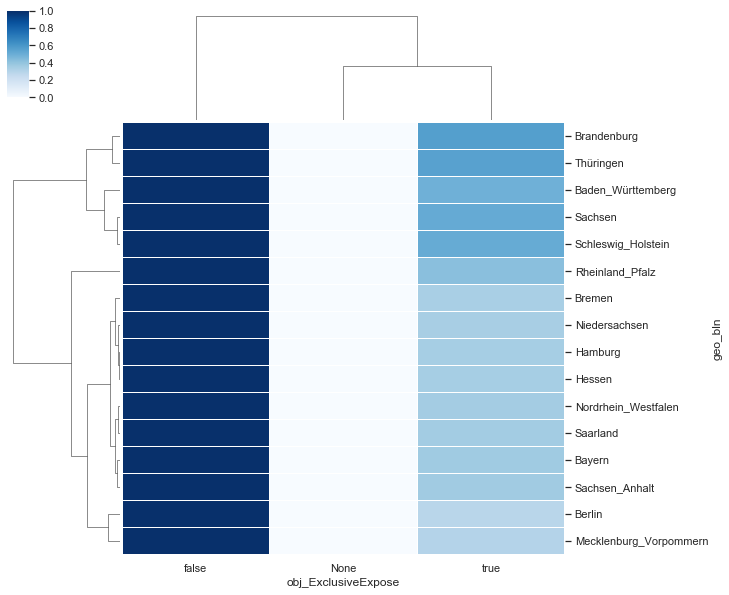

In [ ]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and exclusive expose

Most of the houses have no exclusive expose. In Brandenbur is a tendency to exclusive exposes. 

In [ ]:
grouped = df_full.groupby(['obj_ExclusiveExpose','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_ExclusiveExpose', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_ExclusiveExpose         None      false      true
geo_bln                                              
Baden_Württemberg      647801.15  619916.73 499255.34
Bayern                 607290.00  715693.82 657241.93
Berlin                 920000.00 1168271.69 939097.80
Brandenburg            214612.90  413957.30 404470.18
Bremen                      0.00  364062.55 341774.99
Hamburg                995000.00 1078353.45 907395.77
Hessen                 393683.33  593563.53 488787.20
Mecklenburg_Vorpommern 282779.80  301983.22 289286.65
Niedersachsen          340364.88  332763.42 348814.45
Nordrhein_Westfalen    552779.09  452492.96 429535.51
Rheinland_Pfalz        505846.15  324811.32 324570.03
Saarland                    0.00  248166.42 245672.44
Sachsen                226612.50  319004.60 354232.21
Sachsen_Anhalt          59500.00  197294.56 231156.67
Schleswig_Holstein     374966.67  479906.06 459356.23
Thüringen              208983.33  205243.47 264410.25

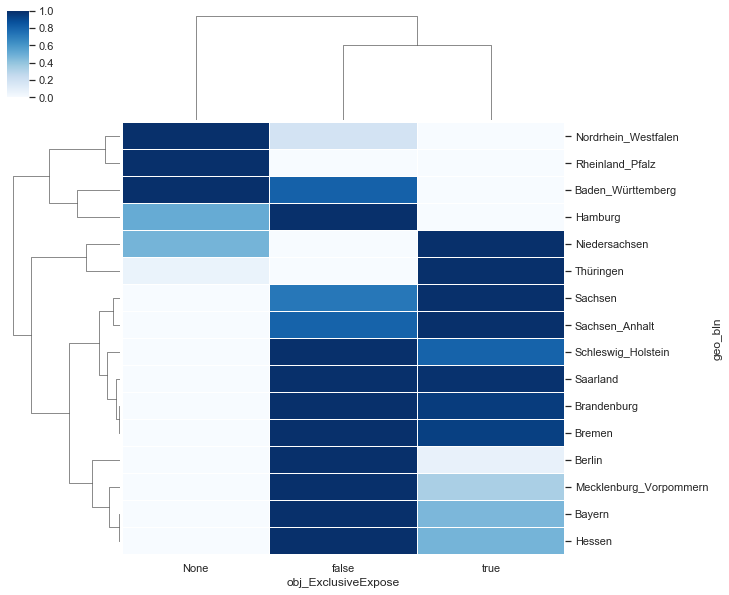

In [ ]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and exclusive expose

The exclusivity of the expose has no clear influence on pricing by region.

In [ ]:
grouped = df_full.groupby('obj_courtage').mean()
grouped = grouped[['obj_pricetrend','obj_lastRefurbish','obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_courtage').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_courtage','URL']], left_on='obj_courtage', right_on='obj_courtage')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_courtage', ascending=False).reset_index(drop="True")
grouped

obj_courtage  obj_pricetrend  obj_lastRefurbish  obj_yearConstructed  \
0         True            7.34            2009.31              1960.37   
1        False            7.07            2012.06              1976.90   

   obj_purchasePrice  obj_livingSpace  obj_lotArea  obj_noParkSpaces  \
0          536970.00           220.26      1499.81              2.83   
1          383166.01           186.71      1359.85              2.97   

   obj_noRooms  obj_numberOfFloors  ...  obj_thermalChar  obj_usableArea  \
0         7.16                2.29  ...           163.46          134.78   
1         6.01                2.12  ...            96.53          119.27   

   word_count  word_count_upper  beschreibung_length  price_per_m²_living  \
0      366.37              4.39              2828.56              2657.42   
1      311.02              4.97              2538.82              2279.67   

   price_per_m²_property  obj_telekomDownloadSpeed  bev_pro_km2  Amount_offers  
0                 976.94                     71.14       787.16         135186  
1                 783.36                     70.13       619.73          92435  

[2 rows x 22 columns]

In [ ]:
grouped = df_full.groupby(['obj_courtage','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_courtage','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_courtage','geo_bln'], right_on=['obj_courtage','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_courtage','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_courtage', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_courtage            False  True 
geo_bln                             
Baden_Württemberg        9228  16037
Bayern                  10491  17102
Berlin                   1224   3766
Brandenburg              4926   6558
Bremen                    392   1194
Hamburg                   808   1680
Hessen                   8115  10982
Mecklenburg_Vorpommern   2006   3697
Niedersachsen           10168  17459
Nordrhein_Westfalen     18145  23980
Rheinland_Pfalz          9359  10810
Saarland                 1392   2365
Sachsen                  5810   6499
Sachsen_Anhalt           4267   3870
Schleswig_Holstein       3382   7463
Thüringen                2722   1724

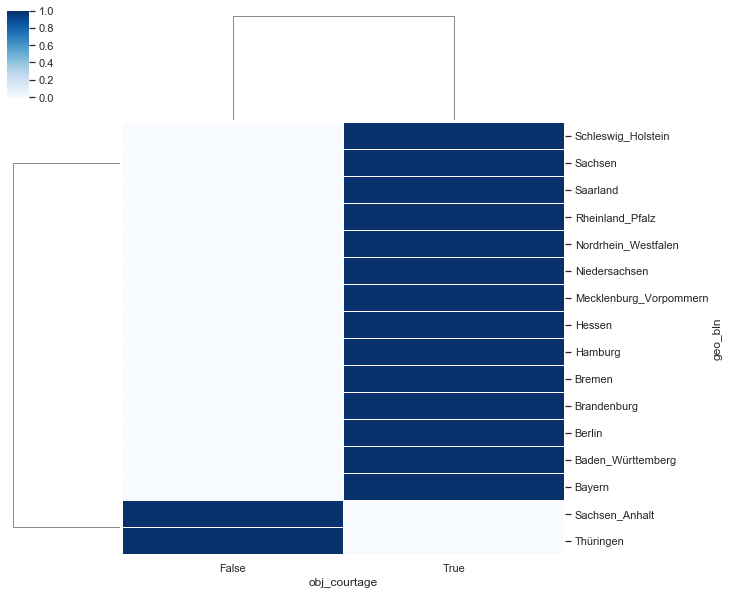

In [ ]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and exclusive expose

Most of the houses seem to have a fee.

In [ ]:
grouped = df_full.groupby(['obj_courtage','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_courtage', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_courtage               False      True 
geo_bln                                    
Baden_Württemberg      512980.09  630736.92
Bayern                 616136.17  760731.58
Berlin                 867983.66 1224261.98
Brandenburg            310128.70  481477.70
Bremen                 354738.97  387918.69
Hamburg                774161.54 1194968.77
Hessen                 450354.22  659388.70
Mecklenburg_Vorpommern 229392.47  336122.23
Niedersachsen          294376.32  354667.92
Nordrhein_Westfalen    365347.74  515659.12
Rheinland_Pfalz        287658.28  356654.33
Saarland               210367.14  266598.58
Sachsen                262439.30  389644.44
Sachsen_Anhalt         184109.36  230597.58
Schleswig_Holstein     379217.44  512059.85
Thüringen              202224.63  262752.75

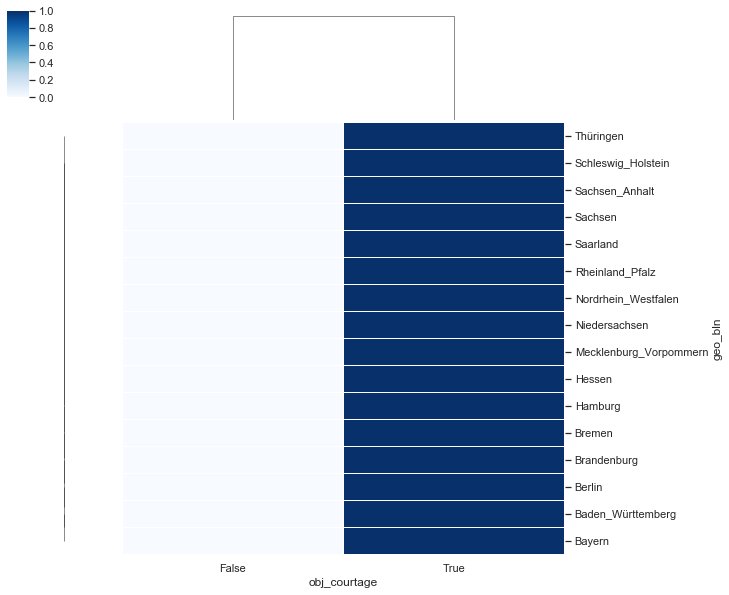

In [ ]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and exclusive expose

And these houses seem to be most expensive.

# Lets map it

In [ ]:
#Count first
df_full_clean=df_full.dropna(subset=['lat'])
df_full_clean=df_full_clean.dropna(subset=['lon'])
base_map = folium.Map(location=[51.1633987,10.4468737], zoom_start=6)
df_full_clean = df_full_clean.groupby(['lat', 'lon'])['URL'].count().reset_index()
HeatMap(data=df_full_clean[['lat', 'lon', 'URL']], radius=6, max_zoom=13).add_to(base_map)
base_map

In [ ]:
#Count first
df_full_clean=df_full.dropna(subset=['lat'])
df_full_clean=df_full_clean.dropna(subset=['lon'])
base_map = folium.Map(location=[51.1633987,10.4468737], zoom_start=6)
df_full_clean = df_full_clean.groupby(['lat', 'lon'])['obj_purchasePrice'].mean().reset_index()
HeatMap(data=df_full_clean[['lat', 'lon', 'obj_purchasePrice']], radius=10, max_zoom=10).add_to(base_map)
base_map

In [ ]:
#Purchase_price
df_full_clean=df_full.dropna(subset=['lat'])
df_full_clean=df_full_clean.dropna(subset=['lon'])
base_map = folium.Map(location=[51.1633987,10.4468737], zoom_start=6)
df_full_clean = df_full_clean.groupby(['lat', 'lon'])['obj_purchasePrice'].mean().reset_index()
HeatMap(data=df_full_clean[['lat', 'lon', 'obj_purchasePrice']], radius=10, max_zoom=4).add_to(base_map)
base_map

In [ ]:
#Purchase_price
df_full_clean=df_full.dropna(subset=['lat'])
df_full_clean=df_full_clean.dropna(subset=['lon'])
base_map = folium.Map(location=[51.1633987,10.4468737], zoom_start=6)
df_full_clean = df_full_clean.groupby(['lat', 'lon'])['obj_livingSpace'].mean().reset_index()
HeatMap(data=df_full_clean[['lat', 'lon', 'obj_livingSpace']], radius=10, max_zoom=4, blur=15).add_to(base_map)
base_map

# Text Analytics

In [ ]:
def clean_text(post):
    soup = BeautifulSoup(post)
    return soup.get_text()

df_full['beschreibung_clean'] = df_full['beschreibung'].apply(clean_text)

In [ ]:
def language_detect(post):
    try:
        text = TextBlob(post).detect_language()
    except Exception:
        pass

df_full['beschreibung_lang'] = df_full['beschreibung_clean'].apply(language_detect)

KeyboardInterrupt: 

In [ ]:
def text_sentiment(post):
    text = TextBlob(post)
    return text.sentiment.polarity

def text_subjectivity(post):
    text = TextBlob(post)
    return text.sentiment.subjectivity

all_posts['polarity'] = all_posts['Text_clean'].apply(text_sentiment)
all_posts['subjectivity'] = all_posts['Text_clean'].apply(text_subjectivity)

'ar'

# Clustering

# Forecasting - baseline

## Data Preperation

In [ ]:
Model_Performance = {'Model': [], 'Measure': [], 'Score': []}
Model_Performance = DataFrame(Model_Performance,columns= ['Model', 'Measure', 'Score'])
Model_Performance

Empty DataFrame
Columns: [Model, Measure, Score]
Index: []

In [ ]:
Housing_ML = df_full

In [ ]:
Housing_ML['Timestamp_year'] = Housing_ML['Timestamp'].dt.year
Housing_ML['Timestamp_month'] = Housing_ML['Timestamp'].dt.month
Housing_ML['Timestamp_day'] = Housing_ML['Timestamp'].dt.day
Housing_ML.drop(columns =["Timestamp"], inplace = True) 
Housing_ML.drop(columns =["Generated_index"], inplace = True) 

Housing_ML['geo_plz'] = Housing_ML['geo_plz'].astype(int)

Housing_ML['obj_houseNumber'] = pd.to_numeric(Housing_ML['obj_houseNumber'],errors='coerce')

Housing_ML['obj_pricetrendbuy'] = pd.to_numeric(Housing_ML['obj_pricetrendbuy'],errors='coerce')

Housing_ML = Housing_ML[Housing_ML.columns.difference(['URL',
                                                       'beschreibung',
                                                       'ga_cd_developer_virtualreality',
                                                       'ga_cd_application_requirements',
                                                       'ga_cd_customer_group',
                                                       'ga_cd_cxp_historicallisting',
                                                       'ga_cd_maillead_default_shown',
                                                       'geo_land',
                                                       'obj_cId',
                                                       'obj_cwId',
                                                       'obj_groupnumber',
                                                       'obj_immotype',
                                                       'obj_international',
                                                       'obj_ityp',
                                                       'obj_objectnumber',
                                                       'obj_picture',
                                                       'obj_project_id',
                                                       'obj_regio1',
                                                       'obj_regio2',
                                                       'obj_regio3',
                                                       'obj_scoutId',
                                                       'obj_street',
                                                       'obj_telekomHdTelephone',
                                                       'obj_telekomInternetProductAvailable',
                                                       'obj_telekomInternetProductName',
                                                       'obj_telekomInternetServices',
                                                       'obj_telekomInternetTechnology',
                                                       'obj_telekomInternetType',
                                                       'obj_telekomInternetUrl',
                                                       'obj_telekomInternetUrlMobile',
                                                       'obj_telekomTrackingGroup',
                                                       'obj_telekomTvOffer',
                                                       'obj_telekomUploadSpeed',
                                                       'obj_zipCode',
                                                       'evt_count_pm_sig',
                                                       'ga_cd_test_cxp_expose',
                                                       'obj_nbp',
                                                       'Constructed_years_category',
                                                       'lastRefurbish_years_category',
                                                       'obj_pricetrend_category'])]

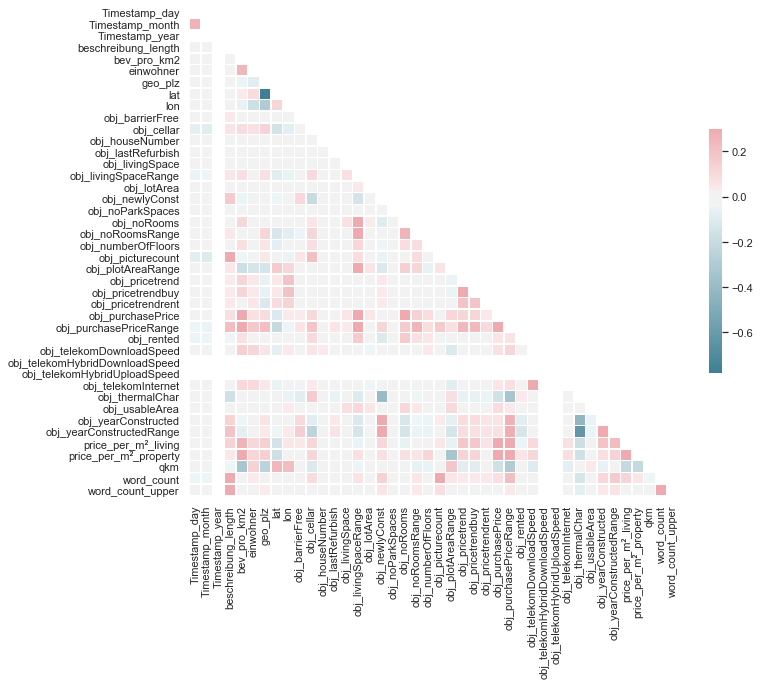

In [ ]:
sns.set(font_scale = 0.5)
sns.set(style="white")

# Compute the correlation matrix
corr = Housing_ML.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
Housing_ML = pd.get_dummies(Housing_ML, columns=['ga_cd_via',
                                                 'ga_cd_via_qualified',
                                                 'geo_bln',
                                                 'geo_krs',
                                                 'obj_ExclusiveExpose',
                                                 'obj_barrierFree',
                                                 'obj_buildingType',
                                                 'obj_cellar',
                                                 'obj_condition',
                                                 'obj_constructionPhase',
                                                 'obj_courtage',
                                                 'obj_energyEfficiencyClass',
                                                 'obj_energyType',
                                                 'obj_firingTypes',
                                                 'obj_galleryAd',
                                                 'obj_heatingType',
                                                 'obj_interiorQual',
                                                 'obj_newlyConst',
                                                 'obj_rented',
                                                 'obj_streetPlain'])
Housing_ML.head()  

Timestamp_day  Timestamp_month  Timestamp_year  beschreibung_length  \
0  None              6                9            2019                 1948   
1  None              6                9            2019                 3166   
2  None              6                9            2019                 1838   
3  None              6                9            2019                 3334   
4  None              6                9            2019                 1930   

   bev_pro_km2  einwohner  geo_plz   lat   lon  ...  \
0       323.38   13891.00    86836 48.16 10.81  ...   
1      1031.56   18370.00    40670 51.27  6.66  ...   
2       405.96   49737.00    52525 51.05  6.07  ...   
3       978.19   17652.00    41468 51.18  6.74  ...   
4       382.58   13630.00    66540 49.35  7.18  ...   

   obj_streetPlain_Über_den_Höfen_  obj_streetPlain_Über_der_Mühle  \
0                                0                               0   
1                                0                               0   
2                                0                               0   
3                                0                               0   
4                                0                               0   

   obj_streetPlain_Überm_Hof  obj_streetPlain_Überm_Weiher  \
0                          0                             0   
1                          0                             0   
2                          0                             0   
3                          0                             0   
4                          0                             0   

   obj_streetPlain_Überscheid  obj_streetPlain_Überwasserstr.  \
0                           0                               0   
1                           0                               0   
2                           0                               0   
3                           0                               0   
4                           0                               0   

   obj_streetPlain_Ückendorfer_Straße  obj_streetPlain_Ückendorferstr  \
0                                   0                               0   
1                                   0                               0   
2                                   0                               0   
3                                   0                               0   
4                                   0                               0   

   obj_streetPlain_Ümminger_Straße  obj_streetPlain_„An_der_Mönch_Hof_Sod“  
0                                0                                       0  
1                                0                                       0  
2                                0                                       0  
3                                0                                       0  
4                                0                                       0  

[5 rows x 12540 columns]

In [ ]:
Housing_ML.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180734 entries, 0 to 180733
Data columns (total 12540 columns):
                                                                                                     object
Timestamp_day                                                                                        int64
Timestamp_month                                                                                      int64
Timestamp_year                                                                                       int64
beschreibung_length                                                                                  int64
bev_pro_km2                                                                                          float64
einwohner                                                                                            float64
geo_plz                                                                                              int32
lat                      

In [ ]:
Housing_ML = Housing_ML.fillna(0)

In [ ]:
x = Housing_ML[Housing_ML.columns.difference(['obj_purchasePrice','obj_purchasePriceRange','price_per_m²_living','price_per_m²_property'])]
y = Housing_ML['obj_purchasePrice'] # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

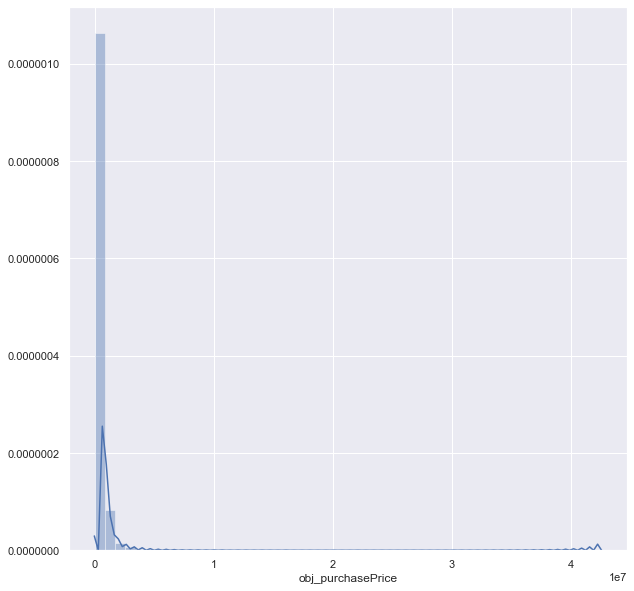

In [ ]:
ax = sns.distplot(Housing_ML['obj_purchasePrice'])
sns.set(rc={'figure.figsize':(10,10)})
#plt.xlim(-100,1000000)

## Random Forest

In [ ]:
forest = RandomForestRegressor(n_jobs=-1)  # use all cores
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
forest.score(X_test, y_test)

0.8149175174855076

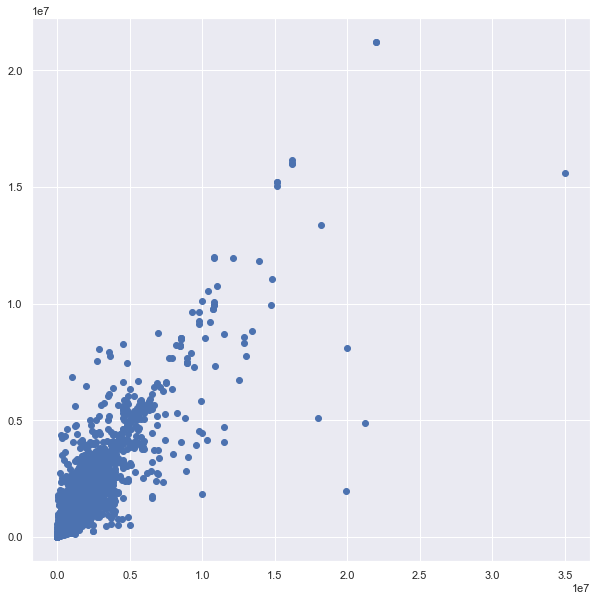

In [ ]:
# Make predictions using the testing set
y_pred = forest.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 95335.74502134051
Mean Squared Error: 83561001671.97635
Root Mean Squared Error: 289069.1987603943


In [ ]:
Name = "Random Forest"

for i in range(1):
    Model_Performance= Model_Performance.append(pd.DataFrame([[Name,'Mean Absolute Error',metrics.mean_absolute_error(y_test, y_pred)]], columns=Model_Performance.columns))
    Model_Performance= Model_Performance.append(pd.DataFrame([[Name,'Mean Squared Error',metrics.mean_squared_error(y_test, y_pred)]], columns=Model_Performance.columns))
    Model_Performance= Model_Performance.append(pd.DataFrame([[Name,'Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test, y_pred))]], columns=Model_Performance.columns))
    Model_Performance= Model_Performance.append(pd.DataFrame([[Name,'Error Rate',1-(forest.score(X_test, y_test))]], columns=Model_Performance.columns))
    
Model_Performance = Model_Performance.reset_index(drop=True) 
Model_Performance

Model                  Measure          Score
0  Random Forest      Mean Absolute Error       95335.75
1  Random Forest       Mean Squared Error 83561001671.98
2  Random Forest  Root Mean Squared Error      289069.20
3  Random Forest               Error Rate           0.19

<Figure size 1440x720 with 0 Axes>

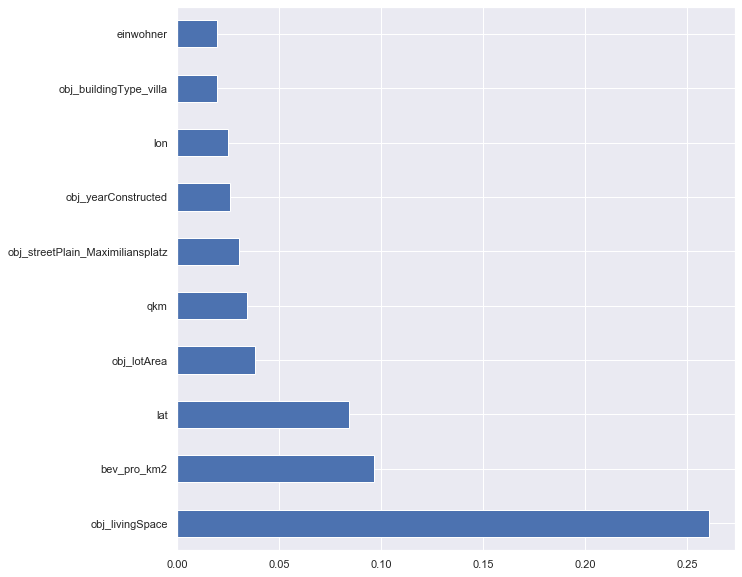

<Figure size 1440x720 with 0 Axes>

In [ ]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)

feat_importances = pd.Series(forest.feature_importances_, index=X_test.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.figure(figsize=(20,10))

## Add more data

In [ ]:
#Taken from www.fa-technik.adfc.de/code/opengeodb/DE.tab - 17th of November 2019
#geo_ags = pd.read_csv("DE.tab",sep="\t")
#geo_split_ags = pd.concat([geo_ags.ags,geo_ags.plz.str.split(",",expand=True)],axis=1)
#geo_split_melt_ags = geo_split_ags.melt(id_vars=["ags"],value_name="plz").drop("variable",axis=1)
#geo_split_melt_ags = geo_split_melt_ags.loc[geo_split_melt_ags.plz.isnull()==0]
#geo_split_melt_ags = geo_split_melt_ags.loc[geo_split_melt_ags.plz!=""]
#geo_split_melt_ags.plz = geo_split_melt_ags.plz.astype(int)
#geo_split_melt_ags.plz = geo_split_melt_ags.plz.astype(str)
#geo_split_melt_ags.ags = geo_split_melt_ags.ags.astype(str)
#geo_split_melt_ags.ags = [w[:8] for w in geo_split_melt_ags.ags]
#geo_split_melt_grouped_ags = geo_split_melt_ags.drop_duplicates(subset=['plz', 'ags'])
#df_full = pd.merge(df_full, geo_split_melt_grouped_ags[["plz","ags"]],left_on="geo_plz",right_on="plz")